#Anexo con código

#Importación librerías

In [ ]:
#Importamos las librerías necesarias
import pandas as pd
import io
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk


#Lectura de datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Combined_Jobs_Final.csv to Combined_Jobs_Final (2).csv
Saving Experience.csv to Experience (2).csv
Saving job_data.csv to job_data (2).csv
Saving Job_Views.csv to Job_Views (2).csv
Saving Positions_Of_Interest.csv to Positions_Of_Interest (2).csv


In [ ]:
df_pos = pd.read_csv('Positions_Of_Interest.csv',sep=',')
df_views=pd.read_csv('Job_Views.csv',sep=',')
df_data=pd.read_csv('job_data.csv',sep=',')
df_exp=pd.read_csv('Experience.csv',sep=',')
df_jobs=pd.read_csv('Combined_Jobs_Final.csv',sep=',')

In [ ]:
df_views['Job.ID'].unique()

array([73666, 96655, 84141, ..., 64809, 74245,    33])

#Procesamiento de los datos


##Valores faltantes y nulos


###df_views

In [ ]:
df_views.head()

Applicant.ID  Job.ID                                              Title  \
0         10000   73666              Cashiers & Valets Needed! @ WallyPark   
1         10000   96655  Macy's Seasonal Retail Fragrance Cashier  - Ga...   
2         10001   84141  Part Time Showroom Sales / Cashier @ Grizzly I...   
3         10002   77989  Event Specialist Part Time @ Advantage Sales &...   
4         10002   69568          Bonefish - Kitchen Staff @ Bonefish Grill   

                                            Position  \
0                          Cashiers & Valets Needed!   
1  Macy's Seasonal Retail Fragrance Cashier  - Ga...   
2                 Part Time Showroom Sales / Cashier   
3                         Event Specialist Part Time   
4                           Bonefish - Kitchen Staff   

                       Company          City      State.Name State.Code  \
0                    WallyPark        Newark      New Jersey         NJ   
1                       Macy's   Garden City        New York         NY   
2      Grizzly Industrial Inc.    Bellingham      Washington         WA   
3  Advantage Sales & Marketing  Simpsonville  South Carolina         SC   
4               Bonefish Grill    Greenville  South Carolina         SC   

  Industry               View.Start                 View.End  View.Duration  \
0      NaN  2014-12-12 20:12:35 UTC  2014-12-12 20:31:24 UTC         1129.0   
1      NaN  2014-12-12 20:08:50 UTC  2014-12-12 20:10:15 UTC           84.0   
2      NaN  2014-12-12 20:12:32 UTC  2014-12-12 20:17:18 UTC          286.0   
3      NaN  2014-12-12 20:39:23 UTC  2014-12-12 20:42:13 UTC          170.0   
4      NaN  2014-12-12 20:43:25 UTC  2014-12-12 20:43:58 UTC           33.0   

                Created.At               Updated.At  
0  2014-12-12 20:12:35 UTC  2014-12-12 20:12:35 UTC  
1  2014-12-12 20:08:50 UTC  2014-12-12 20:08:50 UTC  
2  2014-12-12 20:12:32 UTC  2014-12-12 20:12:32 UTC  
3  2014-12-12 20:39:23 UTC  2014-12-12 20:39:23 UTC  
4  2014-12-12 20:43:25 UTC  2014-12-12 20:43:25 UTC

In [ ]:
df_views.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12370 entries, 0 to 12369
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant.ID   12370 non-null  int64  
 1   Job.ID         12370 non-null  int64  
 2   Title          12370 non-null  object 
 3   Position       12370 non-null  object 
 4   Company        11790 non-null  object 
 5   City           12370 non-null  object 
 6   State.Name     12348 non-null  object 
 7   State.Code     12348 non-null  object 
 8   Industry       2199 non-null   object 
 9   View.Start     12370 non-null  object 
 10  View.End       10575 non-null  object 
 11  View.Duration  10575 non-null  float64
 12  Created.At     12370 non-null  object 
 13  Updated.At     12370 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.3+ MB


In [ ]:
# Contar el número de usuarios únicos en df_views
num_users = df_views['Applicant.ID'].nunique()

# Imprimir el resultado
print("Número de usuarios únicos:", num_users)

Número de usuarios únicos: 3448


In [ ]:
df_views.isnull().sum()

Applicant.ID         0
Job.ID               0
Title                0
Position             0
Company            580
City                 0
State.Name          22
State.Code          22
Industry         10171
View.Start           0
View.End          1795
View.Duration     1795
Created.At           0
Updated.At           0
dtype: int64

###df_pos

In [ ]:
df_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560 entries, 0 to 6559
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant.ID          6560 non-null   int64 
 1   Position.Of.Interest  6558 non-null   object
 2   Created.At            6560 non-null   object
 3   Updated.At            6560 non-null   object
dtypes: int64(1), object(3)
memory usage: 205.1+ KB


In [ ]:
df_pos

Applicant.ID Position.Of.Interest               Created.At  \
0            10003     security officer  2014-12-12 21:20:54 UTC   
1            10007               Server  2014-08-14 15:56:42 UTC   
2            10007            Bartender  2014-08-14 15:56:44 UTC   
3            10008                 Host  2014-08-14 15:56:42 UTC   
4            10008              Barista  2014-08-14 15:56:43 UTC   
...            ...                  ...                      ...   
6555          9995               Server  2014-08-14 15:56:42 UTC   
6556          9996             Security  2014-12-12 19:06:28 UTC   
6557          9997               Server  2014-08-14 15:56:42 UTC   
6558          9997              Barista  2014-08-14 15:56:43 UTC   
6559          9997            Bartender  2014-08-14 15:56:44 UTC   

                   Updated.At  
0     2014-12-12 21:20:54 UTC  
1     2015-02-26 20:35:12 UTC  
2     2015-02-19 23:21:28 UTC  
3     2015-02-26 20:35:12 UTC  
4     2015-02-18 02:35:06 UTC  
...                       ...  
6555  2015-02-26 20:35:12 UTC  
6556  2014-12-12 19:06:28 UTC  
6557  2015-02-26 20:35:12 UTC  
6558  2015-02-18 02:35:06 UTC  
6559  2015-02-19 23:21:28 UTC  

[6560 rows x 4 columns]

In [ ]:
df_pos.isnull().sum()

Applicant.ID            0
Position.Of.Interest    2
Created.At              0
Updated.At              0
dtype: int64

###df_data

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  84090 non-null  int64 
 1   Job.ID      84090 non-null  int64 
 2   text        81766 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [ ]:
merged_df = df_data.merge(df_jobs, on='Job.ID', how='inner')
merged_df

Unnamed: 0  Job.ID                                               text  \
0               0     111  server tacolici palo alto part time tacolici f...   
1               1     113  kitchen staff chef claud lane san francisco pa...   
2               2     117  bartend machka restaur corp. san francisco par...   
3               3     121  server teriyaki hous brisban part time serv fo...   
4               4     127  kitchen staff chef rosa mexicano sunset lo ang...   
...           ...     ...                                                ...   
84085       84085      82  book keeper nation japanes american histor soc...   
84086       84086      83  kitchen staff chef emporio rulli larkspur part...   
84087       84087      84  driver onigilli san francisco part time onigil...   
84088       84088      88  line cook machka restaur corp. san francisco p...   
84089       84089      92  cashier kazoo restaur san jose part time look ...   

       Provider Status                                               Slug  \
0             1   open                    palo-alto-ca-tacolicious-server   
1             1   open    san-francisco-ca-claude-lane-kitchen-staff-chef   
2             1   open  san-francisco-ca-machka-restaurants-corp-barte...   
3             1   open                  brisbane-ca-teriyaki-house-server   
4             1   open  los-angeles-ca-rosa-mexicano-sunset-kitchen-st...   
...         ...    ...                                                ...   
84085         1   open  san-francisco-ca-national-japanese-american-hi...   
84086         1   open       larkspur-ca-emporio-rulli-kitchen-staff-chef   
84087         1   open                san-francisco-ca-onigilly-driver-84   
84088         1   open  san-francisco-ca-machka-restaurants-corp-line-...   
84089         1   open               san-jose-ca-kazoo-restaurant-cashier   

                                                   Title            Position  \
0                                   Server @ Tacolicious              Server   
1                       Kitchen Staff/Chef @ Claude Lane  Kitchen Staff/Chef   
2                   Bartender @ Machka Restaurants Corp.           Bartender   
3                                Server @ Teriyaki House              Server   
4            Kitchen Staff/Chef @ Rosa Mexicano - Sunset  Kitchen Staff/Chef   
...                                                  ...                 ...   
84085  Book Keeper @ National Japanese American Histo...         Book Keeper   
84086                 Kitchen Staff/Chef @ Emporio Rulli  Kitchen Staff/Chef   
84087                                  Driver @ Onigilly              Driver   
84088               Line Cook @ Machka Restaurants Corp.           Line Cook   
84089                         Cashier @ Kazoo Restaurant             Cashier   

                                             Company           City  ...  \
0                                        Tacolicious      Palo Alto  ...   
1                                        Claude Lane  San Francisco  ...   
2                           Machka Restaurants Corp.  San Francisco  ...   
3                                     Teriyaki House       Brisbane  ...   
4                             Rosa Mexicano - Sunset    Los Angeles  ...   
...                                              ...            ...  ...   
84085  National Japanese American Historical Society  San Francisco  ...   
84086                                  Emporio Rulli       Larkspur  ...   
84087                                       Onigilly  San Francisco  ...   
84088                       Machka Restaurants Corp.  San Francisco  ...   
84089                               Kazoo Restaurant       San Jose  ...   

                    Industry  \
0         Food and Beverages   
1         Food and Beverages   
2         Food and Beverages   
3         Food and Beverages   
4         Food and Beverages   
...                      ...   
84085  Office Administr

In [ ]:
df_data.isnull().sum()

Unnamed: 0       0
Job.ID           0
text          2324
dtype: int64

In [ ]:
merged_df

Unnamed: 0  Job.ID                                               text  \
0               0     111  server tacolici palo alto part time tacolici f...   
1               1     113  kitchen staff chef claud lane san francisco pa...   
2               2     117  bartend machka restaur corp. san francisco par...   
3               3     121  server teriyaki hous brisban part time serv fo...   
4               4     127  kitchen staff chef rosa mexicano sunset lo ang...   
...           ...     ...                                                ...   
84085       84085      82  book keeper nation japanes american histor soc...   
84086       84086      83  kitchen staff chef emporio rulli larkspur part...   
84087       84087      84  driver onigilli san francisco part time onigil...   
84088       84088      88  line cook machka restaur corp. san francisco p...   
84089       84089      92  cashier kazoo restaur san jose part time look ...   

       Provider Status                                               Slug  \
0             1   open                    palo-alto-ca-tacolicious-server   
1             1   open    san-francisco-ca-claude-lane-kitchen-staff-chef   
2             1   open  san-francisco-ca-machka-restaurants-corp-barte...   
3             1   open                  brisbane-ca-teriyaki-house-server   
4             1   open  los-angeles-ca-rosa-mexicano-sunset-kitchen-st...   
...         ...    ...                                                ...   
84085         1   open  san-francisco-ca-national-japanese-american-hi...   
84086         1   open       larkspur-ca-emporio-rulli-kitchen-staff-chef   
84087         1   open                san-francisco-ca-onigilly-driver-84   
84088         1   open  san-francisco-ca-machka-restaurants-corp-line-...   
84089         1   open               san-jose-ca-kazoo-restaurant-cashier   

                                                   Title            Position  \
0                                   Server @ Tacolicious              Server   
1                       Kitchen Staff/Chef @ Claude Lane  Kitchen Staff/Chef   
2                   Bartender @ Machka Restaurants Corp.           Bartender   
3                                Server @ Teriyaki House              Server   
4            Kitchen Staff/Chef @ Rosa Mexicano - Sunset  Kitchen Staff/Chef   
...                                                  ...                 ...   
84085  Book Keeper @ National Japanese American Histo...         Book Keeper   
84086                 Kitchen Staff/Chef @ Emporio Rulli  Kitchen Staff/Chef   
84087                                  Driver @ Onigilly              Driver   
84088               Line Cook @ Machka Restaurants Corp.           Line Cook   
84089                         Cashier @ Kazoo Restaurant             Cashier   

                                             Company           City  ...  \
0                                        Tacolicious      Palo Alto  ...   
1                                        Claude Lane  San Francisco  ...   
2                           Machka Restaurants Corp.  San Francisco  ...   
3                                     Teriyaki House       Brisbane  ...   
4                             Rosa Mexicano - Sunset    Los Angeles  ...   
...                                              ...            ...  ...   
84085  National Japanese American Historical Society  San Francisco  ...   
84086                                  Emporio Rulli       Larkspur  ...   
84087                                       Onigilly  San Francisco  ...   
84088                       Machka Restaurants Corp.  San Francisco  ...   
84089                               Kazoo Restaurant       San Jose  ...   

                    Industry  \
0         Food and Beverages   
1         Food and Beverages   
2         Food and Beverages   
3         Food and Beverages   
4         Food and Beverages   
...                      ...   
84085  Office Administr

###df_exp

In [ ]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8653 entries, 0 to 8652
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant.ID          8653 non-null   int64  
 1   Position.Name         7703 non-null   object 
 2   Employer.Name         8620 non-null   object 
 3   City                  4922 non-null   object 
 4   State.Name            4595 non-null   object 
 5   State.Code            4595 non-null   object 
 6   Start.Date            6618 non-null   object 
 7   End.Date              4906 non-null   object 
 8   Job.Description       5692 non-null   object 
 9   Salary                2798 non-null   float64
 10  Can.Contact.Employer  3581 non-null   object 
 11  Created.At            8653 non-null   object 
 12  Updated.At            8653 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 878.9+ KB


In [ ]:
df_exp.isnull().sum()

Applicant.ID               0
Position.Name            950
Employer.Name             33
City                    3731
State.Name              4058
State.Code              4058
Start.Date              2035
End.Date                3747
Job.Description         2961
Salary                  5855
Can.Contact.Employer    5072
Created.At                 0
Updated.At                 0
dtype: int64

In [ ]:
df_exp['Job.Description']=df_exp['Job.Description'].fillna("")

Nos quedamos solo con los aplicantes que tienen al menos una fila con el dato de la ciudad en su experiencia

In [ ]:
import pandas as pd

# Agrupar el dataframe por Applicant.ID y contar el número de filas distintas donde la ciudad no es nula
grouped_df = df_exp[(df_exp['City'].notnull()) & (df_exp['City'] != 'None')].groupby('Applicant.ID').size()
print(grouped_df)
# Filtrar el dataframe agrupado para mantener solo los grupos donde el conteo es mayor a cero
filtered_grouped_df = grouped_df[grouped_df > 0]

# Obtener la lista de Applicant.ID que cumplen el criterio
applicant_ids = filtered_grouped_df.index.tolist()
print(applicant_ids)
# Crear un nuevo dataframe solo con los aplicantes seleccionados
df_exp = df_exp[df_exp['Applicant.ID'].isin(applicant_ids)]

# Imprimir el resultado
print(df_exp)
print(df_exp['Applicant.ID'].unique().shape)

Applicant.ID
2        2
3        3
6        1
8        1
11       1
        ..
14630    2
14633    3
14635    3
14639    2
14642    5
Length: 2525, dtype: int64
[2, 3, 6, 8, 11, 12, 13, 14, 18, 21, 22, 23, 24, 26, 27, 30, 32, 33, 34, 37, 38, 39, 40, 42, 44, 45, 48, 50, 51, 52, 54, 57, 63, 66, 68, 69, 71, 73, 74, 75, 76, 77, 78, 83, 84, 86, 88, 89, 93, 95, 96, 102, 103, 109, 110, 111, 113, 117, 118, 120, 124, 126, 129, 131, 133, 134, 137, 141, 143, 145, 146, 147, 148, 149, 151, 153, 154, 155, 157, 161, 164, 166, 172, 174, 180, 184, 188, 192, 194, 198, 208, 210, 215, 219, 220, 221, 223, 227, 230, 239, 240, 244, 247, 249, 250, 252, 255, 256, 257, 266, 267, 271, 274, 279, 280, 282, 285, 287, 290, 292, 297, 302, 303, 306, 307, 309, 313, 314, 315, 316, 317, 320, 326, 327, 330, 340, 341, 343, 355, 361, 362, 365, 366, 370, 372, 373, 378, 384, 391, 394, 397, 400, 401, 404, 405, 406, 408, 421, 437, 441, 448, 452, 453, 460, 467, 469, 470, 471, 476, 477, 480, 482, 484, 492, 493, 494, 495, 496, 501

In [ ]:
df_exp.sort_values('Start.Date', ascending=False).head(50)

Applicant.ID                                    Position.Name  \
402          11060                              Custodian/Carpenter   
7878          8745                               retired since 1988   
1388         13712                                              LPN   
3455          2705               planner, manager, process operator   
3073          2291  night supervisor in the distribution department   
5972          5569                                       Supervisor   
308           1080                                    Read Alliance   
4567           384                                           Server   
6399           631                                Security Officer    
4610            39                    Red Cross Certified Lifeguard   
2683          1789                                           waiter   
1530          1388                                computer assembly   
2763             2                                        Volunteer   
7087          7193                                         cashier    
6653          6569                                     Travel Agent   
6342           616                                           Server   
4379          3628                                 limpieza,almacen   
4976          4408                                      housekeeper   
6627          6523                          Bartender , key holder    
7991          8840                                             chef   
3464          2711                            Claims Representative   
745           1179                                       Child care   
3398          2635                                               Rn   
55           10085                                          cashier   
3866          3098                       Program Support Specialist   
4494          3750                                 senior paralegal   
7023          7091                       Zone Operation Coordinator   
7383           780                                        Sales man   
4371           361                                     Host/Cashier   
3457           271                                           Helper   
7529           808                                           waiter   
7695           844                             accountant assistant   
2716          1888                            assistant electrician   
2714           188                                  Sales Associate   
2267         14513       WEEKEND Staff Wanted For Cash Jobs (Daily)   
2266         14511       Cash in Hand Jobs/Entry level staff Needed   
2229         14416                                    IM Supervisor   
1977         14197                                   Licensed Agent   
2161         14359                                 Brand ambassador   
2209         14402                                          Cashier   
1868         14125                        HR & Benefits Coordinator   
1984         14203                           Medical Representative   
2279         14520                                          Cashier   
2478         14626                                    FSR Associate   
2284         14531                                Real Estate Agent   
995          12468                             Workshop Facilitator   
2444         14611                          Public Relations Intern   
2285         14531                                 Paralegal Intern   
2489         14633                                 Director of Data   
4314          3543                                Assistant Manager   

                                     Employer.Name             City  \
402                              US Postal Service      Los Angeles   
7878                                       pension           seatac   
1388                      Albert Einstein hospital     Philadelphia   
3455                                           ibm    hopewell jct.   
3073                         

###df_jobs

In [ ]:
df_jobs.isnull().sum()

Job.ID                    0
Provider                  0
Status                    0
Slug                      0
Title                     0
Position                  0
Company                2271
City                    135
State.Name              171
State.Code              171
Address               84054
Latitude                  0
Longitude                 0
Industry              83823
Job.Description          56
Requirements          84090
Salary                83861
Listing.Start           683
Listing.End             167
Employment.Type          10
Education.Required      267
Created.At                0
Updated.At                0
dtype: int64

Primera oferta publicada fecha

In [ ]:
df_jobs.sort_values('Listing.End', ascending=True).head(1)

Job.ID  Provider Status                                               Slug  \
8  134273         2   open  mendham-nj-king-s-food-markets-assistant-store...   

                                           Title                 Position  \
8  Assistant Store Manager @ King's Food Markets  Assistant Store Manager   

               Company     City  State.Name State.Code  ... Industry  \
8  King's Food Markets  Mendham  New Jersey         NJ  ...      NaN   

                                     Job.Description  Requirements Salary  \
8  \r\nAssistant Store Manager\r\n\r\nNow Hiring ...           NaN    NaN   

  Listing.Start  Listing.End  Employment.Type Education.Required  \
8    12-05-2014   01-04-2015        Part-Time      Not Specified   

                Created.At               Updated.At  
8  2014-12-05 16:55:06 UTC  2014-12-05 16:55:06 UTC  

[1 rows x 23 columns]

Última oferta publicada fecha

In [ ]:
df_jobs.sort_values('Listing.End', ascending=False).head(1)

Job.ID  Provider Status  \
24644  254175         2   open   

                                                    Slug  \
24644  webster-tx-rehabcare-environmental-services-ai...   

                                                   Title  \
24644  Environmental Services Aide PRN - Kindred Reha...   

                                                Position    Company     City  \
24644  Environmental Services Aide PRN - Kindred Reha...  RehabCare  Webster   

      State.Name State.Code  ... Industry  \
24644      Texas         TX  ...      NaN   

                                         Job.Description  Requirements Salary  \
24644  At RehabCare we work with patients who need re...           NaN    NaN   

      Listing.Start  Listing.End  Employment.Type Education.Required  \
24644    01-03-2015   31-03-2015        Part-Time      Not Specified   

                    Created.At               Updated.At  
24644  2015-03-02 10:18:03 UTC  2015-03-02 10:18:03 UTC  

[1 rows x 23 columns]

Seleccionamos las columnas

In [ ]:
columnas = ['Job.ID']+['Title']+['Position']+ ['Company']+['City']+['Employment.Type']+['Job.Description']+['Education.Required']+['Latitude']+['Longitude']
df_jobs =df_jobs[columnas]
df_jobs.head()

Job.ID                                        Title            Position  \
0     111                         Server @ Tacolicious              Server   
1     113             Kitchen Staff/Chef @ Claude Lane  Kitchen Staff/Chef   
2     117         Bartender @ Machka Restaurants Corp.           Bartender   
3     121                      Server @ Teriyaki House              Server   
4     127  Kitchen Staff/Chef @ Rosa Mexicano - Sunset  Kitchen Staff/Chef   

                    Company           City Employment.Type  \
0               Tacolicious      Palo Alto       Part-Time   
1               Claude Lane  San Francisco       Part-Time   
2  Machka Restaurants Corp.  San Francisco       Part-Time   
3            Teriyaki House       Brisbane       Part-Time   
4    Rosa Mexicano - Sunset    Los Angeles       Part-Time   

                                     Job.Description Education.Required  \
0  Tacolicious' first Palo Alto store just opened...                NaN   
1   \r\n\r\nNew French Brasserie in S.F. Financia...                NaN   
2  We are a popular Mediterranean wine bar and re...                NaN   
3   ● Serve food/drinks to customers in a profess...                NaN   
4  Located at the heart of Hollywood, we are one ...                NaN   

    Latitude   Longitude  
0  37.443346 -122.161170  
1  37.789830 -122.404268  
2  37.795597 -122.402963  
3  37.685073 -122.400275  
4  34.073384 -118.460439

In [ ]:
df_jobs.isnull().sum()

Job.ID                   0
Title                    0
Position                 0
Company               2271
City                   135
Employment.Type         10
Job.Description         56
Education.Required     267
Latitude                 0
Longitude                0
dtype: int64

####Tratamiento de nulos

No podemos hacer nada con los nulos de las compañías ya que no podemos extraer la información. Vamos a ver si podemos averiguar la ciudad a partir de la compañía

In [ ]:
nulos_city = df_jobs[pd.isnull(df_jobs['City'])]
nulos_city.head()

Job.ID                                              Title  \
3425  142044       Registered Nurse (RN) @ St. Francis Hospital   
3433  142054  Sales Representative - Business Development Op...   
3434  142055       New Business Executive @ CHI Payment Systems   
3435  142056  Outside Sales Representative (Business Develop...   
3436  142057  Outside Sales Representative @ CHI Payment Sys...   

                                               Position               Company  \
3425                              Registered Nurse (RN)  St. Francis Hospital   
3433  Sales Representative - Business Development Op...   CHI Payment Systems   
3434                             New Business Executive   CHI Payment Systems   
3435  Outside Sales Representative (Business Develop...   CHI Payment Systems   
3436                       Outside Sales Representative   CHI Payment Systems   

     City      Employment.Type  \
3425  NaN  Full-Time/Part-Time   
3433  NaN  Full-Time/Part-Time   
3434  NaN  Full-Time/Part-Time   
3435  NaN  Full-Time/Part-Time   
3436  NaN  Full-Time/Part-Time   

                                        Job.Description   Education.Required  \
3425  Under the direction of the Clinical Coordinato...     Associate Degree   
3433  If you&rsquo;re energetic, motivated, hardwork...  High School Diploma   
3434  If you&rsquo;re energetic, motivated, hardwork...  High School Diploma   
3435  If you&rsquo;re energetic, motivated, hardwork...  High School Diploma   
3436  If you&rsquo;re energetic, motivated, hardwork...  High School Diploma   

      Latitude  Longitude  
3425       0.0        0.0  
3433       0.0        0.0  
3434       0.0        0.0  
3435       0.0        0.0  
3436       0.0        0.0

In [ ]:
nulos_city.groupby(['Company'])['City'].count()

Company
Academic Year In America                0
CBS Healthcare Services and Staffing    0
CHI Payment Systems                     0
Driveline Retail                        0
Educational Testing Services            0
Genesis Health System                   0
Genesis Health Systems                  0
Home Instead Senior Care                0
St. Francis Hospital                    0
Volvo Group                             0
Name: City, dtype: int64

Solo hay 9 compañías con valores null en el campo City, averiguando su valor podemos añadirlo manualmente

In [ ]:
#Genesis Health System y Genesis Health Systems son la msima compañía probablemente ha habido un error tipográfico
df_jobs['Company'] = df_jobs['Company'].replace(['Genesis Health Systems'], 'Genesis Health System')
df_jobs.loc[df_jobs.Company == 'CHI Payment Systems', 'City'] = 'Illinois'
df_jobs.loc[df_jobs.Company == 'Academic Year In America', 'City'] = 'Stamford'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing ', 'City'] = 'Urbandale'
df_jobs.loc[df_jobs.Company == 'Driveline Retail', 'City'] = 'Coppell'
df_jobs.loc[df_jobs.Company == 'Educational Testing Services', 'City'] = 'New Jersey'
df_jobs.loc[df_jobs.Company == 'Genesis Health System', 'City'] = 'Davennport'
df_jobs.loc[df_jobs.Company == 'Home Instead Senior Care', 'City'] = 'Nebraska'
df_jobs.loc[df_jobs.Company == 'St. Francis Hospital', 'City'] = 'New York'
df_jobs.loc[df_jobs.Company == 'Volvo Group', 'City'] = 'Washington'
df_jobs.loc[df_jobs.Company == 'CBS Healthcare Services and Staffing', 'City'] = 'Urbandale'

In [ ]:
df_jobs.isnull().sum()


Job.ID                   0
Title                    0
Position                 0
Company               2271
City                     0
Employment.Type         10
Job.Description         56
Education.Required     267
Latitude                 0
Longitude                0
dtype: int64

Todos los nulos son empleos de Uber

In [ ]:
nulos_emp = df_jobs[pd.isnull(df_jobs['Employment.Type'])]
nulos_emp

Job.ID                   Title         Position Company           City  \
10768  153197  Driving Partner @ Uber  Driving Partner    Uber  San Francisco   
10769  153198  Driving Partner @ Uber  Driving Partner    Uber    Los Angeles   
10770  153199  Driving Partner @ Uber  Driving Partner    Uber        Chicago   
10771  153200  Driving Partner @ Uber  Driving Partner    Uber         Boston   
10772  153201  Driving Partner @ Uber  Driving Partner    Uber      Ann Arbor   
10773  153202  Driving Partner @ Uber  Driving Partner    Uber       Oklahoma   
10774  153203  Driving Partner @ Uber  Driving Partner    Uber          Omaha   
10775  153204  Driving Partner @ Uber  Driving Partner    Uber        Lincoln   
10776  153205  Driving Partner @ Uber  Driving Partner    Uber    Minneapolis   
10777  153206  Driving Partner @ Uber  Driving Partner    Uber       St. Paul   

      Employment.Type                                    Job.Description  \
10768             NaN  Uber is changing the way the world moves. From...   
10769             NaN  Uber is changing the way the world moves. From...   
10770             NaN  Uber is changing the way the world moves. From...   
10771             NaN  Uber is changing the way the world moves. From...   
10772             NaN  Uber is changing the way the world moves. From...   
10773             NaN  Uber is changing the way the world moves. From...   
10774             NaN  Uber is changing the way the world moves. From...   
10775             NaN  Uber is changing the way the world moves. From...   
10776             NaN  Uber is changing the way the world moves. From...   
10777             NaN  Uber is changing the way the world moves. From...   

      Education.Required   Latitude   Longitude  
10768                NaN  37.774929 -122.419415  
10769                NaN  34.052234 -118.243685  
10770                NaN  41.878114  -87.629798  
10771                NaN  42.358431  -71.059773  
10772                NaN  42.280826  -83.743038  
10773                NaN  35.467560  -97.516428  
10774                NaN  41.252363  -95.997988  
10775                NaN  40.809722  -96.675278  
10776                NaN  44.983334  -93.266670  
10777                NaN  44.953703  -93.089958

In [ ]:
df_jobs['Employment.Type'].unique()

array(['Part-Time', 'Full-Time/Part-Time', 'Seasonal/Temp', 'Per Diem',
       'Intern', nan, 'Full-Time', 'Contract', 'Temporary/seasonal'],
      dtype=object)

Como no sabemos las condiciones de los Employement.Type de Uber lo sustituiremos por 'Full-Time/Part-Time'

In [ ]:
df_jobs

Job.ID                                              Title  \
0         111                               Server @ Tacolicious   
1         113                   Kitchen Staff/Chef @ Claude Lane   
2         117               Bartender @ Machka Restaurants Corp.   
3         121                            Server @ Teriyaki House   
4         127        Kitchen Staff/Chef @ Rosa Mexicano - Sunset   
...       ...                                                ...   
84085      82  Book Keeper @ National Japanese American Histo...   
84086      83                 Kitchen Staff/Chef @ Emporio Rulli   
84087      84                                  Driver @ Onigilly   
84088      88               Line Cook @ Machka Restaurants Corp.   
84089      92                         Cashier @ Kazoo Restaurant   

                 Position                                        Company  \
0                  Server                                    Tacolicious   
1      Kitchen Staff/Chef                                    Claude Lane   
2               Bartender                       Machka Restaurants Corp.   
3                  Server                                 Teriyaki House   
4      Kitchen Staff/Chef                         Rosa Mexicano - Sunset   
...                   ...                                            ...   
84085         Book Keeper  National Japanese American Historical Society   
84086  Kitchen Staff/Chef                                  Emporio Rulli   
84087              Driver                                       Onigilly   
84088           Line Cook                       Machka Restaurants Corp.   
84089             Cashier                               Kazoo Restaurant   

                City Employment.Type  \
0          Palo Alto       Part-Time   
1      San Francisco       Part-Time   
2      San Francisco       Part-Time   
3           Brisbane       Part-Time   
4        Los Angeles       Part-Time   
...              ...             ...   
84085  San Francisco       Part-Time   
84086       Larkspur       Part-Time   
84087  San Francisco       Part-Time   
84088  San Francisco       Part-Time   
84089       San Jose       Part-Time   

                                         Job.Description Education.Required  \
0      Tacolicious' first Palo Alto store just opened...                NaN   
1       \r\n\r\nNew French Brasserie in S.F. Financia...                NaN   
2      We are a popular Mediterranean wine bar and re...                NaN   
3       ● Serve food/drinks to customers in a profess...                NaN   
4      Located at the heart of Hollywood, we are one ...                NaN   
...                                                  ...                ...   
84085  NJAHS stands for National Japanese American Hi...                NaN   
84086  Weekend Brunch Line Cook \r\n● Other shifts ma...                NaN   
84087  ONIGILLY (Japanese rice ball wraps) seeks outg...                NaN   
84088  We are a popular Mediterranean restaurant in F...                NaN   
84089   We are looking for a cashier! \r\n\r\n ● Take...                NaN   

        Latitude   Longitude  
0      37.443346 -122.161170  
1      37.789830 -122.404268  
2      37.795597 -122.402963  
3      37.685073 -122.400275  
4      34.073384 -118.460439  
...          ...         ...  
84085  37.785874 -122.429495  
84086  37.935384 -122.535025  
84087  37.791409 -122.404413  
84088  37.795597 -122.402963  
84089  37.349233 -121.893302  

[84090 rows x 10 columns]

In [ ]:
df_jobs['Employment.Type']=df_jobs['Employment.Type'].fillna('Full-Time/Part-Time')

Descripciones nulas

In [ ]:
df_jobs['Job.Description']=df_jobs['Job.Description'].fillna('')

In [ ]:
df_jobs.isnull().sum()

Job.ID                   0
Title                    0
Position                 0
Company               2271
City                     0
Employment.Type          0
Job.Description          0
Education.Required     267
Latitude                 0
Longitude                0
dtype: int64

Educación nula

In [ ]:
df_jobs['Education.Required']=df_jobs['Education.Required'].fillna('')

In [ ]:
df_jobs.isnull().sum()

Job.ID                   0
Title                    0
Position                 0
Company               2271
City                     0
Employment.Type          0
Job.Description          0
Education.Required       0
Latitude                 0
Longitude                0
dtype: int64

Compañía nulo

In [ ]:
df_jobs['Company']=df_jobs['Company'].fillna('')

In [ ]:
df_jobs.isnull().sum()

Job.ID                0
Title                 0
Position              0
Company               0
City                  0
Employment.Type       0
Job.Description       0
Education.Required    0
Latitude              0
Longitude             0
dtype: int64

#Análisis de datos exploratorio

###df_views

In [ ]:
views_mean_by_applicant = df_views.groupby('Applicant.ID')['Job.ID'].count().mean()
print("Media de vistas de empleo por Applicant ID:", views_mean_by_applicant)
print("Número de trabajos distintos vistos:",len(df_views['Job.ID'].unique()))
print("Número de aplicantes distintos:",len(df_views['Applicant.ID'].unique()))

Media de vistas de empleo por Applicant ID: 3.5875870069605567
Número de trabajos distintos vistos: 7047
Número de aplicantes distintos: 3448


Buscamos la vista más antigua

In [ ]:
df_views['Created.At'].min()

'2014-11-06 11:15:51 UTC'

Buscamos la vista más nueva

In [ ]:
df_views['Created.At'].max()

'2015-04-02 21:33:52 UTC'

####Visualizaciones

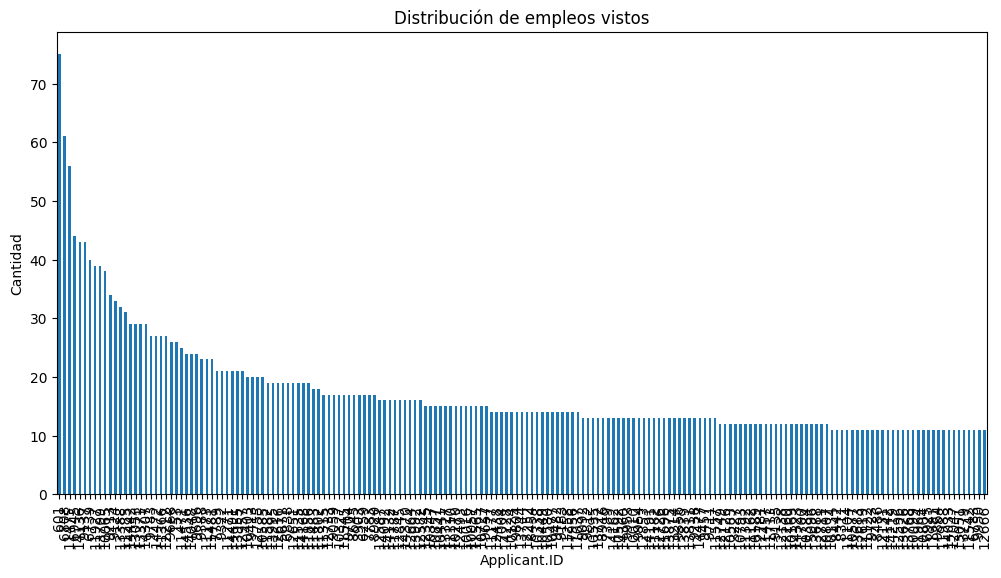

In [ ]:
# Gráfico de barras para la variable "Applicant.ID"
state_counts = df_views['Applicant.ID'].value_counts()
state_counts = state_counts[state_counts > 100]
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.xlabel('Applicant.ID')
plt.ylabel('Cantidad')
plt.title('Distribución de empleos vistos')
plt.show()


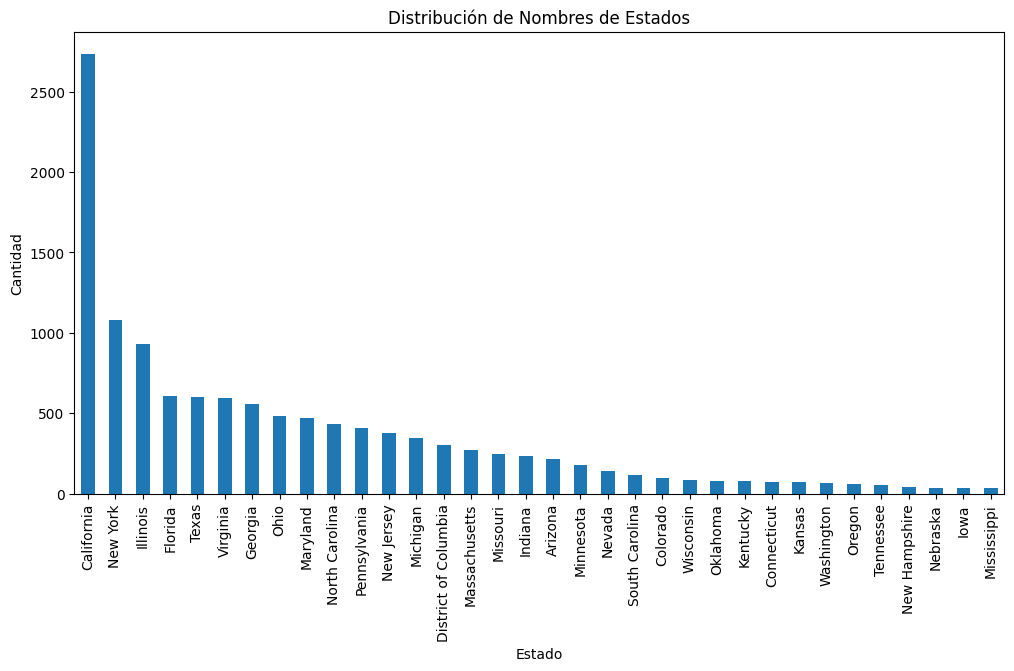

In [ ]:
# Gráfico de barras para la variable "State.Name"
state_counts = df_views['State.Name'].value_counts()
state_counts = state_counts[state_counts > 30]
plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.title('Distribución de Nombres de Estados')
plt.show()


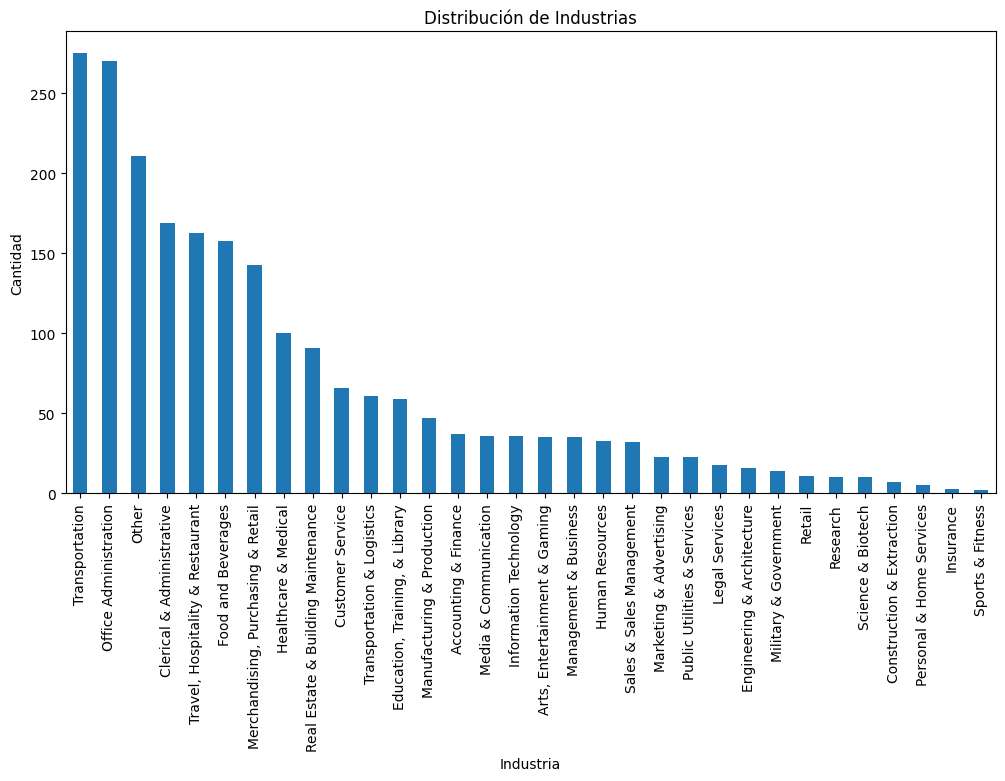

In [ ]:
# Gráfico de barras para la variable "Industry"
industry_counts = df_views['Industry'].value_counts()
plt.figure(figsize=(12, 6))
industry_counts.plot(kind='bar')
plt.xlabel('Industria')
plt.ylabel('Cantidad')
plt.title('Distribución de Industrias')
plt.show()

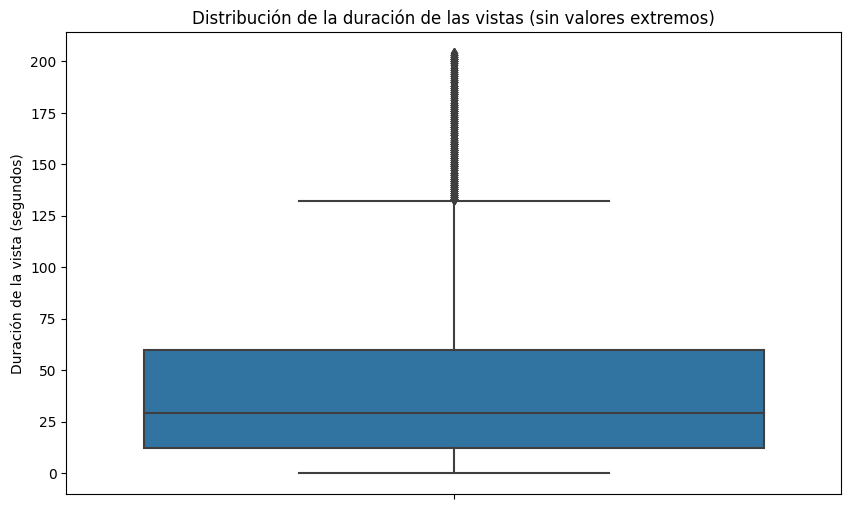

In [ ]:
# Calcular los percentiles de la columna "View.Duration"
q1 = df_views['View.Duration'].quantile(0.25)
q3 = df_views['View.Duration'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
iqr = q3 - q1

# Definir los límites inferior y superior para filtrar los valores extremos
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtrar los valores extremos
filtered_df = df_views[(df_views['View.Duration'] >= lower_bound) & (df_views['View.Duration'] <= upper_bound)]

# Crear el gráfico de caja y bigotes con Seaborn para los datos filtrados
plt.figure(figsize=(10, 6))
sns.boxplot(y=filtered_df['View.Duration'])
plt.ylabel('Duración de la vista (segundos)')
plt.title('Distribución de la duración de las vistas (sin valores extremos)')
plt.show()

###df_pos

In [ ]:
print("Número de aplicantes con posición(es) de interés establecida(s):",len(df_pos['Applicant.ID'].unique()))

Número de aplicantes con posición(es) de interés establecida(s): 2068


In [ ]:
#Hacer un unique para ver que posiciones se repiten
df_pos

Applicant.ID Position.Of.Interest               Created.At  \
0            10003     security officer  2014-12-12 21:20:54 UTC   
1            10007               Server  2014-08-14 15:56:42 UTC   
2            10007            Bartender  2014-08-14 15:56:44 UTC   
3            10008                 Host  2014-08-14 15:56:42 UTC   
4            10008              Barista  2014-08-14 15:56:43 UTC   
...            ...                  ...                      ...   
6555          9995               Server  2014-08-14 15:56:42 UTC   
6556          9996             Security  2014-12-12 19:06:28 UTC   
6557          9997               Server  2014-08-14 15:56:42 UTC   
6558          9997              Barista  2014-08-14 15:56:43 UTC   
6559          9997            Bartender  2014-08-14 15:56:44 UTC   

                   Updated.At  
0     2014-12-12 21:20:54 UTC  
1     2015-02-26 20:35:12 UTC  
2     2015-02-19 23:21:28 UTC  
3     2015-02-26 20:35:12 UTC  
4     2015-02-18 02:35:06 UTC  
...                       ...  
6555  2015-02-26 20:35:12 UTC  
6556  2014-12-12 19:06:28 UTC  
6557  2015-02-26 20:35:12 UTC  
6558  2015-02-18 02:35:06 UTC  
6559  2015-02-19 23:21:28 UTC  

[6560 rows x 4 columns]

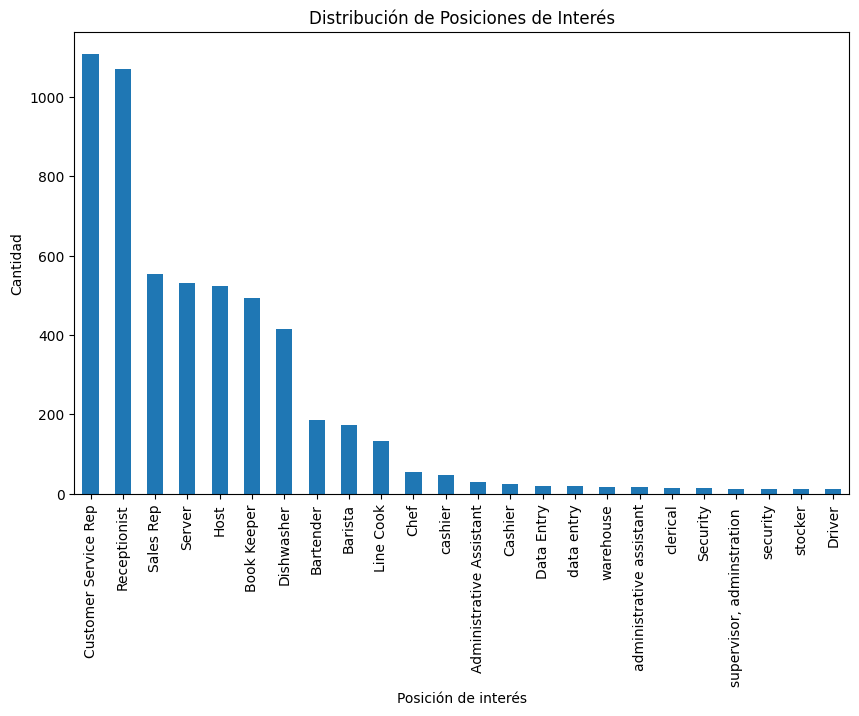

In [ ]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada posición de interés
position_counts = df_pos['Position.Of.Interest'].value_counts()
position_counts = position_counts[position_counts > 10]
plt.figure(figsize=(10, 6))
# Graficar el conteo de posiciones de interés como barras
position_counts.plot(kind='bar')
plt.xlabel('Posición de interés')
plt.ylabel('Cantidad')
plt.title('Distribución de Posiciones de Interés')
plt.show()



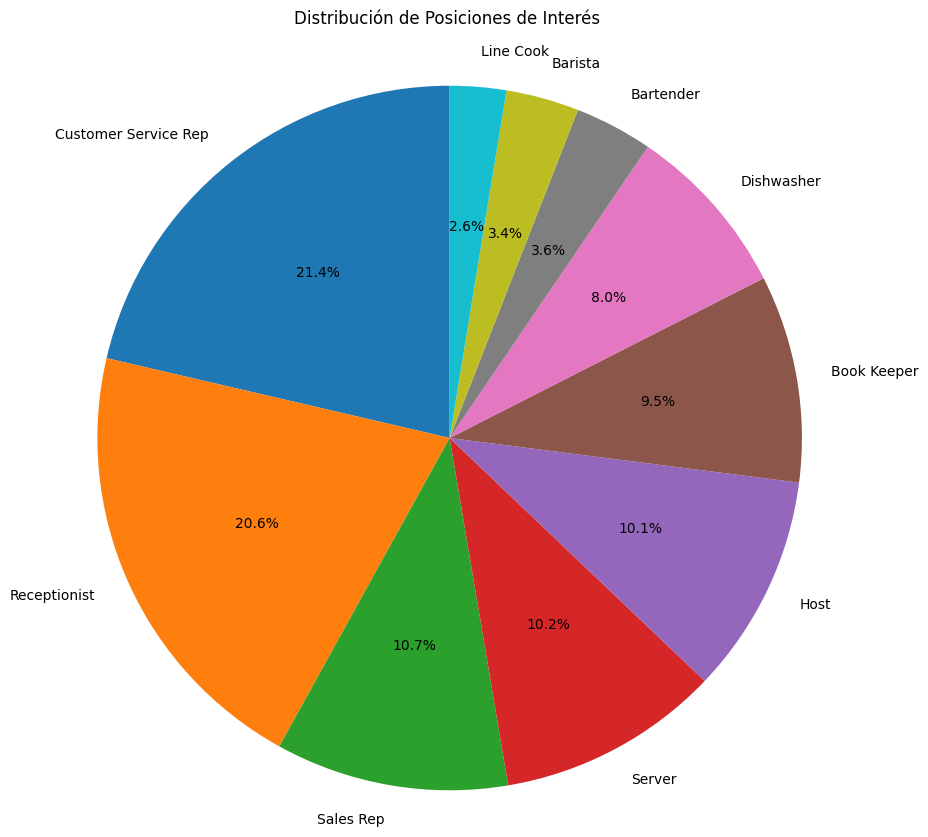

In [ ]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada posición de interés
position_counts = df_pos['Position.Of.Interest'].value_counts()
position_counts = position_counts[position_counts > 60]
labels = position_counts.index
sizes = position_counts.values

plt.figure(figsize=(10, 10))
# Graficar la distribución de posiciones de interés como un gráfico de donut
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Posiciones de Interés \n')
plt.axis('equal')
plt.show()

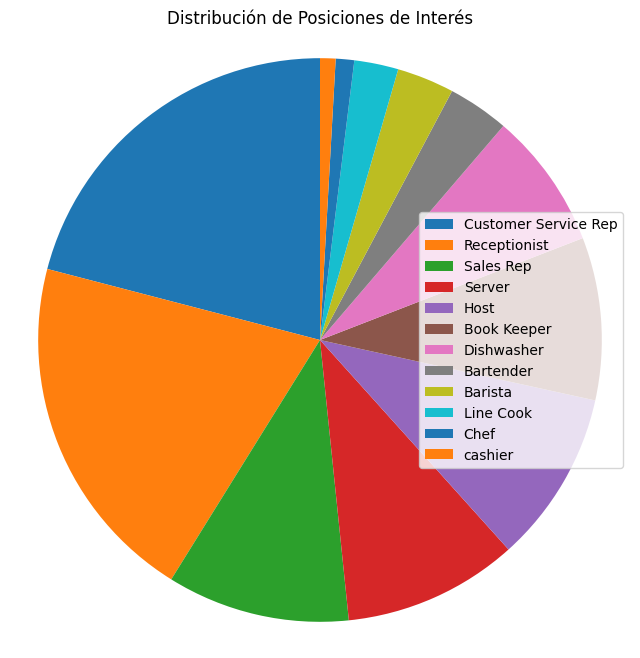

In [ ]:

# Contar la frecuencia de cada posición de interés
position_counts = df_pos['Position.Of.Interest'].value_counts()
position_counts = position_counts[position_counts > 40]
labels = position_counts.index
sizes = position_counts.values

plt.figure(figsize=(8, 8))
# Graficar la distribución de posiciones de interés como un gráfico de donut
plt.pie(sizes, startangle=90)
plt.title('Distribución de Posiciones de Interés')
plt.axis('equal')

# Agregar una leyenda a la derecha del gráfico
plt.legend(labels, loc='right', bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
numbers = [601,6739,6808,6945, 9124,9137,9213,10065,11285,11475,11927,13388,13709,14136]

In [ ]:

filtered_df = df_pos[df_pos['Applicant.ID'].isin(numbers)]
filtered_df_sorted = filtered_df.sort_values('Applicant.ID', ascending=True)
filtered_df_sorted

Applicant.ID  Position.Of.Interest               Created.At  \
4919           601  Customer Service Rep  2014-08-14 15:56:46 UTC   
4917           601                Server  2014-08-14 15:56:42 UTC   
4918           601             Line Cook  2014-08-14 15:56:44 UTC   
5225          6739             Line Cook  2014-08-14 15:56:44 UTC   
5224          6739             Bartender  2014-08-14 15:56:44 UTC   
5228          6739           Book Keeper  2014-08-14 15:56:46 UTC   
5222          6739               Barista  2014-08-14 15:56:43 UTC   
5221          6739                  Host  2014-08-14 15:56:42 UTC   
5220          6739                Server  2014-08-14 15:56:42 UTC   
5223          6739            Dishwasher  2014-08-14 15:56:43 UTC   
5229          6739  Customer Service Rep  2014-08-14 15:56:46 UTC   
5230          6739             Sales Rep  2014-08-14 15:56:47 UTC   
5226          6739                  Chef  2014-08-14 15:56:45 UTC   
5227          6739          Receptionist  2014-08-14 15:56:45 UTC   
5278          6945                  Host  2014-08-14 15:56:42 UTC   
5279          6945          Receptionist  2014-08-14 15:56:45 UTC   
5280          6945  Customer Service Rep  2014-08-14 15:56:46 UTC   
5282          6945     security officer   2014-11-08 16:02:49 UTC   
5281          6945           Book Keeper  2014-08-14 15:56:46 UTC   
189          11285  Customer Service Rep  2014-08-14 15:56:46 UTC   
188          11285          Receptionist  2014-08-14 15:56:45 UTC   
853          14136             Warehouse  2015-02-12 04:13:01 UTC   
852          14136             Sales Rep  2014-08-14 15:56:47 UTC   
851          14136  Customer Service Rep  2014-08-14 15:56:46 UTC   
850          14136          Receptionist  2014-08-14 15:56:45 UTC   

                   Updated.At  
4919  2015-03-08 19:56:39 UTC  
4917  2015-02-26 20:35:12 UTC  
4918  2015-02-22 11:22:37 UTC  
5225  2015-02-22 11:22:37 UTC  
5224  2015-02-19 23:21:28 UTC  
5228  2015-03-02 12:17:17 UTC  
5222  2015-02-18 02:35:06 UTC  
5221  2015-02-26 20:35:12 UTC  
5220  2015-02-26 20:35:12 UTC  
5223  2015-02-19 23:21:28 UTC  
5229  2015-03-08 19:56:39 UTC  
5230  2015-03-02 02:13:08 UTC  
5226  2015-02-12 19:11:23 UTC  
5227  2015-03-02 12:17:17 UTC  
5278  2015-02-26 20:35:12 UTC  
5279  2015-03-02 12:17:17 UTC  
5280  2015-03-08 19:56:39 UTC  
5282  2014-11-08 16:02:49 UTC  
5281  2015-03-02 12:17:17 UTC  
189   2015-03-08 19:56:39 UTC  
188   2015-03-02 12:17:17 UTC  
853   2015-02-12 04:13:01 UTC  
852   2015-03-02 02:13:08 UTC  
851   2015-03-08 19:56:39 UTC  
850   2015-03-02 12:17:17 UTC

###df_exp

In [ ]:
df_exp.shape

(5896, 13)

In [ ]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 8652
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Applicant.ID          5896 non-null   int64  
 1   Position.Name         5647 non-null   object 
 2   Employer.Name         5888 non-null   object 
 3   City                  4891 non-null   object 
 4   State.Name            4594 non-null   object 
 5   State.Code            4594 non-null   object 
 6   Start.Date            4960 non-null   object 
 7   End.Date              3774 non-null   object 
 8   Job.Description       5896 non-null   object 
 9   Salary                2776 non-null   float64
 10  Can.Contact.Employer  3515 non-null   object 
 11  Created.At            5896 non-null   object 
 12  Updated.At            5896 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 644.9+ KB


In [ ]:
df_exp.isnull().sum()

Applicant.ID               0
Position.Name            249
Employer.Name              8
City                    1005
State.Name              1302
State.Code              1302
Start.Date               936
End.Date                2122
Job.Description            0
Salary                  3120
Can.Contact.Employer    2381
Created.At                 0
Updated.At                 0
dtype: int64

###df_jobs

In [ ]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job.ID              84090 non-null  int64  
 1   Title               84090 non-null  object 
 2   Position            84090 non-null  object 
 3   Company             84090 non-null  object 
 4   City                84090 non-null  object 
 5   Employment.Type     84090 non-null  object 
 6   Job.Description     84090 non-null  object 
 7   Education.Required  84090 non-null  object 
 8   Latitude            84090 non-null  float64
 9   Longitude           84090 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 6.4+ MB


In [ ]:
df_jobs.isnull().sum()

Job.ID                0
Title                 0
Position              0
Company               0
City                  0
Employment.Type       0
Job.Description       0
Education.Required    0
Latitude              0
Longitude             0
dtype: int64

####Visualizaciones

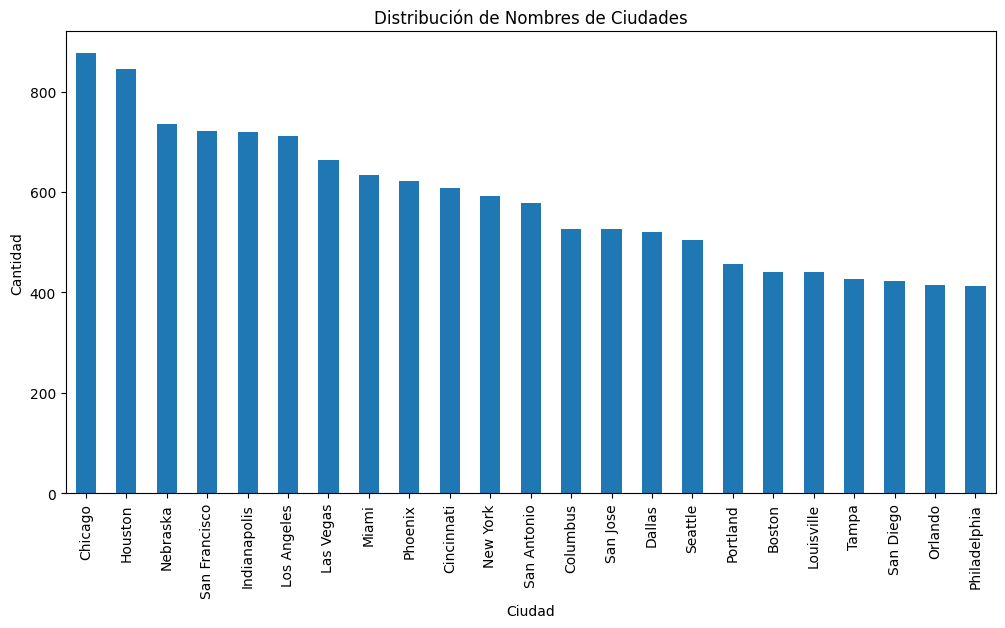

In [ ]:
# Gráfico de barras para la variable "State.Name"
city_counts = df_jobs['City'].value_counts()
city_counts = city_counts[city_counts > 400]
plt.figure(figsize=(12, 6))
city_counts.plot(kind='bar')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad')
plt.title('Distribución de Nombres de Ciudades')
plt.show()



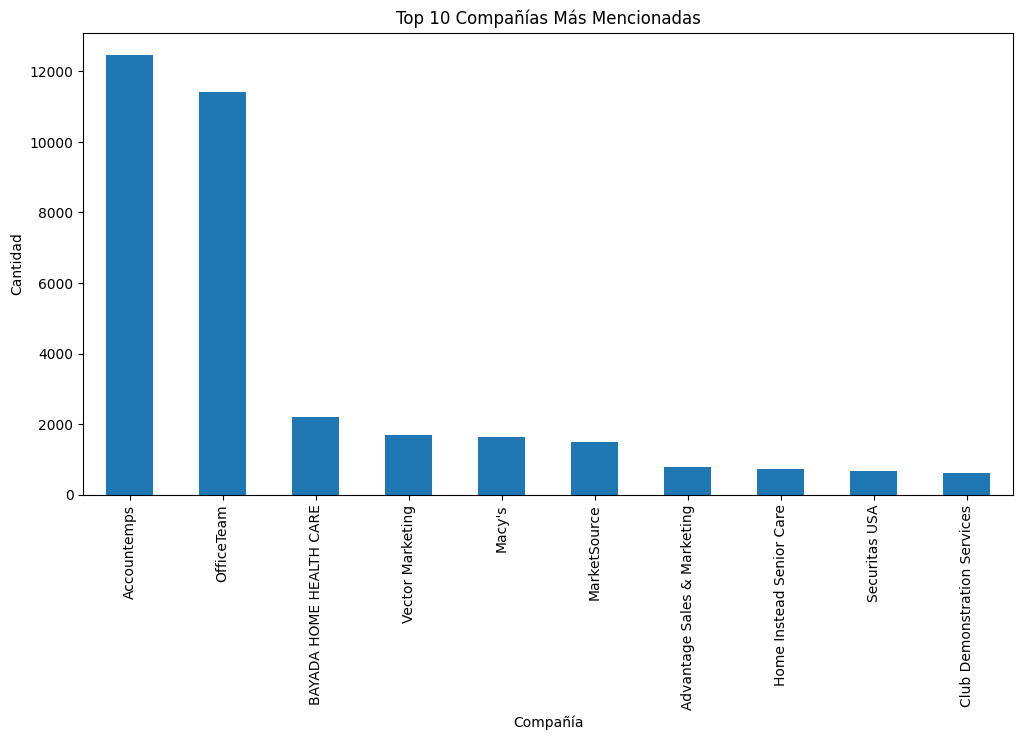

In [ ]:
# Remover los valores en blanco de la variable "Company"
df_jobs_cleaned = df_jobs[df_jobs['Company'] != '']

# Obtener los conteos de las compañías
company_counts = df_jobs_cleaned['Company'].value_counts().head(10)

# Graficar el resultado
plt.figure(figsize=(12, 6))
company_counts.plot(kind='bar')
plt.xlabel('Compañía')
plt.ylabel('Cantidad')
plt.title('Top 10 Compañías Más Mencionadas')
plt.show()

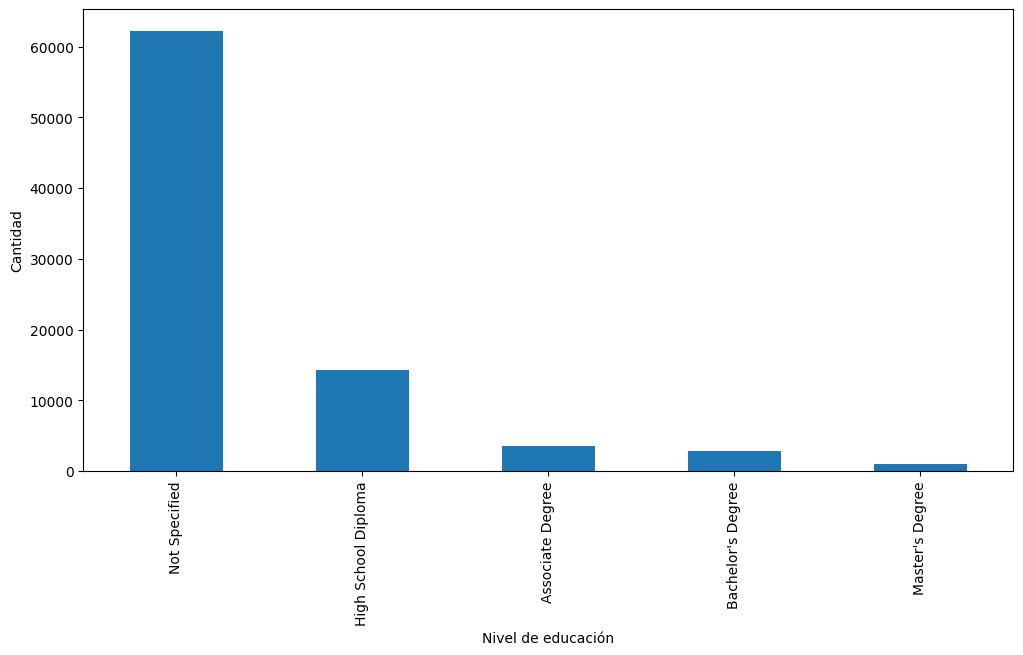

In [ ]:
# Gráfico de barras para la variable "Education.Required"
educ_counts = df_jobs['Education.Required'].value_counts()
educ_counts = educ_counts[educ_counts > 400]
plt.figure(figsize=(12, 6))
educ_counts.plot(kind='bar')
plt.xlabel('Nivel de educación')
plt.ylabel('Cantidad')
plt.show()

In [ ]:
df_jobs

Job.ID                                              Title  \
0         111                               Server @ Tacolicious   
1         113                   Kitchen Staff/Chef @ Claude Lane   
2         117               Bartender @ Machka Restaurants Corp.   
3         121                            Server @ Teriyaki House   
4         127        Kitchen Staff/Chef @ Rosa Mexicano - Sunset   
...       ...                                                ...   
84085      82  Book Keeper @ National Japanese American Histo...   
84086      83                 Kitchen Staff/Chef @ Emporio Rulli   
84087      84                                  Driver @ Onigilly   
84088      88               Line Cook @ Machka Restaurants Corp.   
84089      92                         Cashier @ Kazoo Restaurant   

                 Position                                        Company  \
0                  Server                                    Tacolicious   
1      Kitchen Staff/Chef                                    Claude Lane   
2               Bartender                       Machka Restaurants Corp.   
3                  Server                                 Teriyaki House   
4      Kitchen Staff/Chef                         Rosa Mexicano - Sunset   
...                   ...                                            ...   
84085         Book Keeper  National Japanese American Historical Society   
84086  Kitchen Staff/Chef                                  Emporio Rulli   
84087              Driver                                       Onigilly   
84088           Line Cook                       Machka Restaurants Corp.   
84089             Cashier                               Kazoo Restaurant   

                City Employment.Type  \
0          Palo Alto       Part-Time   
1      San Francisco       Part-Time   
2      San Francisco       Part-Time   
3           Brisbane       Part-Time   
4        Los Angeles       Part-Time   
...              ...             ...   
84085  San Francisco       Part-Time   
84086       Larkspur       Part-Time   
84087  San Francisco       Part-Time   
84088  San Francisco       Part-Time   
84089       San Jose       Part-Time   

                                         Job.Description Education.Required  \
0      Tacolicious' first Palo Alto store just opened...                      
1       \r\n\r\nNew French Brasserie in S.F. Financia...                      
2      We are a popular Mediterranean wine bar and re...                      
3       ● Serve food/drinks to customers in a profess...                      
4      Located at the heart of Hollywood, we are one ...                      
...                                                  ...                ...   
84085  NJAHS stands for National Japanese American Hi...                      
84086  Weekend Brunch Line Cook \r\n● Other shifts ma...                      
84087  ONIGILLY (Japanese rice ball wraps) seeks outg...                      
84088  We are a popular Mediterranean restaurant in F...                      
84089   We are looking for a cashier! \r\n\r\n ● Take...                      

        Latitude   Longitude  
0      37.443346 -122.161170  
1      37.789830 -122.404268  
2      37.795597 -122.402963  
3      37.685073 -122.400275  
4      34.073384 -118.460439  
...          ...         ...  
84085  37.785874 -122.429495  
84086  37.935384 -122.535025  
84087  37.791409 -122.404413  
84088  37.795597 -122.402963  
84089  37.349233 -121.893302  

[84090 rows x 10 columns]

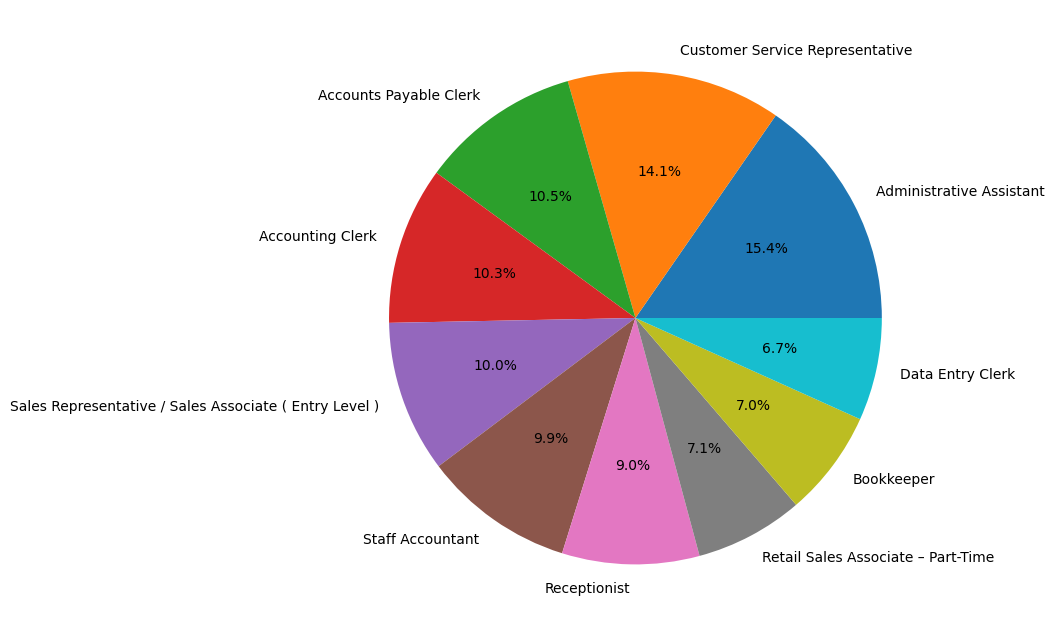

In [ ]:
# Gráfico de sectores para la variable "Position"
title_counts = df_jobs['Position'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(title_counts, labels=title_counts.index, autopct='%1.1f%%')
plt.show()

Education Required

In [ ]:
df_jobs

Job.ID                                              Title  \
0         111                               Server @ Tacolicious   
1         113                   Kitchen Staff/Chef @ Claude Lane   
2         117               Bartender @ Machka Restaurants Corp.   
3         121                            Server @ Teriyaki House   
4         127        Kitchen Staff/Chef @ Rosa Mexicano - Sunset   
...       ...                                                ...   
84085      82  Book Keeper @ National Japanese American Histo...   
84086      83                 Kitchen Staff/Chef @ Emporio Rulli   
84087      84                                  Driver @ Onigilly   
84088      88               Line Cook @ Machka Restaurants Corp.   
84089      92                         Cashier @ Kazoo Restaurant   

                 Position                                        Company  \
0                  Server                                    Tacolicious   
1      Kitchen Staff/Chef                                    Claude Lane   
2               Bartender                       Machka Restaurants Corp.   
3                  Server                                 Teriyaki House   
4      Kitchen Staff/Chef                         Rosa Mexicano - Sunset   
...                   ...                                            ...   
84085         Book Keeper  National Japanese American Historical Society   
84086  Kitchen Staff/Chef                                  Emporio Rulli   
84087              Driver                                       Onigilly   
84088           Line Cook                       Machka Restaurants Corp.   
84089             Cashier                               Kazoo Restaurant   

                City Employment.Type  \
0          Palo Alto       Part-Time   
1      San Francisco       Part-Time   
2      San Francisco       Part-Time   
3           Brisbane       Part-Time   
4        Los Angeles       Part-Time   
...              ...             ...   
84085  San Francisco       Part-Time   
84086       Larkspur       Part-Time   
84087  San Francisco       Part-Time   
84088  San Francisco       Part-Time   
84089       San Jose       Part-Time   

                                         Job.Description Education.Required  \
0      Tacolicious' first Palo Alto store just opened...                      
1       \r\n\r\nNew French Brasserie in S.F. Financia...                      
2      We are a popular Mediterranean wine bar and re...                      
3       ● Serve food/drinks to customers in a profess...                      
4      Located at the heart of Hollywood, we are one ...                      
...                                                  ...                ...   
84085  NJAHS stands for National Japanese American Hi...                      
84086  Weekend Brunch Line Cook \r\n● Other shifts ma...                      
84087  ONIGILLY (Japanese rice ball wraps) seeks outg...                      
84088  We are a popular Mediterranean restaurant in F...                      
84089   We are looking for a cashier! \r\n\r\n ● Take...                      

        Latitude   Longitude  
0      37.443346 -122.161170  
1      37.789830 -122.404268  
2      37.795597 -122.402963  
3      37.685073 -122.400275  
4      34.073384 -118.460439  
...          ...         ...  
84085  37.785874 -122.429495  
84086  37.935384 -122.535025  
84087  37.791409 -122.404413  
84088  37.795597 -122.402963  
84089  37.349233 -121.893302  

[84090 rows x 10 columns]

Skills demandadas WordCloud

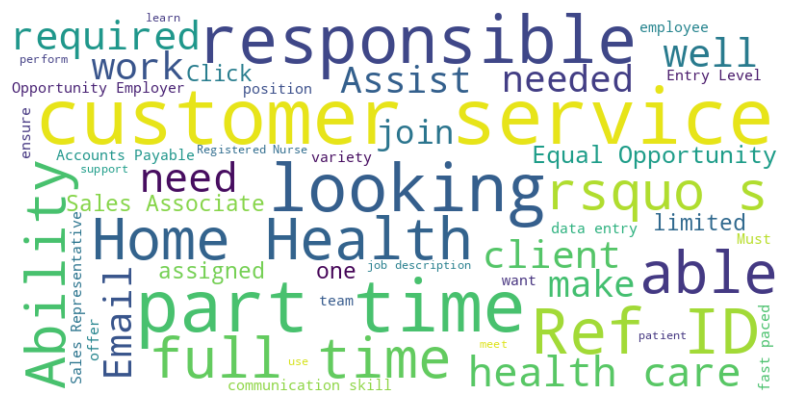

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Obtener una lista de todos los títulos de empleo
job_titles = df_jobs['Job.Description'].tolist()

# Unir todos los títulos en un solo texto
text = ' '.join(job_titles)

#Eliminamos 'nbsp' que viene de "non-breaking space" y no tiene un significado
text = text.replace('nbsp', '')
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Matriz de similitud collaborative filtering

In [ ]:
import pandas as pd

# Obtener una lista de los job IDs presentes en df_views
job_ids = df_views['Job.ID'].unique()

# Filtrar el dataframe df_jobs por los job IDs presentes en df_views
df_jobs = df_jobs[df_jobs['Job.ID'].isin(job_ids)]

In [ ]:
import pandas as pd

# Obtener una lista de los job IDs presentes en df_jobs
job_ids = df_jobs['Job.ID'].unique()

# Filtrar el dataframe df_jobs por los job IDs presentes en df_views
df_views = df_views[df_views['Job.ID'].isin(job_ids)]


####Preparacion matrix para elegir

In [ ]:
df_views.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 5 to 12369
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Applicant.ID   2506 non-null   int64  
 1   Job.ID         2506 non-null   int64  
 2   Title          2506 non-null   object 
 3   Position       2506 non-null   object 
 4   Company        2402 non-null   object 
 5   City           2506 non-null   object 
 6   State.Name     2506 non-null   object 
 7   State.Code     2506 non-null   object 
 8   Industry       920 non-null    object 
 9   View.Start     2506 non-null   object 
 10  View.End       2140 non-null   object 
 11  View.Duration  2140 non-null   float64
 12  Created.At     2506 non-null   object 
 13  Updated.At     2506 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 293.7+ KB


In [ ]:
# Eliminar filas donde view.duration es nulo
df_views = df_views.dropna(subset=['View.Duration'])

# Verificar el resultado
df_views.shape

(2140, 14)

In [ ]:
# Calcular los cuartiles de view.duration
q1 = df_views['View.Duration'].quantile(0.25)
q3 = df_views['View.Duration'].quantile(0.75)

# Calcular el rango intercuartílico
iqr = q3 - q1

# Definir los límites para filtrar los valores extremos
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Filtrar los valores extremos
df_views = df_views[(df_views['View.Duration'] >= lower_limit) & (df_views['View.Duration'] <= upper_limit)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Supongamos que tienes una columna 'Columna1' que deseas estandarizar en un DataFrame df

scaler = MinMaxScaler(feature_range=(0, 1))  # Especifica el rango de escalado entre 0 y 1
df_views['View.Duration'] = scaler.fit_transform(df_views[['View.Duration']])

In [ ]:
df_views = df_views.groupby(['Applicant.ID', 'Job.ID']).agg({'View.Duration': 'sum', 'Title': 'first', 'Position': 'first','Company': 'first','City': 'first'}).reset_index()
df_views.shape

(1446, 7)

In [ ]:
df_views

Applicant.ID  Job.ID  View.Duration  \
0               42  153197       0.262887   
1               96     376       0.917526   
2               96     488       0.015464   
3              601      81       0.855670   
4              601     111       0.551546   
...            ...     ...            ...   
1441         14545  260689       0.190722   
1442         14546  227061       1.000000   
1443         14547  231297       0.010309   
1444         14552  231297       0.041237   
1445         14616  290296       0.582474   

                                                  Title  \
0                                Driving Partner @ Uber   
1                                       Server @ Waraku   
2                        Kitchen Staff @ Izakaya Yuzuki   
3                  Line Cook @ INDO Restaurant & Lounge   
4                                  Server @ Tacolicious   
...                                                 ...   
1441  Pediatric In-Home Registered Nurse (RN) or Lic...   
1442              Personal Driver/Chauffeur @ Quest LLC   
1443  Personal Assistant/ Administrative Assistant @...   
1444  Personal Assistant/ Administrative Assistant @...   
1445  Administrative Assistant (Part Time) @ Pacific...   

                                               Position  \
0                                       Driving Partner   
1                                                Server   
2                                         Kitchen Staff   
3                                             Line Cook   
4                                                Server   
...                                                 ...   
1441  Pediatric In-Home Registered Nurse (RN) or Lic...   
1442                          Personal Driver/Chauffeur   
1443       Personal Assistant/ Administrative Assistant   
1444       Personal Assistant/ Administrative Assistant   
1445               Administrative Assistant (Part Time)   

                            Company           City  
0                              Uber  San Francisco  
1                            Waraku  San Francisco  
2                    Izakaya Yuzuki  San Francisco  
3          INDO Restaurant & Lounge      Palo Alto  
4                       Tacolicious      Palo Alto  
...                             ...            ...  
1441  Pediatria Healthcare for Kids     Snellville  
1442                      Quest LLC    los angeles  
1443                      Quest LLC       New York  
1444                      Quest LLC       New York  
1445      Pacific Office Automation  San Francisco  

[1446 rows x 7 columns]

In [ ]:
df_views.head()

Applicant.ID  Job.ID  View.Duration                                 Title  \
0            42  153197       0.262887                Driving Partner @ Uber   
1            96     376       0.917526                       Server @ Waraku   
2            96     488       0.015464        Kitchen Staff @ Izakaya Yuzuki   
3           601      81       0.855670  Line Cook @ INDO Restaurant & Lounge   
4           601     111       0.551546                  Server @ Tacolicious   

          Position                   Company           City  
0  Driving Partner                      Uber  San Francisco  
1           Server                    Waraku  San Francisco  
2    Kitchen Staff            Izakaya Yuzuki  San Francisco  
3        Line Cook  INDO Restaurant & Lounge      Palo Alto  
4           Server               Tacolicious      Palo Alto

#####Seleccion jobs

Cogemos Jobs que hayan sido vistos por al menos 30 usuarios para hacer el test

In [ ]:
# Filtrar los jobs con más vistas en df_views
jobs_views = df_views['Job.ID'].value_counts()
jobs_ranking = jobs_views[jobs_views > 5]
jobs_ranking=jobs_ranking.index.tolist()
jobs_ranking

[231297,
 221890,
 153198,
 48285,
 48200,
 48284,
 153199,
 153197,
 227061,
 214345,
 145914,
 213833,
 141083,
 153201,
 136601,
 153200,
 151156,
 153205,
 221889,
 235787,
 150718,
 153202]

In [ ]:
df_filtrado = df_views[df_views['Job.ID'].isin(jobs_ranking)]
df_filtrado.shape

(395, 7)

In [ ]:
# Filtrar los usuarios con más vistas en df_views
user_views = df_filtrado['Applicant.ID'].value_counts()
user_ranking = user_views[user_views > 4]
user_ranking=user_ranking.index.tolist()
user_ranking

[9704, 6808]

Vamos a quitar de los datos un dato que sea de un Job con más usuarios que lo han visto, y que el usuario haya visto tambien otros jobs. Por tanto buscaremos el numero de usuario y dentro de sus jobs que ha visto los que más visualizaciones tengan en la lista jobs_ranking

In [ ]:
df_filtrado[(df_filtrado['Applicant.ID']==9704)]# Primer dato elegido  9704,153198
#[231297,221890,153198,48285,48200,48284,153199,153197,82601,68250,227061,145914,214345,213833,65282,141083,84746, 153201,

Applicant.ID  Job.ID  View.Duration                   Title  \
144          9704  153197       0.432990  Driving Partner @ Uber   
145          9704  153198       0.082474  Driving Partner @ Uber   
146          9704  153199       0.164948  Driving Partner @ Uber   
147          9704  153200       0.164948  Driving Partner @ Uber   
148          9704  153201       0.195876  Driving Partner @ Uber   
149          9704  153202       0.262887  Driving Partner @ Uber   
152          9704  153205       0.242268  Driving Partner @ Uber   

            Position Company           City  
144  Driving Partner    Uber  San Francisco  
145  Driving Partner    Uber    Los Angeles  
146  Driving Partner    Uber        Chicago  
147  Driving Partner    Uber         Boston  
148  Driving Partner    Uber      Ann Arbor  
149  Driving Partner    Uber       Oklahoma  
152  Driving Partner    Uber    Minneapolis

In [ ]:
df_filtrado[(df_filtrado['Applicant.ID']==11927)]# Segund dato elegido 11927,141083

Applicant.ID  Job.ID  View.Duration                      Title  \
550         11927  136601       0.453608    Copy Clerk @ OfficeTeam   
552         11927  141083       0.474227  Receptionist @ OfficeTeam   

         Position     Company     City  
550    Copy Clerk  OfficeTeam  Chicago  
552  Receptionist  OfficeTeam  Chicago

In [ ]:
df_filtrado[(df_filtrado['Applicant.ID']==6808)]# Tercer dato elegido 6808,231297

Applicant.ID  Job.ID  View.Duration  \
25          6808  153197       0.824742   
33          6808  221889       0.077320   
34          6808  221890       0.402062   
35          6808  227061       0.577320   
36          6808  231297       0.195876   

                                                Title  \
25                             Driving Partner @ Uber   
33  Business Analyst Houston Texas @ Rose Internat...   
34               Administrative Assistant @ Quest LLC   
35              Personal Driver/Chauffeur @ Quest LLC   
36  Personal Assistant/ Administrative Assistant @...   

                                        Position             Company  \
25                               Driving Partner                Uber   
33                Business Analyst Houston Texas  Rose International   
34                      Administrative Assistant           Quest LLC   
35                     Personal Driver/Chauffeur           Quest LLC   
36  Personal Assistant/ Administrative Assistant           Quest LLC   

               City  
25    San Francisco  
33  Jefferson City   
34      los angeles  
35      los angeles  
36         New York

####Vamos a eliminar los tres datos

In [ ]:
df_views_test=df_views

In [ ]:
df_views_test.loc[(df_views_test["Applicant.ID"] == 9704) & (df_views_test["Job.ID"] == 153198)]

Applicant.ID  Job.ID  View.Duration                   Title  \
145          9704  153198       0.082474  Driving Partner @ Uber   

            Position Company         City  
145  Driving Partner    Uber  Los Angeles

In [ ]:
df_views_test.drop(145, inplace=True)

In [ ]:
df_views_test.loc[(df_views_test["Applicant.ID"] == 11927) & (df_views_test["Job.ID"] == 141083)]

Applicant.ID  Job.ID  View.Duration                      Title  \
552         11927  141083       0.474227  Receptionist @ OfficeTeam   

         Position     Company     City  
552  Receptionist  OfficeTeam  Chicago

In [ ]:
df_views_test.drop(552, inplace=True)

In [ ]:
df_views_test.loc[(df_views_test["Applicant.ID"] == 6808) & (df_views_test["Job.ID"] == 231297)]

Applicant.ID  Job.ID  View.Duration  \
36          6808  231297       0.195876   

                                                Title  \
36  Personal Assistant/ Administrative Assistant @...   

                                        Position    Company      City  
36  Personal Assistant/ Administrative Assistant  Quest LLC  New York

In [ ]:
df_views_test.drop(36, inplace=True)

In [ ]:
df_views_test

Applicant.ID  Job.ID  View.Duration  \
0               42  153197       0.262887   
1               96     376       0.917526   
2               96     488       0.015464   
3              601      81       0.855670   
4              601     111       0.551546   
...            ...     ...            ...   
1441         14545  260689       0.190722   
1442         14546  227061       1.000000   
1443         14547  231297       0.010309   
1444         14552  231297       0.041237   
1445         14616  290296       0.582474   

                                                  Title  \
0                                Driving Partner @ Uber   
1                                       Server @ Waraku   
2                        Kitchen Staff @ Izakaya Yuzuki   
3                  Line Cook @ INDO Restaurant & Lounge   
4                                  Server @ Tacolicious   
...                                                 ...   
1441  Pediatric In-Home Registered Nurse (RN) or Lic...   
1442              Personal Driver/Chauffeur @ Quest LLC   
1443  Personal Assistant/ Administrative Assistant @...   
1444  Personal Assistant/ Administrative Assistant @...   
1445  Administrative Assistant (Part Time) @ Pacific...   

                                               Position  \
0                                       Driving Partner   
1                                                Server   
2                                         Kitchen Staff   
3                                             Line Cook   
4                                                Server   
...                                                 ...   
1441  Pediatric In-Home Registered Nurse (RN) or Lic...   
1442                          Personal Driver/Chauffeur   
1443       Personal Assistant/ Administrative Assistant   
1444       Personal Assistant/ Administrative Assistant   
1445               Administrative Assistant (Part Time)   

                            Company           City  
0                              Uber  San Francisco  
1                            Waraku  San Francisco  
2                    Izakaya Yuzuki  San Francisco  
3          INDO Restaurant & Lounge      Palo Alto  
4                       Tacolicious      Palo Alto  
...                             ...            ...  
1441  Pediatria Healthcare for Kids     Snellville  
1442                      Quest LLC    los angeles  
1443                      Quest LLC       New York  
1444                      Quest LLC       New York  
1445      Pacific Office Automation  San Francisco  

[1443 rows x 7 columns]

####Creamos la matriz de similitud

In [ ]:
import pandas as pd
import numpy as np

# Cargar los datos desde el archivo CSV


# Crear una lista de todos los IDs únicos
unique_applicant_ids = df_views_test["Applicant.ID"].unique()
unique_job_ids = df_views_test["Job.ID"].unique()

# Crear una matriz de ceros con dimensiones adecuadas
matrix = np.zeros((len(unique_applicant_ids), len(unique_job_ids)))

# Rellenar la matriz con las interacciones
for _, row in df_views_test.iterrows():
    applicant_id = row["Applicant.ID"]
    job_id = row["Job.ID"]
    applicant_index = np.where(unique_applicant_ids == applicant_id)[0][0]
    job_index = np.where(unique_job_ids == job_id)[0][0]
    matrix[applicant_index][job_index] = row['View.Duration']



Para mostrar la estructura de la matriz, descomentar este código


In [ ]:
'''
# Mostrar la matriz con los IDs correspondientes de ejemplo para ver la estructura

# Crear una lista de todos los IDs únicos
unique_applicant_ids = df_filtrado["Applicant.ID"].unique()[:10]
unique_job_ids = df_filtrado["Job.ID"].unique()[:10]

# Crear una matriz de ceros con dimensiones adecuadas
matrix = np.zeros((len(unique_applicant_ids), len(unique_job_ids)))

# Rellenar la matriz con las interacciones
for _, row in df_views.iterrows():
    applicant_id = row["Applicant.ID"]
    job_id = row["Job.ID"]
    if applicant_id in unique_applicant_ids and job_id in unique_job_ids:
        applicant_index = np.where(unique_applicant_ids == applicant_id)[0][0]
        job_index = np.where(unique_job_ids == job_id)[0][0]
        matrix[applicant_index][job_index] =  round(row["View.Duration"], 2)

# Mostrar la matriz con los IDs correspondientes
print("   ", end="")
for job_id in unique_job_ids:
    print(f" {str(job_id)[:50]}", end="")
print()
for i, applicant_id in enumerate(unique_applicant_ids):
    print(f"{str(applicant_id)[:50]} ", end="")
    for j in range(len(unique_job_ids)):
        print(f" {matrix[i][j]}", end="")
    print()
'''

'\n# Mostrar la matriz con los IDs correspondientes de ejemplo para ver la estructura\n\n# Crear una lista de todos los IDs únicos\nunique_applicant_ids = df_filtrado["Applicant.ID"].unique()[:10]\nunique_job_ids = df_filtrado["Job.ID"].unique()[:10]\n\n# Crear una matriz de ceros con dimensiones adecuadas\nmatrix = np.zeros((len(unique_applicant_ids), len(unique_job_ids)))\n\n# Rellenar la matriz con las interacciones\nfor _, row in df_views.iterrows():\n    applicant_id = row["Applicant.ID"]\n    job_id = row["Job.ID"]\n    if applicant_id in unique_applicant_ids and job_id in unique_job_ids:\n        applicant_index = np.where(unique_applicant_ids == applicant_id)[0][0]\n        job_index = np.where(unique_job_ids == job_id)[0][0]\n        matrix[applicant_index][job_index] =  round(row["View.Duration"], 2)\n\n# Mostrar la matriz con los IDs correspondientes\nprint("   ", end="")\nfor job_id in unique_job_ids:\n    print(f" {str(job_id)[:50]}", end="")\nprint()\nfor i, applicant_id 

####User-based

Hay que recomendar para los 3 usuarios: 9704,11927,6808

Recomendaciones eliminadas: 6808,231297   11927,141083   9704,153198

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


# Calcular la matriz de similitud de coseno entre usuarios
user_similarity = cosine_similarity(matrix)

# Diccionario para almacenar las recomendaciones por usuario
user_recommendations = {}

# Obtener las recomendaciones para cada usuario
for target_applicant_id in [9704, 11927, 6808]:
    # Calcular la puntuación normalizada del usuario objetivo
    target_user_index = np.where(unique_applicant_ids == target_applicant_id)[0][0]
    target_user_scores = matrix[target_user_index]
    target_user_norm_scores = target_user_scores / np.linalg.norm(target_user_scores)

    # Calcular las recomendaciones basadas en Collaborative Filtering
    recommendations = np.argsort(target_user_norm_scores)[::-1]

    # Verificar si el usuario ya ha visto los trabajos recomendados
    viewed_jobs = df_views_test[df_views_test["Applicant.ID"] == target_applicant_id]["Job.ID"].values
    valid_recommendations = []

    for job_index in recommendations:
        job_id = unique_job_ids[job_index]

        # Verificar si el usuario ya ha visto el trabajo recomendado
        if job_id not in viewed_jobs:
            valid_recommendations.append(job_id)



    # Almacenar las recomendaciones válidas en el diccionario
    user_recommendations[target_applicant_id] = valid_recommendations

# Mostrar las recomendaciones para cada usuario
for user_id, recommendations in user_recommendations.items():
    print("Recomendaciones para el usuario:", user_id)
    for i, job_id in enumerate(recommendations):
        job_row = df_jobs[df_jobs["Job.ID"] == job_id]
        job_position = job_row["Position"].values[0]
        job_title = job_row["Title"].values[0]
        #print(f"Recomendación {i+1}: {job_id}, Title: {job_title}, Position: {job_position}")



print(user_recommendations)



Recomendaciones para el usuario: 9704
Recomendaciones para el usuario: 11927
Recomendaciones para el usuario: 6808
{9704: [147836, 141431, 140619, 143877, 146399, 137718, 140728, 146800, 145468, 144352, 140414, 146431, 137758, 175518, 150718, 144699, 144489, 137609, 141812, 145105, 143612, 173931, 426, 137507, 150999, 147045, 144173, 140966, 143482, 141512, 141489, 141487, 141443, 141427, 141266, 140613, 140425, 140081, 149241, 143334, 144960, 144222, 146828, 139789, 146767, 139761, 141102, 146260, 143819, 141018, 147218, 134302, 137366, 149430, 140703, 134509, 144046, 148664, 148234, 137338, 141209, 145940, 149151, 136940, 145482, 150207, 146653, 137134, 142248, 142168, 149342, 144757, 146870, 141038, 147838, 147358, 148013, 145436, 144527, 151434, 137316, 150543, 140236, 144170, 148243, 141393, 148971, 146884, 134436, 145129, 136936, 145973, 144415, 151523, 148150, 150524, 150014, 142033, 146324, 146127, 146533, 142288, 141712, 140112, 145631, 142001, 147200, 182218, 146798, 181595, 

#####Comprobaciones de tamaño

Comprobamos que tenemos todas las recomendaciones para cada usuario, todos los ID deberian estar en las recomendaciones de cada Usuario aunque en diferentes posiciones

In [ ]:
#6808,231297   11927,141083   9704,153198
print(231297 in user_recommendations[6808])
print(141083 in user_recommendations[6808])
print(153198 in user_recommendations[6808])
print(231297 in user_recommendations[11927])
print(141083 in user_recommendations[11927])
print(153198 in user_recommendations[11927])
print(231297 in user_recommendations[9704])
print(141083 in user_recommendations[9704])
print(153198 in user_recommendations[9704])

True
True
True
True
True
True
True
True
True


Comprobamos que el número de recomendaciones es correcto. Primero miramos cuantas visualizaciones tiene cada usuario

In [ ]:
print(df_views_test[df_views_test['Applicant.ID']==6808].shape[0])
print(df_views_test[df_views_test['Applicant.ID']==11927].shape[0])
print(df_views_test[df_views_test['Applicant.ID']==9704].shape[0])

14
5
12


Luego comprobamos que la suma de los jobs vistos y las recomendaciones dadas es la misma

In [ ]:
print(len(user_recommendations[6808])+df_views_test[df_views_test['Applicant.ID']==6808].shape[0])
print(len(user_recommendations[11927])+df_views_test[df_views_test['Applicant.ID']==11927].shape[0])
print(len(user_recommendations[9704])+df_views_test[df_views_test['Applicant.ID']==9704].shape[0])

868
868
868


##### Veamos si tienen sentido desde la perspectiva del ojo humano viendo que tipo de jobs vieron los usuarios

In [ ]:
df_views[df_views['Applicant.ID']==9704]

Applicant.ID  Job.ID  View.Duration  \
141          9704     111       0.061856   
142          9704  137177       0.036082   
143          9704  137484       0.108247   
144          9704  153197       0.432990   
146          9704  153199       0.164948   
147          9704  153200       0.164948   
148          9704  153201       0.195876   
149          9704  153202       0.262887   
150          9704  153203       0.237113   
151          9704  153204       0.206186   
152          9704  153205       0.242268   
153          9704  153206       0.231959   

                                                 Title  \
141                               Server @ Tacolicious   
142  Seasonal Retail Fitting Room Associate, Part T...   
143  Seasonal Retail Stock Receiving Part Time, Eve...   
144                             Driving Partner @ Uber   
146                             Driving Partner @ Uber   
147                             Driving Partner @ Uber   
148                             Driving Partner @ Uber   
149                             Driving Partner @ Uber   
150                             Driving Partner @ Uber   
151                             Driving Partner @ Uber   
152                             Driving Partner @ Uber   
153                             Driving Partner @ Uber   

                                              Position      Company  \
141                                             Server  Tacolicious   
142  Seasonal Retail Fitting Room Associate, Part T...       Macy's   
143  Seasonal Retail Stock Receiving Part Time, Eve...       Macy's   
144                                    Driving Partner         Uber   
146                                    Driving Partner         Uber   
147                                    Driving Partner         Uber   
148                                    Driving Partner         Uber   
149                                    Driving Partner         Uber   
150                                    Driving Partner         Uber   
151                                    Driving Partner         Uber   
152                                    Driving Partner         Uber   
153                                    Driving Partner         Uber   

              City  
141      Palo Alto  
142      Palo Alto  
143      Palo Alto  
144  San Francisco  
146        Chicago  
147         Boston  
148      Ann Arbor  
149       Oklahoma  
150          Omaha  
151        Lincoln  
152    Minneapolis  
153       St. Paul

In [ ]:
df_views[df_views['Applicant.ID']==11927]

Applicant.ID  Job.ID  View.Duration  \
550         11927  136601       0.453608   
551         11927  140068       0.561856   
553         11927  145599       0.262887   
554         11927  147200       0.231959   
555         11927  150684       0.319588   

                                                 Title  \
550                            Copy Clerk @ OfficeTeam   
551  Process Clerk- PART TIME 2ND SHIFT 5pm-11pm @ ...   
553         Receptionist/Office Assistant @ OfficeTeam   
554             Receptionist - Healthcare @ OfficeTeam   
555  1st and 2nd Shift Part Time Crossdock Loader @...   

                                         Position     Company     City  
550                                    Copy Clerk  OfficeTeam  Chicago  
551   Process Clerk- PART TIME 2ND SHIFT 5pm-11pm  OfficeTeam  Lombard  
553                 Receptionist/Office Assistant  OfficeTeam  Chicago  
554                     Receptionist - Healthcare  OfficeTeam  Chicago  
555  1st and 2nd Shift Part Time Crossdock Loader      PEAPOD  Chicago

In [ ]:
df_views[df_views['Applicant.ID']==6808]

Applicant.ID  Job.ID  View.Duration  \
22          6808     111       0.427835   
23          6808     413       0.051546   
24          6808     456       0.082474   
25          6808  153197       0.824742   
26          6808  216047       0.020619   
27          6808  216048       1.494845   
28          6808  216051       0.201031   
29          6808  216057       0.077320   
30          6808  216059       0.376289   
31          6808  216060       0.463918   
32          6808  218164       0.056701   
33          6808  221889       0.077320   
34          6808  221890       0.402062   
35          6808  227061       0.577320   

                                                Title  \
22                               Server @ Tacolicious   
23                                 Host @ Tacolicious   
24                               Server @ caffe riace   
25                             Driving Partner @ Uber   
26  Claims Examiner II Los Angeles.CA @ DJs Recrui...   
27  Claims Assistant Los Angeles @ DJs Recruitng S...   
28  Provider Strategy Coordinator Los Angeles.CA @...   
29  Care Management Specialist Los Angeles.CA @ DJ...   
30  MEMBER SERVICES TRAINING SPECIALIST LOS ANGELE...   
31  Call Center Supervisor Los Angeles.CA @ DJs Re...   
32                Sales Representative @ Utivity Inc.   
33  Business Analyst Houston Texas @ Rose Internat...   
34               Administrative Assistant @ Quest LLC   
35              Personal Driver/Chauffeur @ Quest LLC   

                                           Position                Company  \
22                                           Server            Tacolicious   
23                                             Host            Tacolicious   
24                                           Server            caffe riace   
25                                  Driving Partner                   Uber   
26                Claims Examiner II Los Angeles.CA  DJs Recruitng Service   
27                     Claims Assistant Los Angeles  DJs Recruitng Service   
28     Provider Strategy Coordinator Los Angeles.CA  DJs Recruitng Service   
29        Care Management Specialist Los Angeles.CA  DJs Recruitng Service   
30  MEMBER SERVICES TRAINING SPECIALIST LOS ANGELES  DJs Recruitng Service   
31            Call Center Supervisor Los Angeles.CA  DJs Recruitng Service   
32                             Sales Representative           Utivity Inc.   
33                   Business Analyst Houston Texas     Rose International   
34                         Administrative Assistant              Quest LLC   
35                        Personal Driver/Chauffeur              Quest LLC   

               City  
22        Palo Alto  
23        Palo Alto  
24        Palo Alto  
25    San Francisco  
26          Pomona   
27      Los Angeles  
28          Pomona   
29          Pomona   
30          Pomona   
31          Pomona   
32           Denver  
33  Jefferson City   
34      los angeles  
35      los angeles

##### Score User-based

Para usuario 6808 con job eliminado 231297

In [ ]:
scores_users_mat=[]
posicion = user_recommendations[6808].index(231297)
num_posiciones = len(user_recommendations[6808])

score = 1 - ((posicion-1) / (num_posiciones -1))

print("Score:", score)
scores_users_mat.append(score)

Score: 0.6787807737397421


Para usuario 11927 con job eliminado 141083

In [ ]:
posicion = user_recommendations[11927].index(141083)
num_posiciones = len(user_recommendations[11927])

score = 1 - ((posicion-1) / (num_posiciones -1))
print("Score:", score)
scores_users_mat.append(score)

Score: 0.5533642691415313


Para usuario 9704 con job eliminado 153198

In [ ]:
posicion = user_recommendations[9704].index(153198)
num_posiciones = len(user_recommendations[9704])

score = 1 - ((posicion-1) / (num_posiciones -1))
print("Score:", score)
scores_users_mat.append(score)

Score: 0.6748538011695906


####Item-based

Hay que recomendar para los 3 usuarios: 9704,11927,6808

Recomendaciones eliminadas: 6808,231297   11927,141083   9704,153198

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calcular la matriz de similitud de coseno entre trabajos
item_similarity = cosine_similarity(matrix.T)

# Diccionario para almacenar las recomendaciones por usuario
user_recommendations = {}

# Obtener las recomendaciones para cada usuario
for target_applicant_id in [9704, 11927, 6808]:
    # Calcular la puntuación normalizada del usuario objetivo
    target_user_index = np.where(unique_applicant_ids == target_applicant_id)[0][0]
    target_user_scores = matrix[target_user_index]
    target_user_norm_scores = target_user_scores / np.linalg.norm(target_user_scores)

    # Calcular las recomendaciones basadas en Item-Based Collaborative Filtering
    item_scores = np.dot(item_similarity, target_user_norm_scores)
    recommendations = np.argsort(item_scores)[::-1]

    # Verificar si el usuario ya ha visto los trabajos recomendados
    viewed_jobs = df_views_test[df_views_test["Applicant.ID"] == target_applicant_id]["Job.ID"].values
    valid_recommendations = []

    for job_index in recommendations:
        job_id = unique_job_ids[job_index]

        # Verificar si el usuario ya ha visto el trabajo recomendado
        if job_id not in viewed_jobs:
            valid_recommendations.append(job_id)

    # Almacenar las recomendaciones válidas en el diccionario
    user_recommendations[target_applicant_id] = valid_recommendations

# Mostrar las recomendaciones para cada usuario
for user_id, recommendations in user_recommendations.items():
    print("Recomendaciones para el usuario:", user_id)
    for i, job_id in enumerate(recommendations[:20]):
        job_row = df_jobs[df_jobs["Job.ID"] == job_id]
        job_position = job_row["Position"].values[0]
        job_title = job_row["Title"].values[0]
        print(f"Recomendación {i+1}: {job_id}, Title: {job_title}, Position: {job_position}")

print(user_recommendations)


Recomendaciones para el usuario: 9704
Recomendación 1: 216047, Title: Claims Examiner II Los Angeles.CA @ DJs Recruitng Service, Position: Claims Examiner II Los Angeles.CA
Recomendación 2: 216059, Title: MEMBER SERVICES TRAINING SPECIALIST LOS ANGELES @ DJs Recruitng Service, Position: MEMBER SERVICES TRAINING SPECIALIST LOS ANGELES
Recomendación 3: 216051, Title: Provider Strategy Coordinator Los Angeles.CA @ DJs Recruitng Service, Position: Provider Strategy Coordinator Los Angeles.CA
Recomendación 4: 216048, Title: Claims Assistant Los Angeles @ DJs Recruitng Service, Position: Claims Assistant Los Angeles
Recomendación 5: 216060, Title: Call Center Supervisor Los Angeles.CA @ DJs Recruitng Service, Position: Call Center Supervisor Los Angeles.CA
Recomendación 6: 149399, Title: Registered Nurse- ICU @ Allied Health Group, a Cross Country Staffing Company, Position: Registered Nurse- ICU
Recomendación 7: 216057, Title: Care Management Specialist Los Angeles.CA @ DJs Recruitng Servic

#####Comprobaciones de tamaño

Comprobamos que tenemos todas las recomendaciones para cada usuario, todos los ID deberian estar en las recomendaciones de cada Usuario aunque en diferentes posiciones

In [ ]:
#6808,231297   11927,141083   9704,153198
print(231297 in user_recommendations[6808])
print(141083 in user_recommendations[6808])
print(153198 in user_recommendations[6808])
print(231297 in user_recommendations[11927])
print(141083 in user_recommendations[11927])
print(153198 in user_recommendations[11927])
print(231297 in user_recommendations[9704])
print(141083 in user_recommendations[9704])
print(153198 in user_recommendations[9704])

True
True
True
True
True
True
True
True
True


Comprobamos que el número de recomendaciones es correcto. Primero miramos cuantas visualizaciones tiene cada usuario

In [ ]:
print(df_views_test[df_views_test['Applicant.ID']==6808].shape[0])
print(df_views_test[df_views_test['Applicant.ID']==11927].shape[0])
print(df_views_test[df_views_test['Applicant.ID']==9704].shape[0])

14
5
12


Luego comprobamos que la suma de los jobs vistos y las recomendaciones dadas es la misma

In [ ]:
print(len(user_recommendations[6808])+df_views_test[df_views_test['Applicant.ID']==6808].shape[0])
print(len(user_recommendations[11927])+df_views_test[df_views_test['Applicant.ID']==11927].shape[0])
print(len(user_recommendations[9704])+df_views_test[df_views_test['Applicant.ID']==9704].shape[0])

868
868
868


##### Veamos si tienen sentido desde la perspectiva del ojo humano viendo que tipo de jobs vieron los usuarios

In [ ]:
df_views[df_views['Applicant.ID']==9704]

Applicant.ID  Job.ID  View.Duration  \
141          9704     111       0.061856   
142          9704  137177       0.036082   
143          9704  137484       0.108247   
144          9704  153197       0.432990   
146          9704  153199       0.164948   
147          9704  153200       0.164948   
148          9704  153201       0.195876   
149          9704  153202       0.262887   
150          9704  153203       0.237113   
151          9704  153204       0.206186   
152          9704  153205       0.242268   
153          9704  153206       0.231959   

                                                 Title  \
141                               Server @ Tacolicious   
142  Seasonal Retail Fitting Room Associate, Part T...   
143  Seasonal Retail Stock Receiving Part Time, Eve...   
144                             Driving Partner @ Uber   
146                             Driving Partner @ Uber   
147                             Driving Partner @ Uber   
148                             Driving Partner @ Uber   
149                             Driving Partner @ Uber   
150                             Driving Partner @ Uber   
151                             Driving Partner @ Uber   
152                             Driving Partner @ Uber   
153                             Driving Partner @ Uber   

                                              Position      Company  \
141                                             Server  Tacolicious   
142  Seasonal Retail Fitting Room Associate, Part T...       Macy's   
143  Seasonal Retail Stock Receiving Part Time, Eve...       Macy's   
144                                    Driving Partner         Uber   
146                                    Driving Partner         Uber   
147                                    Driving Partner         Uber   
148                                    Driving Partner         Uber   
149                                    Driving Partner         Uber   
150                                    Driving Partner         Uber   
151                                    Driving Partner         Uber   
152                                    Driving Partner         Uber   
153                                    Driving Partner         Uber   

              City  
141      Palo Alto  
142      Palo Alto  
143      Palo Alto  
144  San Francisco  
146        Chicago  
147         Boston  
148      Ann Arbor  
149       Oklahoma  
150          Omaha  
151        Lincoln  
152    Minneapolis  
153       St. Paul

In [ ]:
df_views[df_views['Applicant.ID']==11927]

Applicant.ID  Job.ID  View.Duration  \
550         11927  136601       0.453608   
551         11927  140068       0.561856   
553         11927  145599       0.262887   
554         11927  147200       0.231959   
555         11927  150684       0.319588   

                                                 Title  \
550                            Copy Clerk @ OfficeTeam   
551  Process Clerk- PART TIME 2ND SHIFT 5pm-11pm @ ...   
553         Receptionist/Office Assistant @ OfficeTeam   
554             Receptionist - Healthcare @ OfficeTeam   
555  1st and 2nd Shift Part Time Crossdock Loader @...   

                                         Position     Company     City  
550                                    Copy Clerk  OfficeTeam  Chicago  
551   Process Clerk- PART TIME 2ND SHIFT 5pm-11pm  OfficeTeam  Lombard  
553                 Receptionist/Office Assistant  OfficeTeam  Chicago  
554                     Receptionist - Healthcare  OfficeTeam  Chicago  
555  1st and 2nd Shift Part Time Crossdock Loader      PEAPOD  Chicago

In [ ]:
df_views[df_views['Applicant.ID']==6808]

Applicant.ID  Job.ID  View.Duration  \
22          6808     111       0.427835   
23          6808     413       0.051546   
24          6808     456       0.082474   
25          6808  153197       0.824742   
26          6808  216047       0.020619   
27          6808  216048       1.494845   
28          6808  216051       0.201031   
29          6808  216057       0.077320   
30          6808  216059       0.376289   
31          6808  216060       0.463918   
32          6808  218164       0.056701   
33          6808  221889       0.077320   
34          6808  221890       0.402062   
35          6808  227061       0.577320   

                                                Title  \
22                               Server @ Tacolicious   
23                                 Host @ Tacolicious   
24                               Server @ caffe riace   
25                             Driving Partner @ Uber   
26  Claims Examiner II Los Angeles.CA @ DJs Recrui...   
27  Claims Assistant Los Angeles @ DJs Recruitng S...   
28  Provider Strategy Coordinator Los Angeles.CA @...   
29  Care Management Specialist Los Angeles.CA @ DJ...   
30  MEMBER SERVICES TRAINING SPECIALIST LOS ANGELE...   
31  Call Center Supervisor Los Angeles.CA @ DJs Re...   
32                Sales Representative @ Utivity Inc.   
33  Business Analyst Houston Texas @ Rose Internat...   
34               Administrative Assistant @ Quest LLC   
35              Personal Driver/Chauffeur @ Quest LLC   

                                           Position                Company  \
22                                           Server            Tacolicious   
23                                             Host            Tacolicious   
24                                           Server            caffe riace   
25                                  Driving Partner                   Uber   
26                Claims Examiner II Los Angeles.CA  DJs Recruitng Service   
27                     Claims Assistant Los Angeles  DJs Recruitng Service   
28     Provider Strategy Coordinator Los Angeles.CA  DJs Recruitng Service   
29        Care Management Specialist Los Angeles.CA  DJs Recruitng Service   
30  MEMBER SERVICES TRAINING SPECIALIST LOS ANGELES  DJs Recruitng Service   
31            Call Center Supervisor Los Angeles.CA  DJs Recruitng Service   
32                             Sales Representative           Utivity Inc.   
33                   Business Analyst Houston Texas     Rose International   
34                         Administrative Assistant              Quest LLC   
35                        Personal Driver/Chauffeur              Quest LLC   

               City  
22        Palo Alto  
23        Palo Alto  
24        Palo Alto  
25    San Francisco  
26          Pomona   
27      Los Angeles  
28          Pomona   
29          Pomona   
30          Pomona   
31          Pomona   
32           Denver  
33  Jefferson City   
34      los angeles  
35      los angeles

##### Score User-based

Para usuario 6808 con job eliminado 231297

In [ ]:
scores_items_mat=[]
posicion = user_recommendations[6808].index(231297)
num_posiciones = len(user_recommendations[6808])

score = 1 - ((posicion-1) / (num_posiciones -1))
print("Score:", score)
scores_items_mat.append(score)

Score: 0.6354044548651817


Para usuario 11927 con job eliminado 141083

In [ ]:
posicion = user_recommendations[11927].index(141083)
num_posiciones = len(user_recommendations[11927])

score = 1 - ((posicion-1) / (num_posiciones -1))
print("Score:", score)
scores_items_mat.append(score)

Score: 1.0


Para usuario 9704 con job eliminado 153198

In [ ]:
posicion = user_recommendations[9704].index(153198)
num_posiciones = len(user_recommendations[9704])

score = 1 - ((posicion-1) / (num_posiciones -1))
print("Score:", score)
scores_items_mat.append(score)

Score: 0.6514619883040935


#NLP


##Importar librerías

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

https://github.com/ArmandDS/jobs_recommendations/blob/master/job_analysis_content_recommendation.ipynb


In [ ]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def limpieza(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

##df_views

In [ ]:
df_views_text = df_views[['Applicant.ID', 'Job.ID', 'Position', 'Company','City']]
df_views_text["text"] = df_views_text["Position"].map(str) + "  " + df_views_text["Company"] +"  "+ df_views_text["City"]
df_views_text['text'] = df_views_text['text'].map(str).apply(limpieza)
df_views_text = df_views_text[['Applicant.ID','text']]
df_views_text = df_views_text.groupby('Applicant.ID')['text'].agg(lambda x: ' '.join(x)).reset_index()

df_views_text.head()

<ipython-input-847-db76bb38949c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_views_text["text"] = df_views_text["Position"].map(str) + "  " + df_views_text["Company"] +"  "+ df_views_text["City"]
<ipython-input-847-db76bb38949c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_views_text['text'] = df_views_text['text'].map(str).apply(limpieza)


Applicant.ID                                               text
0            42                   drive partner uber san francisco
1            96  server waraku san francisco kitchen staff izak...
2           601  line cook indo restaurant lounge palo alto ser...
3          2075                   drive partner uber san francisco
4          2520  macys hire macys seasonal starbucks barista pa...

## User Dataset a partir de df_exp


###df_exp

In [ ]:
df_exp.isnull().sum()

Applicant.ID               0
Position.Name            249
Employer.Name              8
City                    1005
State.Name              1302
State.Code              1302
Start.Date               936
End.Date                2122
Job.Description            0
Salary                  3120
Can.Contact.Employer    2381
Created.At                 0
Updated.At                 0
dtype: int64

In [ ]:
df_exp["text"] = df_exp["Position.Name"] .map(str) + " " + df_exp["Employer.Name"] +" "+" "+df_exp['Job.Description']
df_exp.head()

Applicant.ID                                      Position.Name  \
0         10001  Account Manager / Sales Administration / Quali...   
1         10001    Electronics Technician / Item Master Controller   
2         10001                                   Machine Operator   
3         10003                             maintenance technician   
4         10003                                 Electrical Helper    

               Employer.Name         City            State.Name State.Code  \
0         Barcode Resourcing   Bellingham            Washington         WA   
1                Ryzex Group   Bellingham            Washington         WA   
2                comptec inc       Custer            Washington         WA   
3           Winn residental    washington  District of Columbia         DC   
4  michael and son services   alexandria               Virginia         VA   

   Start.Date    End.Date                                    Job.Description  \
0  2012-10-15         NaN                                                      
1  2001-12-01  2012-04-01                                                      
2  1997-01-01  1999-01-01                                                      
3         NaN         NaN  Necessary maintenance for "Make Ready" Plumbin...   
4         NaN         NaN    repair and services of electrical construction    

   Salary Can.Contact.Employer               Created.At  \
0     NaN                  NaN  2014-12-12 20:10:02 UTC   
1     NaN                  NaN  2014-12-12 20:10:02 UTC   
2     NaN                  NaN  2014-12-12 20:10:02 UTC   
3    10.0                False  2014-12-12 21:27:05 UTC   
4     NaN                False  2014-12-12 21:27:05 UTC   

                Updated.At                                               text  
0  2014-12-12 20:10:02 UTC  Account Manager / Sales Administration / Quali...  
1  2014-12-12 20:10:02 UTC  Electronics Technician / Item Master Controlle...  
2  2014-12-12 20:10:02 UTC                     Machine Operator comptec inc    
3  2014-12-12 21:27:05 UTC  maintenance technician Winn residental   Neces...  
4  2014-12-12 21:27:05 UTC  Electrical Helper  michael and son services   ...

A falta de agrupación hay 1005 nulos en City que desaparecerán al agrupar por Applicant.ID

In [ ]:
df_exp_text=df_exp[['Applicant.ID','text','City','State.Name','Start.Date']]
# Rellenar los valores nulos en la columna 'text' con una cadena vacía
df_exp_text.loc[:, 'text'] = df_exp_text['text'].fillna(" ")
# Aplicar la función de limpieza a la columna 'text'
df_exp_text.loc[:, 'text'] = df_exp_text['text'].map(str).apply(limpieza)
df_exp_text.isnull().sum()


<ipython-input-850-5c6b56558493>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_text.loc[:, 'text'] = df_exp_text['text'].fillna(" ")
<ipython-input-850-5c6b56558493>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_text.loc[:, 'text'] = df_exp_text['text'].map(str).apply(limpieza)


Applicant.ID       0
text               0
City            1005
State.Name      1302
Start.Date       936
dtype: int64

Actualizamos las experiencias de manera que si la experiencia más reciente no tiene ciudad y alguna anterior si, se le ponga la ciudad para poder después utilizar el campo 'City' de empleos más recientes agrupando

In [ ]:
# Paso 1: Ordenar el DataFrame
df_exp_sorted = df_exp_text.sort_values(['Applicant.ID', 'Start.Date'], ascending=[False, False])

# Paso 2: Filtrar filas con 'City' no nula
df_filtered = df_exp_sorted.dropna(subset=['City'])
df_filtered
#df_filtered.sort_values(['Applicant.ID', 'Start.Date'], ascending=[False, False])

Applicant.ID                                               text  \
2513         14642  vice president chief human resources officer a...   
2515         14642  various roles serve chief human resources offi...   
2517         14642  program manager professional development instr...   
2519         14642  program manager business industry train divisi...   
2511         14642  adjunct faculty devry university business mana...   
...            ...                                                ...   
3757             3                           prep cook moscone center   
3758             3                          server aloha beach resort   
3759             3                                market intern honda   
2763             2  volunteer school self heal read aloud meir sch...   
2762             2  writer uloop blog cecilia abate write article ...   

                  City  State.Name  Start.Date  
2513     San Francisco  California  2013-07-01  
2515           Oakland  California  2008-08-01  
2517          San Jose  California  2000-02-01  
2519          Columbus        Ohio  1991-02-01  
2511     Downers Grove    Illinois         NaN  
...                ...         ...         ...  
3757     San Francisco  California  2012-09-01  
3758   Shenzhen, China         NaN  2012-05-01  
3759  Guangzhou, China         NaN  2012-01-01  
2763     San Francisco  California  2020-12-01  
2762     San Francisco  California  2006-10-01  

[4891 rows x 5 columns]

In [ ]:
# Paso 3: Obtener la ciudad más reciente de cada grupo
grouped_cities = df_filtered.groupby('Applicant.ID')['City'].first()
grouped_states=df_filtered.groupby('Applicant.ID')['State.Name'].first()
#print(grouped_cities)
print(grouped_states)
# Paso 4: Crear el diccionario con el mapeo de 'Applicant.ID' a la ciudad más reciente
applicant_city_map = grouped_cities.to_dict()
applicant_state_map=grouped_states.to_dict()
# Imprimir el diccionario
#print(applicant_city_map)
print(applicant_state_map)

Applicant.ID
2        California
3        California
6              None
8        California
11       California
            ...    
14630      Illinois
14633      New York
14635      New York
14639      New York
14642    California
Name: State.Name, Length: 2525, dtype: object
{2: 'California', 3: 'California', 6: None, 8: 'California', 11: 'California', 12: 'California', 13: 'California', 14: 'California', 18: 'Illinois', 21: 'California', 22: 'California', 23: 'California', 24: 'California', 26: 'New York', 27: 'North Carolina', 30: 'California', 32: 'California', 33: 'California', 34: 'Wisconsin', 37: 'California', 38: 'California', 39: 'Massachusetts', 40: 'California', 42: 'California', 44: 'California', 45: 'California', 48: 'California', 50: 'California', 51: 'California', 52: 'Texas', 54: 'California', 57: 'California', 63: 'California', 66: 'California', 68: 'Hawaii', 69: 'California', 71: 'California', 73: 'California', 74: 'California', 75: 'California', 76: 'California', 7

In [ ]:
df_exp_sorted = df_exp_text.sort_values('Start.Date', ascending=False)
df_exp_grouped = df_exp_sorted.groupby('Applicant.ID').agg({'text': ''.join, 'City': 'first', 'State.Name': 'first'}).reset_index()

df_exp_grouped.head(20)
df_exp_sorted.isnull().sum()
#df_exp_grouped.sort_values('Applicant.ID', ascending=False)
df_exp_grouped.isnull().sum()

Applicant.ID      0
text              0
City              0
State.Name      155
dtype: int64

In [ ]:
# Paso 2: Aplicar el mapeo al campo 'City' del DataFrame
df_exp_grouped['City'] = df_exp_grouped['Applicant.ID'].map(applicant_city_map)
df_exp_grouped['State.Name'] = df_exp_grouped['Applicant.ID'].map(applicant_state_map)
df_exp_grouped.sort_values('Applicant.ID', ascending=False).shape



(2525, 4)

Podemos comprobar que ha funcionado correctamente por el usuario con ID 14642 que tenía la columna City en su último empleo, tiene como City en el dataset 'San Francisco' de su anterior empleo.

In [ ]:
df_exp_grouped.sort_values(['Applicant.ID'], ascending=[False])

Applicant.ID                                               text  \
2524         14642  founder ceo profhire inc profhire connect scho...   
2523         14639  founder unbind box unbind women found quarterl...   
2522         14635  lpn lifetime assistance inclpn lifetime assita...   
2521         14633  director data website technologies llcdevelopm...   
2520         14630  product strategist careerbuilder emea product ...   
...            ...                                                ...   
4               11                             cashier cristina green   
3                8  deli clerk server cashier food prep order take...   
2                6                              project assistant iom   
1                3  prep cook moscone centerserver aloha beach res...   
0                2  volunteer school self heal read aloud meir sch...   

                  City  State.Name  
2524     San Francisco  California  
2523          New York    New York  
2522         Rochester    New York  
2521          New York    New York  
2520  Stockholm-Globen    Illinois  
...                ...         ...  
4            Daly City  California  
3                 Lodi  California  
2       Nairobi, Kenya        None  
1        San Francisco  California  
0        San Francisco  California  

[2525 rows x 4 columns]

In [ ]:
df_exp_grouped.isnull().sum()

Applicant.ID      0
text              0
City              0
State.Name      155
dtype: int64

###df_users

In [ ]:
df_users=df_exp_grouped

## Jobs dataset a partir de df_jobs

Combinamos en una columna de texto las informaciones

In [ ]:
df_jobs["text"] = df_jobs["Position"] .map(str) + " " + df_jobs["Company"] +" "+ df_jobs["City"]+ " "+df_jobs['Employment.Type']+" "+df_jobs['Job.Description'] +" "+df_jobs['Title']
df_jobs.head(2)

<ipython-input-858-f81ca0d6b0e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jobs["text"] = df_jobs["Position"] .map(str) + " " + df_jobs["Company"] +" "+ df_jobs["City"]+ " "+df_jobs['Employment.Type']+" "+df_jobs['Job.Description'] +" "+df_jobs['Title']


Job.ID                                 Title   Position  \
0     111                  Server @ Tacolicious     Server   
2     117  Bartender @ Machka Restaurants Corp.  Bartender   

                    Company           City Employment.Type  \
0               Tacolicious      Palo Alto       Part-Time   
2  Machka Restaurants Corp.  San Francisco       Part-Time   

                                     Job.Description Education.Required  \
0  Tacolicious' first Palo Alto store just opened...                      
2  We are a popular Mediterranean wine bar and re...                      

    Latitude   Longitude                                               text  
0  37.443346 -122.161170  Server Tacolicious Palo Alto Part-Time Tacolic...  
2  37.795597 -122.402963  Bartender Machka Restaurants Corp. San Francis...

In [ ]:
df_jobs_text = df_jobs[['Job.ID', 'text', 'Title','Position','Latitude','Longitude','City']]

df_jobs_text= df_jobs_text.fillna(" ")

df_jobs_text.head()

Job.ID                                               text  \
0      111  Server Tacolicious Palo Alto Part-Time Tacolic...   
2      117  Bartender Machka Restaurants Corp. San Francis...   
4      127  Kitchen Staff/Chef Rosa Mexicano - Sunset Los ...   
6      131  Server Roy's Woodland Hills Los Angeles Part-T...   
21  134286  EMT - Growing Medical Transportation Company A...   

                                                Title  \
0                                Server @ Tacolicious   
2                Bartender @ Machka Restaurants Corp.   
4         Kitchen Staff/Chef @ Rosa Mexicano - Sunset   
6                       Server @ Roy's Woodland Hills   
21  EMT - Growing Medical Transportation Company @...   

                                        Position   Latitude   Longitude  \
0                                         Server  37.443346 -122.161170   
2                                      Bartender  37.795597 -122.402963   
4                             Kitchen Staff/Chef  34.073384 -118.460439   
6                                         Server  34.186297 -118.606370   
21  EMT - Growing Medical Transportation Company  40.411800  -74.249900   

             City  
0       Palo Alto  
2   San Francisco  
4     Los Angeles  
6     Los Angeles  
21       Aberdeen

In [ ]:
df_jobs_text['text'] = df_jobs_text['text'].apply(limpieza)
df_jobs_text.head()

Job.ID                                               text  \
0      111  server tacolicious palo alto part time tacolic...   
2      117  bartender machka restaurants corp san francisc...   
4      127  kitchen staff chef rosa mexicano sunset los an...   
6      131  server roys woodland hill los angeles part tim...   
21  134286  emt grow medical transportation company abba m...   

                                                Title  \
0                                Server @ Tacolicious   
2                Bartender @ Machka Restaurants Corp.   
4         Kitchen Staff/Chef @ Rosa Mexicano - Sunset   
6                       Server @ Roy's Woodland Hills   
21  EMT - Growing Medical Transportation Company @...   

                                        Position   Latitude   Longitude  \
0                                         Server  37.443346 -122.161170   
2                                      Bartender  37.795597 -122.402963   
4                             Kitchen Staff/Chef  34.073384 -118.460439   
6                                         Server  34.186297 -118.606370   
21  EMT - Growing Medical Transportation Company  40.411800  -74.249900   

             City  
0       Palo Alto  
2   San Francisco  
4     Los Angeles  
6     Los Angeles  
21       Aberdeen

#Content-based filtering

Elección de usuarios para realizar los tests

Nos quedamos con los usarios que tengan visualizaciones de jobs que esten en df_jobs para que puedan ser recomendados

In [ ]:
df_views_cbf = df_views[df_views['Job.ID'].isin(df_jobs['Job.ID'])]


In [ ]:
df_views_cbf = df_views_cbf[df_views_cbf['Applicant.ID'].isin(df_exp['Applicant.ID'])]

In [ ]:
# Contar el número de usuarios únicos en df_views
num_users = df_views_cbf['Applicant.ID'].nunique()

# Imprimir el resultado
print("Número de usuarios únicos:", num_users)

Número de usuarios únicos: 243


###Elegir usuarios

In [ ]:
# Filtrar los jobs con más vistas en df_views
jobs_views = df_views_cbf['Job.ID'].value_counts()
jobs_ranking = jobs_views[jobs_views > 4]
jobs_ranking=jobs_ranking.index.tolist()
jobs_ranking

[221890, 231297, 48285, 48200, 48284, 227061, 235787, 153197, 213833]

In [ ]:
users_views = df_views_cbf['Applicant.ID'].value_counts()
users_ranking = users_views[users_views > 4]
users_ranking=users_ranking.index.tolist()
users_ranking

[14536, 9704, 9995, 14048, 14472, 9954, 9997, 13839, 14491]

Buscar usuarios y empleos relevantes

In [ ]:
for u in [14536, 9704, 9995, 14048, 14472, 9954, 9997, 13839, 14491]:
  lista=df_views_cbf[(df_views_cbf['Applicant.ID']==u)]['Job.ID'].tolist()# usuario 14536 no visualiza jobs populares
  for job in jobs_ranking:
    if job in lista:
      print('Usuario',u,'Job',job)
      break

#[221890, 231297, 48285, 48200, 48284, 227061, 235787, 153197, 213833]

Usuario 9704 Job 153197
Usuario 9954 Job 153197
Usuario 14491 Job 221890


###Eliminar datos de visualizaciones

Vamos a eliminar una visualizacion de cada uno de los usuarios con mas visualizaciones

In [ ]:
df_views_cbf.loc[(df_views_cbf["Applicant.ID"] == 9704) & (df_views_cbf["Job.ID"] == 153197)]

Applicant.ID  Job.ID  View.Duration                   Title  \
144          9704  153197        0.43299  Driving Partner @ Uber   

            Position Company           City  
144  Driving Partner    Uber  San Francisco

In [ ]:
df_views_cbf.drop(144, inplace=True)

In [ ]:
df_views_cbf.loc[(df_views_cbf["Applicant.ID"] == 9954) & (df_views_cbf["Job.ID"] == 153197)]

Applicant.ID  Job.ID  View.Duration                   Title  \
189          9954  153197       0.072165  Driving Partner @ Uber   

            Position Company           City  
189  Driving Partner    Uber  San Francisco

In [ ]:
df_views_cbf.drop(189, inplace=True)

In [ ]:
df_views_cbf.loc[(df_views_cbf["Applicant.ID"] == 14491) & (df_views_cbf["Job.ID"] == 221890)]

Applicant.ID  Job.ID  View.Duration  \
1405         14491  221890       0.092784   

                                     Title                  Position  \
1405  Administrative Assistant @ Quest LLC  Administrative Assistant   

        Company         City  
1405  Quest LLC  los angeles

In [ ]:
df_views_cbf.drop(1405, inplace=True)

###TF-IDF vs CountVectorizer representación

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Datos de ejemplo
documentos = [
    "El coche aparcado es rojo.",
    "El camión de Juan es negro.",
    "El camión es más pesado que el coche."
]

# CountVectorizer
count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(documentos)
count_vector_df = pd.DataFrame(count_vector.toarray(), columns=count_vectorizer.get_feature_names_out())
print("CountVectorizer:")
print(count_vector_df)

# TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(documentos)
tfidf_vector_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTfidfVectorizer:")
print(tfidf_vector_df)

CountVectorizer:
   aparcado  camión  coche  de  el  es  juan  más  negro  pesado  que  rojo
0         1       0      1   0   1   1     0    0      0       0    0     1
1         0       1      0   1   1   1     1    0      1       0    0     0
2         0       1      1   0   2   1     0    1      0       1    1     0

TfidfVectorizer:
   aparcado    camión     coche        de        el        es      juan  \
0   0.55249  0.000000  0.420183  0.000000  0.326310  0.326310  0.000000   
1   0.00000  0.367784  0.000000  0.483591  0.285617  0.285617  0.483591   
2   0.00000  0.313079  0.313079  0.000000  0.486267  0.243134  0.000000   

        más     negro    pesado       que     rojo  
0  0.000000  0.000000  0.000000  0.000000  0.55249  
1  0.000000  0.483591  0.000000  0.000000  0.00000  
2  0.411661  0.000000  0.411661  0.411661  0.00000  


###TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Función para obtener las recomendaciones basadas en contenido
def get_content_based_recommendations(user, jobs):
    # Crear un vectorizador TF-IDF
    vectorizer = TfidfVectorizer()

    # Ajustar y transformar el texto de los usuarios
    user_tfidf = vectorizer.fit_transform(user['text'])

    # Transformar el texto de los trabajos
    jobs_tfidf = vectorizer.transform(jobs['text'])

    # Calcular la similitud del coseno entre los usuarios y los trabajos
    similarities = cosine_similarity(user_tfidf, jobs_tfidf)

    # Crear un diccionario para almacenar las recomendaciones
    recommendations_dict = {}

    # Llenar el diccionario de recomendaciones
    for i, row in enumerate(user.iterrows()):
        user_id = row[1]['Applicant.ID']
        recommendations = []

        for j, score in enumerate(similarities[i]):
            job_id = jobs.iloc[j]['Job.ID']
            title = jobs.iloc[j]['Title']

            # Comprobar si el usuario ya ha visto el empleo
            if len(df_views_cbf[(df_views_cbf['Applicant.ID'] == user_id) & (df_views_cbf['Job.ID'] == job_id)]) == 0:
                recommendations.append(job_id)

        recommendations_dict[user_id] = recommendations

    return recommendations_dict

# Obtener las recomendaciones basadas en contenido para los usuarios
users = [9704, 9954, 14491]
recommendations_dict = {}

for user_id in users:
    user = df_users[df_users['Applicant.ID'] == user_id]
    recommendations = get_content_based_recommendations(user, df_jobs_text)
    recommendations_dict[user_id] = recommendations[user_id]

# Imprimir las recomendaciones
for user_id, recommendations in recommendations_dict.items():
    print("Usuario:", user_id)
    print("Recomendaciones:")
    for job_id in recommendations:
        title = df_jobs_text[df_jobs_text['Job.ID'] == job_id]['Title'].values[0]
        print("Job ID:", job_id, "Título:", title)
    print(recommendations_dict)

Usuario: 9704
Recomendaciones:
Job ID: 117 Título: Bartender @ Machka Restaurants Corp.
Job ID: 127 Título: Kitchen Staff/Chef @ Rosa Mexicano - Sunset
Job ID: 131 Título: Server @ Roy's Woodland Hills
Job ID: 134286 Título: EMT - Growing Medical Transportation Company @ ABBA Medical Transportation
Job ID: 134288 Título: Macy’s Seasonal Retail Stock Merchandising Part Time, Morning 5am-2pm - San Jose, CA - Oakridge @ Macy's
Job ID: 134292 Título: Retail Administrative Support Team, Part Time: Westland, MI - Macy’s Westland Center @ Macy's
Job ID: 134296 Título: Sales Professional @ MICHAEL HILL
Job ID: 134302 Título: Receptionist @ AAM, LLC.
Job ID: 134304 Título: Macy’s Seasonal Retail Stock Receiving, Part Time – Merrillville, IN - Southlake @ Macy's
Job ID: 134323 Título: Data Entry Clerk @ OfficeTeam
Job ID: 134344 Título: Part-time Data Management Associate @ DST
Job ID: 134379 Título: Stock Coordinator @ Destination XL Group
Job ID: 134420 Título: MERCHANDISE PROCESSOR (Alexandri

In [ ]:
print(len(recommendations_dict[9704]))
print(len(recommendations_dict[9954]))
print(len(recommendations_dict[14491]))

1024
1029
1031


In [ ]:
print(len(recommendations_dict[9704])+df_views_cbf[df_views_cbf['Applicant.ID']==9704].shape[0])
print(len(recommendations_dict[9954])+df_views_cbf[df_views_cbf['Applicant.ID']==9954].shape[0])
print(len(recommendations_dict[14491])+df_views_cbf[df_views_cbf['Applicant.ID']==14491].shape[0])

1035
1035
1035


####Score

Usuario 9704 Job 153197
Usuario 9954 Job 153197
Usuario 14491 Job 221890

In [ ]:
usuarios=[9704,9954,14491]
jobs=[153197,153197,221890]

In [ ]:
score_nlp={}
for i in range (3):
  posicion = recommendations_dict[usuarios[i]].index(jobs[i])
  num_posiciones = len(recommendations_dict[usuarios[i]])

  score = 1 - ((posicion ) / (num_posiciones))
  score_nlp[usuarios[i]]=score


In [ ]:
score_nlp

{9704: 0.265625, 9954: 0.26724975704567544, 14491: 0.08438409311348205}

In [ ]:
values = score_nlp.values()  # Obtenemos los valores de las claves
mean = sum(values) / len(values)  # Calculamos la media

print("La media de las claves es:", mean)

La media de las claves es: 0.2057529500530525


###Count Vectorizer

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Función para obtener las recomendaciones basadas en contenido
def get_content_based_recommendations(user, jobs):
    # Crear un vectorizador CountVectorizer
    vectorizer = CountVectorizer()

    # Ajustar y transformar el texto de los usuarios
    user_counts = vectorizer.fit_transform(user['text'])

    # Transformar el texto de los trabajos
    jobs_counts = vectorizer.transform(jobs['text'])

    # Calcular la similitud del coseno entre los usuarios y los trabajos
    similarities = cosine_similarity(user_counts, jobs_counts)

    # Crear un diccionario para almacenar las recomendaciones
    recommendations_dict = {}

    # Llenar el diccionario de recomendaciones
    for i, row in enumerate(user.iterrows()):
        user_id = row[1]['Applicant.ID']
        recommendations = []

        for j, score in enumerate(similarities[i]):
            job_id = jobs.iloc[j]['Job.ID']
            title = jobs.iloc[j]['Title']

            # Comprobar si el usuario ya ha visto el empleo
            if len(df_views_cbf[(df_views_cbf['Applicant.ID'] == user_id) & (df_views_cbf['Job.ID'] == job_id)]) == 0:
                recommendations.append(job_id)

        recommendations_dict[user_id] = recommendations

    return recommendations_dict

# Obtener las recomendaciones basadas en contenido para los usuarios
users = [9704, 9954, 14491]
recommendations_dict = {}

for user_id in users:
    user = df_users[df_users['Applicant.ID'] == user_id]
    recommendations = get_content_based_recommendations(user, df_jobs_text)
    recommendations_dict[user_id] = recommendations[user_id]

# Imprimir las recomendaciones
for user_id, recommendations in recommendations_dict.items():
    print("Usuario:", user_id)
    print("Recomendaciones:")
    for job_id in recommendations:
        title = df_jobs_text[df_jobs_text['Job.ID'] == job_id]['Title'].values[0]
        print("Job ID:", job_id, "Título:", title)
    print()

print("Diccionario de recomendaciones:")
print(recommendations_dict)


Usuario: 9704
Recomendaciones:
Job ID: 117 Título: Bartender @ Machka Restaurants Corp.
Job ID: 127 Título: Kitchen Staff/Chef @ Rosa Mexicano - Sunset
Job ID: 131 Título: Server @ Roy's Woodland Hills
Job ID: 134286 Título: EMT - Growing Medical Transportation Company @ ABBA Medical Transportation
Job ID: 134288 Título: Macy’s Seasonal Retail Stock Merchandising Part Time, Morning 5am-2pm - San Jose, CA - Oakridge @ Macy's
Job ID: 134292 Título: Retail Administrative Support Team, Part Time: Westland, MI - Macy’s Westland Center @ Macy's
Job ID: 134296 Título: Sales Professional @ MICHAEL HILL
Job ID: 134302 Título: Receptionist @ AAM, LLC.
Job ID: 134304 Título: Macy’s Seasonal Retail Stock Receiving, Part Time – Merrillville, IN - Southlake @ Macy's
Job ID: 134323 Título: Data Entry Clerk @ OfficeTeam
Job ID: 134344 Título: Part-time Data Management Associate @ DST
Job ID: 134379 Título: Stock Coordinator @ Destination XL Group
Job ID: 134420 Título: MERCHANDISE PROCESSOR (Alexandri

####Score

Usuario 9704 Job 153197
Usuario 9954 Job 153197
Usuario 14491 Job 221890

In [ ]:
usuarios=[9704,9954,14491]
jobs=[153197,153197,221890]

In [ ]:
score_nlp={}
for i in range (3):
  posicion = recommendations_dict[usuarios[i]].index(jobs[i])
  num_posiciones = len(recommendations_dict[usuarios[i]])

  score = 1 - ((posicion ) / (num_posiciones ))
  score_nlp[usuarios[i]]=score


In [ ]:
score_nlp

{9704: 0.265625, 9954: 0.26724975704567544, 14491: 0.08438409311348205}

In [ ]:
values = score_nlp.values()  # Obtenemos los valores de las claves
mean = sum(values) / len(values)  # Calculamos la media

print("La media de las claves es:", mean)

La media de las claves es: 0.2057529500530525


###Transformer BERT

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

In [ ]:
model = SentenceTransformer('stsb-roberta-large')


####Corpus

In [ ]:
import torch

In [ ]:

corpus = df_jobs_text['text'].tolist()

# encode corpus to get corpus embeddings
corpus_embeddings = model.encode(corpus, convert_to_tensor=True)


KeyboardInterrupt: ignored

In [ ]:
corpus_embeddings

tensor([[-6.3998e-01,  8.5858e-01, -9.4067e-01,  ...,  1.9162e-01,
         -8.8538e-01,  5.8234e-01],
        [ 4.4723e-02,  1.6032e+00, -7.5533e-01,  ...,  3.0904e-01,
         -2.3378e+00, -6.8102e-02],
        [-3.0952e-01,  8.6530e-01, -1.5466e+00,  ...,  1.1007e+00,
         -1.0954e+00,  1.2057e-01],
        ...,
        [ 1.3317e-03,  7.7337e-01, -1.6256e+00,  ..., -9.9365e-02,
         -1.1317e+00, -5.8853e-02],
        [ 1.7667e-01,  1.0086e+00, -3.7671e-01,  ..., -9.5947e-02,
         -1.9865e+00,  7.7581e-01],
        [-7.9718e-01,  2.9388e-01, -9.0145e-01,  ..., -1.0823e+00,
         -6.5901e-01, -1.1305e-01]])

In [ ]:
'''
torch.save(corpus_embeddings, 'corpus_embeddings.pt')
files.download('corpus_embeddings.pt')
'''

In [ ]:
#corpus_embeddings = torch.load('corpus_embeddings.pt')

####User

In [ ]:
users=[ 9704,9954,14491]


####**Retrieve Top K most similar sentences from a corpus given a sentence**

In [ ]:
recommendations_dict = {}

for u in [9704, 9954, 14491]:
    user = df_users[df_users['Applicant.ID'] == u]
    sentence = user['text'].tolist()

    # Encode sentence to get sentence embeddings
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)
    # Top_k results to return
    top_k = len(corpus_embeddings)

    # Compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings)[0]

    # Move the tensor from GPU to CPU
    cos_scores = cos_scores.cpu()

    # Sort the results in decreasing order
    top_results = np.argsort(-cos_scores)

    print("Sentence:", sentence, "\n")
    print("Usuario:", u)
    print("All recommended sentences in corpus:")

    recommendations = []

    for idx in top_results:
        job_title = df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Title']
        job_id = df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID']
        score = cos_scores[idx]

        # Check if the user has already viewed the job
        if len(df_views_cbf[(df_views_cbf['Applicant.ID'] == u) & (df_views_cbf['Job.ID'] == job_id)]) == 0:
            recommendations.append(job_id)
            print(job_title, "Job ID", job_id, "(Score: %.4f)" % score)
        else:
            print(job_title, "Job ID", job_id, "(Score: %.4f)" % score, "(Already viewed)")

    recommendations_dict[u] = recommendations

    print()

print("Recommendations:")
print(recommendations_dict)

Sentence: ['founder ceo jobarrive founder jobarrive jobarrive local job search site specialize part time job try improve unemployment rate local cities fix inefficiency market shift schedule upfront advertise fee users pay hire job apply site advertise fee charge company hire someone users feel empower use site promote store photo centric http www jobarrive comstrategist commerce ops google google shop product search data quality project lead partnership management vendor management project management ops experimentation bring nascent commerce products scale support strategy product search shop create product ontology data map strategy operationssummer associate sbi investment sbi investment japanese biggest work summer associate international fund management team manage billion usd fundsummer associate booz company advise major publication entry online content provide business mobile platforms conduct quantitative analysis implement market strategyfounder ceo salop salop incubator pro

Comprobar longitudes

In [ ]:
print(len(recommendations_dict[9704]))
print(len(recommendations_dict[9954]))
print(len(recommendations_dict[14491]))

1024
1029
1031


In [ ]:
print(len(recommendations_dict[9704])+df_views_cbf[df_views_cbf['Applicant.ID']==9704].shape[0])
print(len(recommendations_dict[9954])+df_views_cbf[df_views_cbf['Applicant.ID']==9954].shape[0])
print(len(recommendations_dict[14491])+df_views_cbf[df_views_cbf['Applicant.ID']==14491].shape[0])

1035
1035
1035


####Score

Usuario 9704 Job 153197
Usuario 9954 Job 153197
Usuario 14491 Job 221890

In [ ]:
usuarios=[9704,9954,14491]
jobs=[153197,153197,221890]

In [ ]:
score_nlp={}
for i in range (3):
  posicion = recommendations_dict[usuarios[i]].index(jobs[i])
  num_posiciones = len(recommendations_dict[usuarios[i]])

  score = 1 - ((posicion - 1) / (num_posiciones - 1))
  score_nlp[usuarios[i]]=score


In [ ]:
score_nlp

{9704: 0.8220918866080156,
 9954: 0.8365758754863813,
 14491: 0.33106796116504855}

In [ ]:
values = score_nlp.values()  # Obtenemos los valores de las claves
mean = sum(values) / len(values)  # Calculamos la media

print("La media de las claves es:", mean)

La media de las claves es: 0.6632452410864818


#NLP collaborative filtering

Como vamos a comparar los resultados con el collaborative filtering anterior vamos a usar los mismos test con df_views_test  y Users: 11927,6808,9704

###User based

In [ ]:
u = 10001
index = np.where(df_users['Applicant.ID'] == u)[0][0]
user_view = df_users.iloc[[index]]
user_view

Applicant.ID                                               text  \
1955         10001  account manager sales administration quality a...   

            City  State.Name  
1955  Bellingham  Washington

####Transformer BERT

#####Corpus

In [ ]:
corpus = df_views_text['text'].tolist()

# encode corpus to get corpus embeddings
corpus_embeddings_views = model.encode(corpus, convert_to_tensor=True)

KeyboardInterrupt: ignored

In [ ]:
import torch

In [ ]:
#torch.save(corpus_embeddings_views, 'corpus_embeddings_views.pt')
#files.download('corpus_embeddings_views.pt')

In [ ]:
#corpus_embeddings_views = torch.load('corpus_embeddings_views.pt')

#####Users

In [ ]:
users=[6808,11927,9704]
df_views_text[df_views_text['Applicant.ID'] == 6808]

Applicant.ID                                               text
15          6808  server tacolicious palo alto host tacolicious ...

In [ ]:
df_views_text

Applicant.ID                                               text
0              42                   drive partner uber san francisco
1              96  server waraku san francisco kitchen staff izak...
2             601  line cook indo restaurant lounge palo alto ser...
3            2075                   drive partner uber san francisco
4            2520  macys hire macys seasonal starbucks barista pa...
..            ...                                                ...
995         14545  data entry clerk accountemps duluth receptioni...
996         14546    personal driver chauffeur quest llc los angeles
997         14547  personal assistant administrative assistant qu...
998         14552  personal assistant administrative assistant qu...
999         14616  administrative assistant part time pacific off...

[1000 rows x 2 columns]

In [ ]:
# Crear el diccionario para almacenar las recomendaciones por usuario de usuarios similares
recommendations_dict = {}

# Obtener las recomendaciones para cada usuario
for u in users:
    index = np.where(df_views_text['Applicant.ID'] == u)[0][0]
    user_view = df_views_text.iloc[[index]]
    sentence = user_view['text'].tolist()
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)

    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings_views)[0]
    cos_scores = cos_scores.cpu()

    top_results = np.argpartition(-cos_scores, range(len(cos_scores)))

    recommendations = []
    print("User:", u)
    print("Sentence:", sentence, "\n")
    print("All similar sentences in corpus:")

    # Verificar si la primera recomendación es el usuario mismo (debería serlo)
    if df_views_text.iloc[int(str(top_results[0]).split('(')[1].split(')')[0])]['Applicant.ID'] == u:
        top_results = top_results[1:]  # Eliminar la primera recomendación

    for idx in top_results:
        similar_user_id = df_views_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Applicant.ID']
        score = cos_scores[idx]
        recommendations.append(similar_user_id)
        print("Usuario", similar_user_id, "(Score: %.4f)" % score)
    print()

    recommendations_dict[u] = recommendations

# Imprimir el diccionario de recomendaciones
print("Recommendations:")
print(recommendations_dict)

User: 6808
Sentence: ['server tacolicious palo alto host tacolicious palo alto server caffe riace palo alto drive partner uber san francisco claim examiner los angeles recruitng service pomona claim assistant los angeles recruitng service los angeles provider strategy coordinator los angeles recruitng service pomona care management specialist los angeles recruitng service pomona member service train specialist los angeles recruitng service pomona call center supervisor los angeles recruitng service pomona sales representative utivity inc denver business analyst houston texas rise international jefferson city administrative assistant quest llc los angeles personal driver chauffeur quest llc los angeles'] 

All similar sentences in corpus:
Usuario 14422 (Score: 0.6404)
Usuario 12074 (Score: 0.6301)
Usuario 14168 (Score: 0.5852)
Usuario 12711 (Score: 0.5813)
Usuario 12885 (Score: 0.5793)
Usuario 601 (Score: 0.5777)
Usuario 13955 (Score: 0.5687)
Usuario 14136 (Score: 0.5673)
Usuario 13969 

In [ ]:
import pandas as pd

# Obtener los usuarios únicos y sus trabajos vistos
unique_users = df_views['Applicant.ID'].unique()

# Crear un diccionario para almacenar los usuarios y sus trabajos vistos
vistas_dict = {}

# Iterar sobre los usuarios únicos
for user in unique_users:
    # Obtener los trabajos vistos por el usuario
    viewed_jobs = df_views[df_views['Applicant.ID'] == user]['Job.ID'].tolist()

    # Agregar el usuario y sus trabajos vistos al diccionario
    vistas_dict[user] = viewed_jobs

# Imprimir el diccionario de usuarios y sus trabajos vistos
print(vistas_dict)


{42: [153197], 96: [376, 488], 601: [81, 111, 353, 456, 149478, 153197], 2075: [153197], 2520: [137778], 3227: [143763, 145114], 3421: [153198], 3796: [143509], 5624: [38930], 5650: [148401], 5700: [231297], 6092: [153197], 6259: [178381], 6615: [148977], 6739: [233], 6808: [111, 413, 456, 153197, 216047, 216048, 216051, 216057, 216059, 216060, 218164, 221889, 221890, 227061], 6862: [257], 6887: [48200, 48285], 6889: [48284, 48285], 6893: [48200, 48285], 6901: [48200, 48285], 6903: [48284], 6907: [48284], 6910: [48285], 6915: [48200, 48284], 6916: [48285], 6917: [48284], 6919: [48284, 48285], 6925: [30, 48200], 6945: [48285, 137675, 141973], 6947: [48285], 6955: [48200], 6982: [48200, 48285], 6989: [48200, 48284, 48285], 6999: [48200, 48285], 7004: [48200, 48285], 7025: [48200], 7050: [48200, 48285], 7069: [48284], 7074: [48285], 7105: [48284, 48285], 7109: [48200, 48285], 7157: [3], 7193: [48285], 7206: [82], 7234: [48284], 7240: [48285], 7243: [48284], 7294: [48285], 7344: [48200], 7

In [ ]:
users

[6808, 11927, 9704]

In [ ]:
final_recs=[]
recs_dicc={}
for u in users:
  for user in recommendations_dict[u]:
        for job in vistas_dict[user]:
          if job not in final_recs and job not in vistas_dict[u]:
            final_recs.append(job)
        recs_dicc[u] = final_recs
print(recs_dicc.keys())
print(len(recs_dicc[6808]))

dict_keys([6808, 11927, 9704])
868


#### Score User-based

Para usuario 6808 con job eliminado 231297

In [ ]:
scores_users_nlp=[]
posicion = recs_dicc[6808].index(231297)
num_posiciones = len(recs_dicc[6808])

score = 1 - ((posicion - 1) / (num_posiciones - 1))

print("Score:", score)
scores_users_nlp.append(score)

Score: 0.9619377162629758


Para usuario 11927 con job eliminado 141083

In [ ]:
posicion = recs_dicc[11927].index(141083)
num_posiciones = len(recs_dicc[11927])

score = 1 - ((posicion - 1) / (num_posiciones - 1))

print("Score:", score)
scores_users_nlp.append(score)

Score: 0.8973471741637832


Para usuario 9704 con job eliminado 153198

In [ ]:
posicion = recs_dicc[9704].index(153198)
num_posiciones = len(recs_dicc[9704])

score = 1 - ((posicion - 1) / (num_posiciones - 1))

print("Score:", score)
scores_users_nlp.append(score)

Score: 0.986159169550173


### Item-based

In [ ]:
u = 10001
index = np.where(df_users['Applicant.ID'] == u)[0][0]
user_view = df_users.iloc[[index]]
user_view

Applicant.ID                                               text  \
1955         10001  account manager sales administration quality a...   

            City  State.Name  
1955  Bellingham  Washington

####Transformer BERT

#####Users

In [ ]:
users=[6808,11927,9704]
df_views_text[df_views_text['Applicant.ID'] == 6808]

Applicant.ID                                               text
15          6808  server tacolicious palo alto host tacolicious ...

######6808 con job eliminado 231297

Jobs que ha visto el usuario 6808

In [ ]:
df_views[df_views['Applicant.ID'] == 6808]

Applicant.ID  Job.ID  View.Duration  \
22          6808     111       0.427835   
23          6808     413       0.051546   
24          6808     456       0.082474   
25          6808  153197       0.824742   
26          6808  216047       0.020619   
27          6808  216048       1.494845   
28          6808  216051       0.201031   
29          6808  216057       0.077320   
30          6808  216059       0.376289   
31          6808  216060       0.463918   
32          6808  218164       0.056701   
33          6808  221889       0.077320   
34          6808  221890       0.402062   
35          6808  227061       0.577320   

                                                Title  \
22                               Server @ Tacolicious   
23                                 Host @ Tacolicious   
24                               Server @ caffe riace   
25                             Driving Partner @ Uber   
26  Claims Examiner II Los Angeles.CA @ DJs Recrui...   
27  Claims Assistant Los Angeles @ DJs Recruitng S...   
28  Provider Strategy Coordinator Los Angeles.CA @...   
29  Care Management Specialist Los Angeles.CA @ DJ...   
30  MEMBER SERVICES TRAINING SPECIALIST LOS ANGELE...   
31  Call Center Supervisor Los Angeles.CA @ DJs Re...   
32                Sales Representative @ Utivity Inc.   
33  Business Analyst Houston Texas @ Rose Internat...   
34               Administrative Assistant @ Quest LLC   
35              Personal Driver/Chauffeur @ Quest LLC   

                                           Position                Company  \
22                                           Server            Tacolicious   
23                                             Host            Tacolicious   
24                                           Server            caffe riace   
25                                  Driving Partner                   Uber   
26                Claims Examiner II Los Angeles.CA  DJs Recruitng Service   
27                     Claims Assistant Los Angeles  DJs Recruitng Service   
28     Provider Strategy Coordinator Los Angeles.CA  DJs Recruitng Service   
29        Care Management Specialist Los Angeles.CA  DJs Recruitng Service   
30  MEMBER SERVICES TRAINING SPECIALIST LOS ANGELES  DJs Recruitng Service   
31            Call Center Supervisor Los Angeles.CA  DJs Recruitng Service   
32                             Sales Representative           Utivity Inc.   
33                   Business Analyst Houston Texas     Rose International   
34                         Administrative Assistant              Quest LLC   
35                        Personal Driver/Chauffeur              Quest LLC   

               City  
22        Palo Alto  
23        Palo Alto  
24        Palo Alto  
25    San Francisco  
26          Pomona   
27      Los Angeles  
28          Pomona   
29          Pomona   
30          Pomona   
31          Pomona   
32           Denver  
33  Jefferson City   
34      los angeles  
35      los angeles

In [ ]:
indexs = np.where(df_views['Applicant.ID'] == 6808)

for i in range(len(indexs[0])):
    index = indexs[0][i]
    user_view = df_views.iloc[[index]]
    print(user_view['Job.ID'])


22    111
Name: Job.ID, dtype: int64
23    413
Name: Job.ID, dtype: int64
24    456
Name: Job.ID, dtype: int64
25    153197
Name: Job.ID, dtype: int64
26    216047
Name: Job.ID, dtype: int64
27    216048
Name: Job.ID, dtype: int64
28    216051
Name: Job.ID, dtype: int64
29    216057
Name: Job.ID, dtype: int64
30    216059
Name: Job.ID, dtype: int64
31    216060
Name: Job.ID, dtype: int64
32    218164
Name: Job.ID, dtype: int64
33    221889
Name: Job.ID, dtype: int64
34    221890
Name: Job.ID, dtype: int64
35    227061
Name: Job.ID, dtype: int64


Buscamos los jobs más parecidos a los jobs que ha visto el usuario

In [ ]:
indexs = np.where(df_views['Applicant.ID'] == 6808)
recommendations_dict = {}

for i in range(len(indexs[0])):
    index = indexs[0][i]
    user_view = df_views.iloc[[index]]
    sentence = user_view['Position'].tolist()
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)

    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings_views)[0]
    cos_scores = cos_scores.cpu()

    top_results = np.argsort(-cos_scores)

    recommendations = []
    #print("Job:", user_view['Job.ID'])
    #print("Sentence:", sentence, "\n")
    #print("Jobs similares:")

    # Verificar si la primera recomendación es el usuario mismo (debería serlo)
    if df_views.iloc[int(str(top_results[0]).split('(')[1].split(')')[0])]['Job.ID'] == df_views.iloc[[index]]['Job.ID'].item():
        top_results = top_results[1:]  # Eliminar la primera recomendación

    for idx in top_results:
        similar_job_id = df_views.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID']
        score = cos_scores[idx]
        recommendations.append((similar_job_id, score.item()))
        #print("Jobs", similar_job_id, "(Score: %.4f)" % score)
    #print()
    recommendations_dict[user_view['Job.ID'].item()] = recommendations

# Imprimir el diccionario de recomendaciones
print("Recommendations:")
print(recommendations_dict)


Recommendations:
{111: [(48200, 0.4082911014556885), (145429, 0.3715860843658447), (153201, 0.35138246417045593), (48200, 0.35138246417045593), (141712, 0.33421480655670166), (139926, 0.3320228159427643), (48200, 0.3177102208137512), (137675, 0.3177102208137512), (145914, 0.3079445958137512), (153202, 0.307046502828598), (228, 0.307046502828598), (146884, 0.307046502828598), (150718, 0.307046502828598), (153200, 0.307046502828598), (151434, 0.307046502828598), (144489, 0.307046502828598), (146670, 0.307046502828598), (268, 0.307046502828598), (136636, 0.307046502828598), (178755, 0.307046502828598), (141457, 0.307046502828598), (141173, 0.307046502828598), (140505, 0.307046502828598), (137134, 0.307046502828598), (153198, 0.307046502828598), (147289, 0.307046502828598), (153198, 0.307046502828598), (177768, 0.307046502828598), (136974, 0.307046502828598), (144429, 0.307046502828598), (144960, 0.307046502828598), (48285, 0.307046502828598), (148583, 0.3070462942123413), (145356, 0.30704

Tenemos un diccionario que guarda en las claves los empleos que ha visto y en los valores los empleos similares a ellos y su puntuación. Nuestra recomendación para el usuario serán los jobs más parecidos a aquellos que ha visto ordenando por score.

In [ ]:
recs_ranking={}

for user, jobs in recommendations_dict.items():
      for tupla in jobs:
        #print(tupla[0],tupla[1])
        if tupla[0] not in recs_ranking:
          recs_ranking[tupla[0]]=tupla[1]
        else:
          if recs_ranking[tupla[0]]<tupla[1]:
            recs_ranking[tupla[0]]=tupla[1]
print(recs_ranking.keys())

dict_keys([48200, 145429, 153201, 141712, 139926, 137675, 145914, 153202, 228, 146884, 150718, 153200, 151434, 144489, 146670, 268, 136636, 178755, 141457, 141173, 140505, 137134, 153198, 147289, 177768, 136974, 144429, 144960, 48285, 148583, 145356, 180839, 144586, 147838, 139761, 153203, 137897, 146929, 136886, 144222, 149005, 136642, 141825, 142246, 141452, 136870, 147558, 376, 45, 153199, 139935, 137051, 137366, 141083, 144611, 145973, 144922, 143334, 137244, 111, 141401, 148401, 517, 146533, 147839, 141973, 150610, 145634, 180321, 176098, 148252, 185030, 147358, 137763, 148342, 140728, 146431, 143430, 141018, 149405, 147762, 141450, 147547, 143267, 146800, 153197, 142481, 144217, 184185, 134344, 141995, 150839, 48284, 147235, 146195, 143509, 151156, 153206, 137301, 151168, 137447, 137758, 144046, 147226, 431, 137516, 183974, 164, 173151, 174960, 139847, 251, 136813, 141371, 150684, 149096, 173721, 143914, 153205, 147733, 140613, 84, 141842, 144352, 180653, 136847, 141530, 142139, 

In [ ]:
# Ordenar las claves en función del score
claves_ordenadas = sorted(recs_ranking, key=recs_ranking.get)

# Imprimir la lista ordenada de claves
print(claves_ordenadas)

[626, 236, 141812, 147169, 137549, 179728, 149331, 137281, 141431, 146027, 145105, 143766, 213834, 142562, 142139, 147045, 149276, 145258, 134436, 147002, 145276, 144457, 178294, 134302, 541, 139853, 142608, 150839, 84, 149342, 149382, 142439, 142362, 175504, 134530, 144709, 141456, 147214, 136407, 141973, 148401, 601, 308, 177214, 145869, 146028, 175360, 173048, 136813, 137868, 141512, 144915, 140222, 186263, 391, 142689, 137316, 186067, 150207, 134379, 147306, 148060, 146399, 137447, 137484, 151158, 141207, 137155, 143719, 147192, 146181, 141888, 150999, 142033, 143482, 208, 149221, 144840, 140252, 143612, 134509, 140113, 140703, 147733, 148150, 142481, 144217, 184185, 148780, 150524, 148295, 142582, 147115, 148234, 140422, 137892, 227061, 231297, 178381, 221890, 218164, 137301, 137763, 137298, 145367, 148579, 143914, 141393, 134483, 141057, 143964, 145571, 147577, 141702, 141421, 173403, 140457, 134498, 145723, 140112, 144170, 82, 216060, 49, 149399, 150, 145947, 150726, 144527, 144

In [ ]:
recs_dicc={}
recs_dicc[6808]=claves_ordenadas

In [ ]:
scores_items_nlp=[]
posicion = recs_dicc[6808].index(231297)
num_posiciones = len(recs_dicc[6808])

score = 1 - ((posicion - 1) / (num_posiciones - 1))

print("Score:", score)
scores_items_nlp.append(score)

Score: 0.8610709117221418


######11927 con job eliminado 141083

Jobs que ha visto el usuario 11927

In [ ]:
df_views[df_views['Applicant.ID'] == 11927]

Applicant.ID  Job.ID  View.Duration  \
550         11927  136601       0.453608   
551         11927  140068       0.561856   
553         11927  145599       0.262887   
554         11927  147200       0.231959   
555         11927  150684       0.319588   

                                                 Title  \
550                            Copy Clerk @ OfficeTeam   
551  Process Clerk- PART TIME 2ND SHIFT 5pm-11pm @ ...   
553         Receptionist/Office Assistant @ OfficeTeam   
554             Receptionist - Healthcare @ OfficeTeam   
555  1st and 2nd Shift Part Time Crossdock Loader @...   

                                         Position     Company     City  
550                                    Copy Clerk  OfficeTeam  Chicago  
551   Process Clerk- PART TIME 2ND SHIFT 5pm-11pm  OfficeTeam  Lombard  
553                 Receptionist/Office Assistant  OfficeTeam  Chicago  
554                     Receptionist - Healthcare  OfficeTeam  Chicago  
555  1st and 2nd Shift Part Time Crossdock Loader      PEAPOD  Chicago

In [ ]:
indexs = np.where(df_views['Applicant.ID'] == 11927)
for i in range(len(indexs[0])):
    index = indexs[0][i]
    user_view = df_views.iloc[[index]]
    print(user_view['Job.ID'])

550    136601
Name: Job.ID, dtype: int64
551    140068
Name: Job.ID, dtype: int64
553    145599
Name: Job.ID, dtype: int64
554    147200
Name: Job.ID, dtype: int64
555    150684
Name: Job.ID, dtype: int64


Buscamos los jobs más parecidos a los jobs que ha visto el usuario

In [ ]:
indexs = np.where(df_views['Applicant.ID'] == 11927)
recommendations_dict = {}

for i in range(len(indexs[0])):
    index = indexs[0][i]
    user_view = df_views.iloc[[index]]
    sentence = user_view['Position'].tolist()
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)

    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings_views)[0]
    cos_scores = cos_scores.cpu()

    top_results = np.argsort(-cos_scores)

    recommendations = []
    #print("Job:", user_view['Job.ID'])
    #print("Sentence:", sentence, "\n")
    #print("Jobs similares:")

    # Verificar si la primera recomendación es el usuario mismo (debería serlo)
    if df_views.iloc[int(str(top_results[0]).split('(')[1].split(')')[0])]['Job.ID'] == df_views.iloc[[index]]['Job.ID'].item():
        top_results = top_results[1:]  # Eliminar la primera recomendación

    for idx in top_results:
        similar_job_id = df_views.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID']
        score = cos_scores[idx]
        recommendations.append((similar_job_id, score.item()))
        #print("Jobs", similar_job_id, "(Score: %.4f)" % score)
    #print()
    recommendations_dict[user_view['Job.ID'].item()] = recommendations

# Imprimir el diccionario de recomendaciones
print("Recommendations:")
print(recommendations_dict)


Recommendations:
{136601: [(142122, 0.6174670457839966), (353, 0.6174670457839966), (134572, 0.6174670457839966), (141450, 0.5308226346969604), (141825, 0.49958187341690063), (144587, 0.49699273705482483), (139789, 0.49699273705482483), (148664, 0.4847052991390228), (150839, 0.44724249839782715), (149382, 0.43851757049560547), (141018, 0.4058038294315338), (150610, 0.3704697787761688), (144922, 0.3700711727142334), (48200, 0.3654134273529053), (137560, 0.3616737127304077), (137609, 0.3602638244628906), (141682, 0.3602638244628906), (140236, 0.35400158166885376), (153199, 0.3521439731121063), (148060, 0.3430038094520569), (146800, 0.34028249979019165), (153197, 0.34028249979019165), (186034, 0.3343268036842346), (139935, 0.33224016427993774), (145822, 0.329775869846344), (146324, 0.32853153347969055), (150358, 0.3276684582233429), (176715, 0.3276684582233429), (137301, 0.32672303915023804), (145043, 0.3239983022212982), (144392, 0.3231237828731537), (141530, 0.32268673181533813), (14372

Tenemos un diccionario que guarda en las claves los empleos que ha visto y en los valores los empleos similares a ellos y su puntuación. Nuestra recomendación para el usuario serán los jobs más parecidos a aquellos que ha visto ordenando por score.

In [ ]:
recs_ranking={}

for user, jobs in recommendations_dict.items():
      for tupla in jobs:
        #print(tupla[0],tupla[1])
        if tupla[0] not in recs_ranking:
          recs_ranking[tupla[0]]=tupla[1]
        else:
          if recs_ranking[tupla[0]]<tupla[1]:
            recs_ranking[tupla[0]]=tupla[1]
print(recs_ranking.keys())

dict_keys([142122, 353, 134572, 141450, 141825, 144587, 139789, 148664, 150839, 149382, 141018, 150610, 144922, 48200, 137560, 137609, 141682, 140236, 153199, 148060, 146800, 153197, 186034, 139935, 145822, 146324, 150358, 176715, 137301, 145043, 144392, 141530, 143728, 180272, 542, 92, 150, 141080, 153205, 175304, 151431, 145197, 141558, 150682, 140581, 146929, 137366, 143286, 153198, 136847, 175167, 151158, 145914, 134344, 134323, 48285, 145244, 141164, 149241, 149485, 143711, 145429, 148333, 142288, 137484, 175528, 134304, 48284, 268, 187660, 147839, 148374, 144169, 153206, 148893, 141839, 178657, 30, 141443, 134483, 140523, 140457, 151523, 134302, 145571, 143964, 141057, 141083, 137763, 141601, 391, 153202, 151074, 143130, 146334, 145437, 141452, 137687, 147218, 137318, 176098, 137051, 181609, 180653, 147306, 136601, 140414, 45, 143694, 136604, 141427, 151109, 144696, 140152, 145634, 150014, 175428, 149096, 173721, 136870, 144748, 177761, 139909, 136609, 182228, 140570, 146622, 140

In [ ]:
# Ordenar las claves en función del score
claves_ordenadas = sorted(recs_ranking, key=recs_ranking.get)

# Imprimir la lista ordenada de claves
print(claves_ordenadas)

[146992, 182205, 140619, 143509, 137447, 147115, 626, 140023, 143482, 141658, 134429, 178294, 137298, 137338, 149342, 136940, 141995, 148150, 148254, 145940, 541, 145869, 147169, 141902, 145367, 140738, 141816, 174368, 143302, 144309, 144527, 141973, 153204, 148941, 145513, 179300, 137155, 146028, 136474, 137675, 143914, 145260, 141207, 180756, 142439, 147731, 140701, 145947, 136906, 141959, 140635, 143674, 180196, 81, 143763, 150552, 175507, 140630, 148561, 488, 187198, 150726, 145493, 145414, 146397, 143430, 142562, 142033, 149079, 177214, 144670, 148599, 181592, 137042, 150543, 139942, 166, 502, 140703, 136642, 146653, 185656, 33, 140081, 145599, 140911, 140031, 177813, 140059, 146722, 151139, 186263, 140222, 134482, 142639, 143766, 140168, 142568, 146798, 181595, 137396, 150667, 213834, 142582, 144839, 147200, 141038, 179780, 137117, 137131, 148401, 149478, 531, 142273, 144396, 148342, 143719, 147793, 148447, 147152, 149087, 139761, 148583, 144586, 180839, 145356, 147838, 144489, 1

In [ ]:
recs_dicc={}
recs_dicc[11927]=claves_ordenadas

In [ ]:
posicion = recs_dicc[11927].index(141083)
num_posiciones = len(recs_dicc[11927])

score = 1 - ((posicion-1) / (num_posiciones -1))
print("Score:", score)
scores_items_nlp.append(score)

Score: 0.18379160636758318


######9704 con job eliminado 153198

Jobs que ha visto el usuario 9704

> Bloque con sangría



In [ ]:
df_views[df_views['Applicant.ID'] == 9704]

Applicant.ID  Job.ID  View.Duration  \
141          9704     111       0.061856   
142          9704  137177       0.036082   
143          9704  137484       0.108247   
144          9704  153197       0.432990   
146          9704  153199       0.164948   
147          9704  153200       0.164948   
148          9704  153201       0.195876   
149          9704  153202       0.262887   
150          9704  153203       0.237113   
151          9704  153204       0.206186   
152          9704  153205       0.242268   
153          9704  153206       0.231959   

                                                 Title  \
141                               Server @ Tacolicious   
142  Seasonal Retail Fitting Room Associate, Part T...   
143  Seasonal Retail Stock Receiving Part Time, Eve...   
144                             Driving Partner @ Uber   
146                             Driving Partner @ Uber   
147                             Driving Partner @ Uber   
148                             Driving Partner @ Uber   
149                             Driving Partner @ Uber   
150                             Driving Partner @ Uber   
151                             Driving Partner @ Uber   
152                             Driving Partner @ Uber   
153                             Driving Partner @ Uber   

                                              Position      Company  \
141                                             Server  Tacolicious   
142  Seasonal Retail Fitting Room Associate, Part T...       Macy's   
143  Seasonal Retail Stock Receiving Part Time, Eve...       Macy's   
144                                    Driving Partner         Uber   
146                                    Driving Partner         Uber   
147                                    Driving Partner         Uber   
148                                    Driving Partner         Uber   
149                                    Driving Partner         Uber   
150                                    Driving Partner         Uber   
151                                    Driving Partner         Uber   
152                                    Driving Partner         Uber   
153                                    Driving Partner         Uber   

              City  
141      Palo Alto  
142      Palo Alto  
143      Palo Alto  
144  San Francisco  
146        Chicago  
147         Boston  
148      Ann Arbor  
149       Oklahoma  
150          Omaha  
151        Lincoln  
152    Minneapolis  
153       St. Paul

In [ ]:
indexs = np.where(df_views['Applicant.ID'] == 9704)
for i in range(len(indexs[0])):
    index = indexs[0][i]
    user_view = df_views.iloc[[index]]
    print(user_view['Job.ID'])

141    111
Name: Job.ID, dtype: int64
142    137177
Name: Job.ID, dtype: int64
143    137484
Name: Job.ID, dtype: int64
144    153197
Name: Job.ID, dtype: int64
146    153199
Name: Job.ID, dtype: int64
147    153200
Name: Job.ID, dtype: int64
148    153201
Name: Job.ID, dtype: int64
149    153202
Name: Job.ID, dtype: int64
150    153203
Name: Job.ID, dtype: int64
151    153204
Name: Job.ID, dtype: int64
152    153205
Name: Job.ID, dtype: int64
153    153206
Name: Job.ID, dtype: int64


Buscamos los jobs más parecidos a los jobs que ha visto el usuario

In [ ]:
indexs = np.where(df_views['Applicant.ID'] == 9704)
recommendations_dict = {}

for i in range(len(indexs[0])):
    index = indexs[0][i]
    user_view = df_views.iloc[[index]]
    sentence = user_view['Position'].tolist()
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)

    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings_views)[0]
    cos_scores = cos_scores.cpu()

    top_results = np.argsort(-cos_scores)

    recommendations = []
    #print("Job:", user_view['Job.ID'])
    #print("Sentence:", sentence, "\n")
    #print("Jobs similares:")

    # Verificar si la primera recomendación es el usuario mismo (debería serlo)
    if df_views.iloc[int(str(top_results[0]).split('(')[1].split(')')[0])]['Job.ID'] == df_views.iloc[[index]]['Job.ID'].item():
        top_results = top_results[1:]  # Eliminar la primera recomendación

    for idx in top_results:
        similar_job_id = df_views.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID']
        score = cos_scores[idx]
        recommendations.append((similar_job_id, score.item()))
        #print("Jobs", similar_job_id, "(Score: %.4f)" % score)
    #print()
    recommendations_dict[user_view['Job.ID'].item()] = recommendations

# Imprimir el diccionario de recomendaciones
print("Recommendations:")
print(recommendations_dict)


Recommendations:
{111: [(48200, 0.4082911014556885), (145429, 0.3715860843658447), (153201, 0.35138246417045593), (48200, 0.35138246417045593), (141712, 0.33421480655670166), (139926, 0.3320228159427643), (48200, 0.3177102208137512), (137675, 0.3177102208137512), (145914, 0.3079445958137512), (153202, 0.307046502828598), (228, 0.307046502828598), (146884, 0.307046502828598), (150718, 0.307046502828598), (153200, 0.307046502828598), (151434, 0.307046502828598), (144489, 0.307046502828598), (146670, 0.307046502828598), (268, 0.307046502828598), (136636, 0.307046502828598), (178755, 0.307046502828598), (141457, 0.307046502828598), (141173, 0.307046502828598), (140505, 0.307046502828598), (137134, 0.307046502828598), (153198, 0.307046502828598), (147289, 0.307046502828598), (153198, 0.307046502828598), (177768, 0.307046502828598), (136974, 0.307046502828598), (144429, 0.307046502828598), (144960, 0.307046502828598), (48285, 0.307046502828598), (148583, 0.3070462942123413), (145356, 0.30704

Tenemos un diccionario que guarda en las claves los empleos que ha visto y en los valores los empleos similares a ellos y su puntuación. Nuestra recomendación para el usuario serán los jobs más parecidos a aquellos que ha visto ordenando por score.

In [ ]:
recs_ranking={}

for user, jobs in recommendations_dict.items():
      for tupla in jobs:
        #print(tupla[0],tupla[1])
        if tupla[0] not in recs_ranking:
          recs_ranking[tupla[0]]=tupla[1]
        else:
          if recs_ranking[tupla[0]]<tupla[1]:
            recs_ranking[tupla[0]]=tupla[1]
print(recs_ranking.keys())

dict_keys([48200, 145429, 153201, 141712, 139926, 137675, 145914, 153202, 228, 146884, 150718, 153200, 151434, 144489, 146670, 268, 136636, 178755, 141457, 141173, 140505, 137134, 153198, 147289, 177768, 136974, 144429, 144960, 48285, 148583, 145356, 180839, 144586, 147838, 139761, 153203, 137897, 146929, 136886, 144222, 149005, 136642, 141825, 142246, 141452, 136870, 147558, 376, 45, 153199, 139935, 137051, 137366, 141083, 144611, 145973, 144922, 143334, 137244, 111, 141401, 148401, 517, 146533, 147839, 141973, 150610, 145634, 180321, 176098, 148252, 185030, 147358, 137763, 148342, 140728, 146431, 143430, 141018, 149405, 147762, 141450, 147547, 143267, 146800, 153197, 142481, 144217, 184185, 134344, 141995, 150839, 48284, 147235, 146195, 143509, 151156, 153206, 137301, 151168, 137447, 137758, 144046, 147226, 431, 137516, 183974, 164, 173151, 174960, 139847, 251, 136813, 141371, 150684, 149096, 173721, 143914, 153205, 147733, 140613, 84, 141842, 144352, 180653, 136847, 141530, 142139, 

In [ ]:
# Ordenar las claves en función del score
claves_ordenadas = sorted(recs_ranking, key=recs_ranking.get)

# Imprimir la lista ordenada de claves
print(claves_ordenadas)

[144402, 186034, 147214, 141057, 143964, 145571, 140457, 142176, 174368, 141816, 140738, 143302, 140523, 187198, 143415, 136940, 142562, 142689, 144309, 143694, 151431, 175304, 145197, 141558, 143711, 136906, 181609, 142168, 142416, 148579, 391, 144709, 141812, 134572, 142122, 142439, 137155, 140613, 144392, 137687, 148150, 148664, 178294, 151168, 176715, 150358, 140581, 150682, 137484, 178657, 30, 177761, 144587, 139789, 141902, 141601, 150839, 140113, 145043, 145947, 145631, 147818, 146800, 150524, 145260, 141450, 140701, 175507, 426, 141702, 144757, 147115, 134530, 137763, 147358, 175528, 134304, 84, 145437, 137301, 140236, 150717, 150723, 185730, 146875, 216059, 137560, 145114, 144169, 148374, 148941, 137447, 147306, 141973, 136847, 147637, 176695, 142560, 143719, 148401, 141512, 144611, 145973, 150543, 137042, 140254, 82, 216060, 49, 149399, 216047, 233, 143509, 139935, 148333, 151158, 140152, 144839, 140703, 626, 137516, 185030, 137177, 542, 181595, 376, 141443, 137244, 137256, 1

In [ ]:
recs_dicc={}
recs_dicc[9704]=claves_ordenadas

In [ ]:
posicion = recs_dicc[9704].index(153198)
num_posiciones = len(recs_dicc[9704])

score = 1 - ((posicion - 1) / (num_posiciones - 1))

print("Score:", score)
scores_items_nlp.append(score)

Score: 0.02749638205499272


# Matriz de similitud vs NLP collaborative filtering

Score media de recomendaciones con matriz de similitud para user-based:

In [ ]:
np.mean(scores_users_mat)

0.6356662813502879

Score media de recomendaciones con matriz de similitud para item-based:

In [ ]:
np.mean(scores_items_mat)

0.7622888143897585

**Score media de recomendaciones con NLP collaborative filtering para user-based: GANADOR**

In [ ]:
np.mean(scores_users_nlp)

0.948481353325644

Score media de recomendaciones con NLP collaborative filtering para item-based:

In [ ]:
np.mean(scores_items_nlp)

0.35745296671490595

En conclusión, parece ser que la alternativa de collaborative filtering construida funciona mejor que la tradicional matriz de utilidad por tanto elegiremos esta opción **NLP collaborative filtering user-based**  para el recomendador final. Probablemente estos resultados se deben a el bajo número de datos que disponemos sobre visualizaciones del usuario.

#Recomendación por ubicación score

In [ ]:
df_exp_map=df_users

###BingMaps

In [ ]:

from geopy.geocoders import Bing

def geocode_address(address, api_key):
    geolocator = Bing(api_key=api_key)
    location = geolocator.geocode(address)
    return location

api_key = "AuJpV2HJP9wCtNAWNbYb4vL_6_mk7VPpoVsffzypcxBXeslHKs-0bHE-TDG4JiAf"
peti=0
for index, row in df_exp_map.iterrows():
    address = f"{row['City']}, {row['State.Name']}"
    location = geocode_address(address, api_key)
    peti=peti+1
    #print("Numero de peticion",peti)
    if location:
        df_exp_map.at[index, 'Latitude'] = location.latitude
        df_exp_map.at[index, 'Longitude'] = location.longitude
    else:
        df_exp_map.at[index, 'Latitude'] = None
        df_exp_map.at[index, 'Longitude'] = None


In [ ]:

# Guardar el DataFrame como archivo CSV
df_exp_map.to_csv('df_exp_map.csv', index=False)

# Descargar el archivo CSV
from google.colab import files
files.download('df_exp_map.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_exp_map = pd.read_csv('df_exp_map.csv',sep=',')

In [ ]:
# Filtrar los usuarios con más vistas en df_views
user_views = df_views['Applicant.ID'].value_counts()
user_ranking = user_views[user_views > 10]
user_ranking

6808     14
14536    13
9704     12
14168    11
Name: Applicant.ID, dtype: int64

In [ ]:
df_exp_map[df_exp_map['City']=='Pikesville']

Applicant.ID                                          text        City  \
1899          9526  medical office manager sean obrien allergist  Pikesville   

     State.Name   Latitude  Longitude  
1899   Maryland  39.374271 -76.722771

Utilizamos de ejemplo el usuario 9704 que es de San Francisco

---



In [ ]:
u = 9704
index = np.where(df_exp_map['Applicant.ID'] == u)[0][0]
user= df_exp_map.iloc[[index]]


In [ ]:
user

Applicant.ID                                               text  \
1915          9704  founder ceo jobarrive founder jobarrive jobarr...   

           City  State.Name   Latitude   Longitude  
1915  Palo Alto  California  37.445103 -122.160362

Fórmula de Haversine

In [ ]:
import math

def calcular_distancia(latitud1, longitud1, latitud2, longitud2):
    radio_tierra = 6371  # Radio promedio de la Tierra en kilómetros

    # Convertir las latitudes y longitudes de grados a radianes
    lat1_rad = math.radians(latitud1)
    lon1_rad = math.radians(longitud1)
    lat2_rad = math.radians(latitud2)
    lon2_rad = math.radians(longitud2)

    # Diferencias entre las latitudes y longitudes
    diff_lat_rad = lat2_rad - lat1_rad
    diff_lon_rad = lon2_rad - lon1_rad

    # Fórmula del haversine
    a = math.sin(diff_lat_rad/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(diff_lon_rad/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distancia = radio_tierra * c

    return distancia



In [ ]:
user_lat = user['Latitude']
user_lon = user['Longitude']

max_distancia = 0
for index, row in df_jobs_text.iterrows():
    job_lat = row['Latitude']
    job_lon = row['Longitude']
    distancia = calcular_distancia(user_lat, user_lon, job_lat, job_lon)
    if distancia > max_distancia:
        max_distancia = distancia

print("Distancia máxima:", max_distancia)

scores = {}
for index, row in df_jobs_text.iterrows():
    job_lat = row['Latitude']
    job_lon = row['Longitude']
    distancia = calcular_distancia(user_lat, user_lon, job_lat, job_lon)
    score = 1 - distancia / max_distancia
    scores[row['Job.ID']] = score

print("Scores cercanía:", scores)

Distancia máxima: 14726.694560270043
Scores cercanía: {111: 0.999985878407206, 117: 0.9969819374484616, 127: 0.965917521868184, 131: 0.9671582629506076, 134286: 0.7211418764191898, 134288: 0.9978548288163377, 134292: 0.7743403462447105, 134296: 0.7979280600665868, 134302: 0.9327594991439975, 134304: 0.7961358306559215, 134323: 0.7703248099587385, 134344: 0.8366814562527908, 134379: 0.7282562865124584, 134420: 0.7345673963477088, 134429: 0.8409863946563589, 134436: 0.8088676120670554, 134454: 0.778532601159357, 134482: 0.7252260870976424, 134483: 0.7340049003795117, 134484: 0.7192862037120625, 134498: 0.7834203397900136, 134509: 0.7397938410590492, 134530: 0.7144588645953903, 134572: 0.9625602489268361, 134598: 0.7780436636237348, 136400: 0.9630126608085552, 136401: 0.9657779758718333, 136407: 0.9691132258905832, 136417: 0.8972774583445311, 136422: 0.9639383562390741, 136430: 0.7361086735966007, 136441: 0.7210228111103858, 136465: 0.9657779758718333, 136472: 0.9657779758718333, 136474: 

In [ ]:
df_jobs_text

Job.ID                                               text  \
0         111  server tacolicious palo alto part time tacolic...   
2         117  bartender machka restaurants corp san francisc...   
4         127  kitchen staff chef rosa mexicano sunset los an...   
6         131  server roys woodland hill los angeles part tim...   
21     134286  emt grow medical transportation company abba m...   
...       ...                                                ...   
84076     704  host liberties bar restaurant san francisco pa...   
84084      81  line cook indo restaurant lounge palo alto par...   
84085      82  book keeper national japanese american histori...   
84087      84  driver onigilly san francisco part time onigil...   
84089      92  cashier kazoo restaurant san jose part time lo...   

                                                   Title  \
0                                   Server @ Tacolicious   
2                   Bartender @ Machka Restaurants Corp.   
4            Kitchen Staff/Chef @ Rosa Mexicano - Sunset   
6                          Server @ Roy's Woodland Hills   
21     EMT - Growing Medical Transportation Company @...   
...                                                  ...   
84076              Host @ The Liberties Bar & Restaurant   
84084               Line Cook @ INDO Restaurant & Lounge   
84085  Book Keeper @ National Japanese American Histo...   
84087                                  Driver @ Onigilly   
84089                         Cashier @ Kazoo Restaurant   

                                           Position   Latitude   Longitude  \
0                                            Server  37.443346 -122.161170   
2                                         Bartender  37.795597 -122.402963   
4                                Kitchen Staff/Chef  34.073384 -118.460439   
6                                            Server  34.186297 -118.606370   
21     EMT - Growing Medical Transportation Company  40.411800  -74.249900   
...                                             ...        ...         ...   
84076                                          Host  37.755280 -122.423434   
84084                                     Line Cook  37.420926 -122.136982   
84085                                   Book Keeper  37.785874 -122.429495   
84087                                        Driver  37.791409 -122.404413   
84089                                       Cashier  37.349233 -121.893302   

                City  
0          Palo Alto  
2      San Francisco  
4        Los Angeles  
6        Los Angeles  
21          Aberdeen  
...              ...  
84076  San Francisco  
84084      Palo Alto  
84085  San Francisco  
84087  San Francisco  
84089       San Jose  

[1035 rows x 7 columns]

In [ ]:
user_lat = user['Latitude']
user_lon = user['Longitude']

max_distancia = 0
for index, row in df_jobs_text.iterrows():
    job_lat = row['Latitude']
    job_lon = row['Longitude']
    distancia = calcular_distancia(user_lat, user_lon, job_lat, job_lon)
    if distancia > max_distancia:
        max_distancia = distancia

print("Distancia máxima:", max_distancia)

scores = {}
for index, row in df_jobs_text.iterrows():
    job_lat = row['Latitude']
    job_lon = row['Longitude']
    distancia = calcular_distancia(user_lat, user_lon, job_lat, job_lon)
    score = 1 - distancia / max_distancia
    scores[row['Job.ID']] = score

# Obtener los 10 empleos con los puntajes más altos
empleos_con_mayor_score = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10]

# Mostrar los empleos con mayor puntaje y su posición
print("Los 10 empleos con mayor score de ubicación:")
for job_id, score in empleos_con_mayor_score:
    position = df_jobs_text[df_jobs_text['Job.ID'] == job_id]['Position'].values[0]
    city = df_jobs_text[df_jobs_text['Job.ID'] == job_id]['City'].values[0]
    print("Job ID:", job_id,"Score:", score,"City:", city)




Distancia máxima: 14726.694560270043
Los 10 empleos con mayor score de ubicación:
Job ID: 111 Score: 0.999985878407206 City: Palo Alto
Job ID: 413 Score: 0.999985878407206 City: Palo Alto
Job ID: 213812 Score: 0.9998932299925107 City: Palo Alto
Job ID: 456 Score: 0.9998181756197368 City: Palo Alto
Job ID: 81 Score: 0.9997698419002103 City: Palo Alto
Job ID: 137121 Score: 0.9996920568339448 City: Palo Alto
Job ID: 137177 Score: 0.9996920568339448 City: Palo Alto
Job ID: 137484 Score: 0.9996920568339448 City: Palo Alto
Job ID: 542 Score: 0.9996586263274163 City: Palo Alto
Job ID: 307 Score: 0.9996111219175784 City: Mountain View


#Positions of Interest filtering

###df_pos

In [ ]:
df_pos_text= df_pos[['Applicant.ID','Position.Of.Interest']]
df_pos_text['Position.Of.Interest']=df_pos_text['Position.Of.Interest'].map(str).apply(limpieza)
df_pos_text = df_pos_text.fillna(" ")
df_pos_text

<ipython-input-951-54383aaa8fd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos_text['Position.Of.Interest']=df_pos_text['Position.Of.Interest'].map(str).apply(limpieza)


Applicant.ID Position.Of.Interest
0            10003     security officer
1            10007               server
2            10007            bartender
3            10008                 host
4            10008              barista
...            ...                  ...
6555          9995               server
6556          9996             security
6557          9997               server
6558          9997              barista
6559          9997            bartender

[6560 rows x 2 columns]

Unimos las distintas posiciones de interés de cada aplicante en una columna

###Corpus

In [ ]:
model = SentenceTransformer('stsb-roberta-large')

In [ ]:
corpus = df_jobs_text['Position'].tolist()

# encode corpus to get corpus embeddings
corpus_embeddings_pos = model.encode(corpus, convert_to_tensor=True)

KeyboardInterrupt: ignored

In [ ]:
import torch

In [ ]:
torch.save(corpus_embeddings_pos, 'corpus_embeddings_pos.pt')
files.download('corpus_embeddings_pos.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
corpus_embeddings_pos = torch.load('corpus_embeddings_pos.pt')

###Usuario

In [ ]:
df_pos[df_pos['Applicant.ID']==9704]

Applicant.ID Position.Of.Interest               Created.At  \
6457          9704                 Host  2014-08-14 15:56:42 UTC   
6458          9704              Barista  2014-08-14 15:56:43 UTC   
6459          9704            Line Cook  2014-08-14 15:56:44 UTC   

                   Updated.At  
6457  2015-02-26 20:35:12 UTC  
6458  2015-02-18 02:35:06 UTC  
6459  2015-02-22 11:22:37 UTC

In [ ]:
u = 10007
users = df_pos.loc[df_pos['Applicant.ID'] == u]

recomendaciones_posicion = {}

# Recorrer las filas del dataframe
for _, row in users.iterrows():
    sentence = row['Position.Of.Interest']
    # encode sentence to get sentence embeddings
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)
    # top_k results to return
    top_k = 10  # Utilizar la longitud de los posibles trabajos a recomendar

    # compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings_pos)[0]

    # Move the tensor from GPU to CPU
    cos_scores = cos_scores.cpu()

    # Sort the results in decreasing order and get the top_k
    top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k]

    print("\nSentence:", sentence, "\n")

    for idx in top_results:
        job_id = df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID']
        score = cos_scores[idx].item()
        if job_id in recomendaciones_posicion:
            if score > recomendaciones_posicion[job_id]:
                recomendaciones_posicion[job_id] = score
        else:
            recomendaciones_posicion[job_id] = score

        print('Job.ID:',df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID'],'Position',df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Position'], "(Score: %.4f)" % (cos_scores[idx]))

#print("\nDiccionario de recomendaciones por posición:")
#for job_id, score in recomendaciones_posicion.items():
#    print(f"Job ID: {job_id}, Score: {score}")




Sentence: Server 

Job.ID: 111 Position Server (Score: 1.0000)
Job.ID: 131 Position Server (Score: 1.0000)
Job.ID: 150 Position Server (Score: 1.0000)
Job.ID: 164 Position Server (Score: 1.0000)
Job.ID: 166 Position Server (Score: 1.0000)
Job.ID: 168 Position Server (Score: 1.0000)
Job.ID: 196 Position Server (Score: 1.0000)
Job.ID: 208 Position Server (Score: 1.0000)
Job.ID: 228 Position Server (Score: 1.0000)
Job.ID: 233 Position Server (Score: 1.0000)

Sentence: Bartender 

Job.ID: 117 Position Bartender (Score: 1.0000)
Job.ID: 30 Position Bartender (Score: 1.0000)
Job.ID: 626 Position Bartender (Score: 1.0000)
Job.ID: 139798 Position Banquet Server (Score: 0.3602)
Job.ID: 143359 Position Banquet Server (Score: 0.3602)
Job.ID: 151348 Position Coffee Sales Specialist (Score: 0.3587)
Job.ID: 151307 Position Coffee Sales Specialist (Score: 0.3587)
Job.ID: 140410 Position Server / Waiter / Waitress (Score: 0.3349)
Job.ID: 150999 Position Stateroom Attendant (Score: 0.3338)
Job.ID: 413 

In [ ]:
print(recomendaciones_posicion)

{111: 0.9999997615814209, 131: 0.9999997615814209, 150: 0.9999997615814209, 164: 0.9999997615814209, 166: 0.9999997615814209, 168: 0.9999997615814209, 196: 0.9999997615814209, 208: 0.9999997615814209, 228: 0.9999997615814209, 233: 0.9999997615814209, 117: 1.0, 30: 1.0, 626: 1.0, 139798: 0.3601759076118469, 143359: 0.3601759076118469, 151348: 0.35868698358535767, 151307: 0.3586868643760681, 140410: 0.33485111594200134, 150999: 0.33384057879447937, 413: 0.31835150718688965}


Comprobamos que las mejores posicones ha quedado correctamente reflejadas en el mapa

In [ ]:
'''Job.ID: 413 Position Host (Score: 1.0000)
Job.ID: 535 Position Host (Score: 1.0000)
Job.ID: 673 Position Host (Score: 1.0000)
Job.ID: 704 Position Host (Score: 1.0000)

mostrar=0
for i in [111,308,33,341,353,150,164,166,168,196]:
  mostrar+=recomendaciones_posicion[i]  #debe sumar 10
print(mostrar)


Job.ID: 268 Position Line Cook (Score: 1.0000)
Job.ID: 489 Position Line Cook (Score: 1.0000)
Job.ID: 81 Position Line Cook (Score: 1.0000)

mostrar=0
for i in [117,30,626]:
  mostrar+=recomendaciones_posicion[i]  #debe sumar 3
print(mostrar)
'''

'Job.ID: 413 Position Host (Score: 1.0000)\nJob.ID: 535 Position Host (Score: 1.0000)\nJob.ID: 673 Position Host (Score: 1.0000)\nJob.ID: 704 Position Host (Score: 1.0000)\n\nmostrar=0\nfor i in [111,308,33,341,353,150,164,166,168,196]:\n  mostrar+=recomendaciones_posicion[i]  #debe sumar 10\nprint(mostrar)\n\n\nJob.ID: 268 Position Line Cook (Score: 1.0000)\nJob.ID: 489 Position Line Cook (Score: 1.0000)\nJob.ID: 81 Position Line Cook (Score: 1.0000)\n\nmostrar=0\nfor i in [117,30,626]:\n  mostrar+=recomendaciones_posicion[i]  #debe sumar 3\nprint(mostrar)\n'

#Recomendador global

Para usar el recomendador global con un usuario necesitamos tener información suya sobre experiencia, ubicacion,posiciones de interés y visualizaciones de jobs. El usuario 9995 cumple estos requisitos

##Recomendaciones para usuario 9995

In [ ]:
# Crear el diccionario para almacenar las recomendaciones por usuario de usuarios similares
recommendations_dict = {}

# Obtener las recomendaciones para cada usuario

index = np.where(df_views_text['Applicant.ID'] == 9995)[0][0]
user_view = df_views_text.iloc[[index]]
sentence = user_view['text'].tolist()
sentence_embedding = model.encode(sentence, convert_to_tensor=True)

cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings_views)[0]
cos_scores = cos_scores.cpu()

top_results = np.argpartition(-cos_scores, range(len(cos_scores)))

recommendations = []
print("User:", 9995)
print("Sentence:", sentence, "\n")
print("All similar sentences in corpus:")

    # Verificar si la primera recomendación es el usuario mismo (debería serlo)
if df_views_text.iloc[int(str(top_results[0]).split('(')[1].split(')')[0])]['Applicant.ID'] == 9995:
    top_results = top_results[1:]  # Eliminar la primera recomendación

for idx in top_results:
    similar_user_id = df_views_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Applicant.ID']
    score = cos_scores[idx]
    recommendations.append(similar_user_id)
    #print("Usuario", similar_user_id, "(Score: %.4f)" % score)
    #print()

recommendations_dict[9995] = recommendations

# Imprimir el diccionario de recomendaciones
print("Recommendations:")
print(recommendations_dict)

User: 9995
Sentence: ['server liberties bar restaurant san francisco server colibri mexican bistro san francisco server coco san francisco server luce san francisco server sanraku metreon san francisco server oola restaurant bar san francisco server palomino san francisco server burma superstar san francisco server liberty cafe san francisco'] 

All similar sentences in corpus:
Recommendations:
{9995: [601, 9997, 9204, 12481, 11719, 9954, 9968, 14536, 12695, 14168, 6808, 2520, 8176, 8500, 12015, 12885, 14142, 12664, 8480, 10339, 13166, 9704, 12654, 13787, 13974, 14132, 10468, 14272, 10201, 10997, 6925, 10023, 14136, 14467, 96, 2075, 42, 11174, 6092, 12566, 12983, 13746, 13865, 14386, 14472, 8645, 10592, 10583, 13150, 12009, 14461, 12579, 12608, 14466, 10403, 9961, 8085, 9135, 12968, 13079, 8529, 14055, 13246, 11542, 9817, 10006, 10081, 14033, 11565, 12975, 9822, 13764, 12047, 13285, 11643, 12211, 12138, 12462, 11295, 13890, 12335, 12618, 9668, 11932, 13712, 10907, 12739, 12074, 6945, 1

In [ ]:
import pandas as pd

# Obtener los usuarios únicos y sus trabajos vistos
unique_users = df_views['Applicant.ID'].unique()

# Crear un diccionario para almacenar los usuarios y sus trabajos vistos
vistas_dict = {}

# Iterar sobre los usuarios únicos
for user in unique_users:
    # Obtener los trabajos vistos por el usuario
    viewed_jobs = df_views[df_views['Applicant.ID'] == user]['Job.ID'].tolist()

    # Agregar el usuario y sus trabajos vistos al diccionario
    vistas_dict[user] = viewed_jobs

# Imprimir el diccionario de usuarios y sus trabajos vistos
print(vistas_dict)


{42: [153197], 96: [376, 488], 601: [81, 111, 353, 456, 149478, 153197], 2075: [153197], 2520: [137778], 3227: [143763, 145114], 3421: [153198], 3796: [143509], 5624: [38930], 5650: [148401], 5700: [231297], 6092: [153197], 6259: [178381], 6615: [148977], 6739: [233], 6808: [111, 413, 456, 153197, 216047, 216048, 216051, 216057, 216059, 216060, 218164, 221889, 221890, 227061], 6862: [257], 6887: [48200, 48285], 6889: [48284, 48285], 6893: [48200, 48285], 6901: [48200, 48285], 6903: [48284], 6907: [48284], 6910: [48285], 6915: [48200, 48284], 6916: [48285], 6917: [48284], 6919: [48284, 48285], 6925: [30, 48200], 6945: [48285, 137675, 141973], 6947: [48285], 6955: [48200], 6982: [48200, 48285], 6989: [48200, 48284, 48285], 6999: [48200, 48285], 7004: [48200, 48285], 7025: [48200], 7050: [48200, 48285], 7069: [48284], 7074: [48285], 7105: [48284, 48285], 7109: [48200, 48285], 7157: [3], 7193: [48285], 7206: [82], 7234: [48284], 7240: [48285], 7243: [48284], 7294: [48285], 7344: [48200], 7

In [ ]:
final_recs=[]
recs_dicc={}
users=[9995]
for u in users:
  for user in recommendations_dict[u]:
        for job in vistas_dict[user]:
          if job not in final_recs and job not in vistas_dict[u]:
            final_recs.append(job)
        recs_dicc[u] = final_recs
print(len(recs_dicc[9995]))
print(recs_dicc[9995])


859
[81, 111, 353, 456, 149478, 153197, 33, 150, 166, 517, 457, 704, 144667, 84, 376, 626, 164, 68, 82, 284, 322, 426, 462, 489, 627, 144511, 253757, 144103, 127, 251, 286, 293, 136401, 136472, 144369, 145917, 151024, 153198, 227061, 413, 216047, 216048, 216051, 216057, 216059, 216060, 218164, 221889, 221890, 137778, 141839, 147306, 139798, 140209, 144535, 168, 213818, 391, 257, 268, 144429, 140410, 137177, 137484, 153199, 153200, 153201, 153202, 153203, 153204, 153205, 153206, 136407, 146458, 179570, 179970, 141173, 140538, 182911, 142694, 30, 48200, 137447, 137701, 142693, 174005, 177556, 141496, 488, 144553, 145351, 145914, 146324, 146340, 146416, 181821, 184744, 149399, 146024, 151156, 144062, 148342, 541, 141822, 150135, 144232, 49, 431, 148796, 137529, 92, 418, 141473, 141785, 137366, 141401, 143430, 147152, 148561, 149221, 142071, 151299, 134420, 140222, 146253, 175902, 185024, 141995, 146875, 182218, 142139, 145723, 176695, 145433, 147383, 151158, 179300, 136847, 147852, 150359

In [ ]:
scores_nlp_cf={}
for job in recs_dicc[9995]:
  posicion = recs_dicc[9995].index(job)
  num_posiciones = len(recs_dicc[9995])

  score = 1 - ((posicion-1) / (num_posiciones -1))
  scores_nlp_cf[job]=score

scores_nlp_cf

{81: 1.0011655011655012,
 111: 1.0,
 353: 0.9988344988344988,
 456: 0.9976689976689976,
 149478: 0.9965034965034965,
 153197: 0.9953379953379954,
 33: 0.9941724941724942,
 150: 0.993006993006993,
 166: 0.9918414918414918,
 517: 0.9906759906759907,
 457: 0.9895104895104895,
 704: 0.9883449883449883,
 144667: 0.9871794871794872,
 84: 0.986013986013986,
 376: 0.9848484848484849,
 626: 0.9836829836829837,
 164: 0.9825174825174825,
 68: 0.9813519813519813,
 82: 0.9801864801864801,
 284: 0.9790209790209791,
 322: 0.9778554778554779,
 426: 0.9766899766899767,
 462: 0.9755244755244755,
 489: 0.9743589743589743,
 627: 0.9731934731934732,
 144511: 0.972027972027972,
 253757: 0.9708624708624709,
 144103: 0.9696969696969697,
 127: 0.9685314685314685,
 251: 0.9673659673659674,
 286: 0.9662004662004662,
 293: 0.965034965034965,
 136401: 0.9638694638694638,
 136472: 0.9627039627039627,
 144369: 0.9615384615384616,
 145917: 0.9603729603729604,
 151024: 0.9592074592074592,
 153198: 0.958041958041958,
 

###Recomendacion NLP Content-Based

In [ ]:
recommendations_dict = {}

for u in [9995]:
    user = df_users[df_users['Applicant.ID'] == u]
    sentence = user['text'].tolist()

    # Encode sentence to get sentence embeddings
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)
    # Top_k results to return
    top_k = len(corpus_embeddings)

    # Compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings)[0]

    # Move the tensor from GPU to CPU
    cos_scores = cos_scores.cpu()

    # Sort the results in decreasing order
    top_results = np.argsort(-cos_scores)

    print("Sentence:", sentence, "\n")
    print("Usuario:", u)
    print("All recommended sentences in corpus:")

    recommendations = []

    for idx in top_results:
        job_title = df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Title']
        job_id = df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID']
        score = cos_scores[idx]

        # Check if the user has already viewed the job
        if len(df_views_cbf[(df_views_cbf['Applicant.ID'] == u) & (df_views_cbf['Job.ID'] == job_id)]) == 0:
            recommendations.append(job_id)
            #print(job_title, "Job ID", job_id, "(Score: %.4f)" % score)
        else:
            #print(job_title, "Job ID", job_id, "(Score: %.4f)" % score, "(Already viewed)")
            pass

    recommendations_dict[u] = recommendations

    print()

print("Recommendations:")
print(recommendations_dict)

Sentence: ['barback foreign cinema dynamic position require quick prioritization several task maintain stock beer wine spirit prepare drink garnish syrups retrieve wine wine cellar server staffserver troya mediterranean fillmore clement provide european style table service guests daily guests nightly provide wine suggestions guests explain menu items specials change nightlyserver citizen cake provide table service guests daily guests nightly help guide customers extensive patisserie selection prepare bakery order upkeep inventory patisseriehost steven kent winery control customer flow taste room maintain club member record troubleshoot issue suggest win base customers taste'] 

Usuario: 9995
All recommended sentences in corpus:

Recommendations:
{9995: [117, 137763, 143359, 179570, 243529, 140112, 140113, 181380, 144150, 147143, 142694, 33, 168, 137469, 417, 139798, 149276, 136913, 137365, 134420, 141839, 140410, 148150, 134288, 136968, 30, 141421, 411, 136906, 137677, 141822, 137778, 

In [ ]:
df_views_cbf[df_views_cbf['Applicant.ID'] == 9995].shape[0]

9

In [ ]:
scores_nlp_cb={}
for job in recommendations_dict[9995]:
  posicion = recommendations_dict[9995].index(job)
  num_posiciones = len(recommendations_dict[9995])

  score = 1 - ((posicion-1) / (num_posiciones -1))

  scores_nlp_cb[job]=score

  #scores_nlp_cf
scores_nlp_cb.values()

dict_values([1.0009756097560976, 1.0, 0.9990243902439024, 0.9980487804878049, 0.9970731707317073, 0.9960975609756098, 0.9951219512195122, 0.9941463414634146, 0.9931707317073171, 0.9921951219512195, 0.9912195121951219, 0.9902439024390244, 0.9892682926829268, 0.9882926829268293, 0.9873170731707317, 0.9863414634146341, 0.9853658536585366, 0.984390243902439, 0.9834146341463414, 0.9824390243902439, 0.9814634146341463, 0.9804878048780488, 0.9795121951219512, 0.9785365853658536, 0.9775609756097561, 0.9765853658536585, 0.975609756097561, 0.9746341463414634, 0.9736585365853658, 0.9726829268292683, 0.9717073170731707, 0.9707317073170731, 0.9697560975609756, 0.968780487804878, 0.9678048780487805, 0.9668292682926829, 0.9658536585365853, 0.9648780487804878, 0.9639024390243902, 0.9629268292682926, 0.9619512195121951, 0.9609756097560975, 0.96, 0.9590243902439024, 0.9580487804878048, 0.9570731707317073, 0.9560975609756097, 0.9551219512195122, 0.9541463414634146, 0.953170731707317, 0.9521951219512195, 

###Ubicación

In [ ]:
u = 9995
index = np.where(df_exp_map['Applicant.ID'] == u)[0][0]
user= df_exp_map.iloc[[index]]

In [ ]:
user_lat = user['Latitude']
user_lon = user['Longitude']

max_distancia = 0
for index, row in df_jobs_text.iterrows():
    job_lat = row['Latitude']
    job_lon = row['Longitude']
    distancia = calcular_distancia(user_lat, user_lon, job_lat, job_lon)
    if distancia > max_distancia:
        max_distancia = distancia

print("Distancia máxima:", max_distancia)

scores_ubi = {}
for index, row in df_jobs_text.iterrows():
    job_lat = row['Latitude']
    job_lon = row['Longitude']
    distancia = calcular_distancia(user_lat, user_lon, job_lat, job_lon)
    score = 1 - distancia / max_distancia
    scores_ubi[row['Job.ID']] = score

print("Scores cercanía:", scores_ubi)

Distancia máxima: 14714.9085682958
Scores cercanía: {111: 0.9970203550360405, 117: 0.9998441288904918, 127: 0.9629723536300383, 131: 0.9642117298968994, 134286: 0.7203081896210588, 134288: 0.9951068430657494, 134292: 0.7736378338233758, 134296: 0.7971767597757451, 134302: 0.9302374462625286, 134304: 0.7953392843370544, 134323: 0.7693850970942476, 134344: 0.83558269048411, 134379: 0.7271217434494008, 134420: 0.7335713426312236, 134429: 0.8390704304445814, 134436: 0.8077363021146571, 134454: 0.7774867381238741, 134482: 0.7243354928587061, 134483: 0.7330110533972911, 134484: 0.7184858775192725, 134498: 0.7822844428970384, 134509: 0.7379246871998478, 134530: 0.7137433719176063, 134572: 0.9596372400661987, 134598: 0.7770076353063851, 136400: 0.9601356562317073, 136401: 0.9628338726826188, 136407: 0.966140693537813, 136417: 0.894932220138844, 136422: 0.9609810077085338, 136430: 0.7350030450990285, 136441: 0.7203014954088236, 136465: 0.9628338726826188, 136472: 0.9628338726826188, 136474: 0.7

###Positions of interest

##Recomendaciones finales para usuario 9995

In [ ]:
u = 9995
users = df_pos.loc[df_pos['Applicant.ID'] == u]

scores_pos = {}

# Recorrer las filas del dataframe
for _, row in users.iterrows():
    sentence = row['Position.Of.Interest']
    # encode sentence to get sentence embeddings
    sentence_embedding = model.encode(sentence, convert_to_tensor=True)
    # top_k results to return
    top_k = len(corpus_embeddings_pos)  # Utilizar la longitud de los posibles trabajos a recomendar

    # compute similarity scores of the sentence with the corpus
    cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings_pos)[0]

    # Move the tensor from GPU to CPU
    cos_scores = cos_scores.cpu()

    # Sort the results in decreasing order and get the top_k
    top_results = np.argpartition(-cos_scores, range(top_k))[0:top_k]

    print("\nSentence:", sentence, "\n")

    for idx in top_results:
        job_id = df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID']
        score = cos_scores[idx].item()
        if job_id in scores_pos:
            if score > scores_pos[job_id]:
                scores_pos[job_id] = score
        else:
            scores_pos[job_id] = score

        print('Job.ID:', df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Job.ID'], 'Position',
              df_jobs_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Position'], "(Score: %.4f)" % (cos_scores[idx]))

#print("\nDiccionario de recomendaciones por posición:")
#for job_id, score in scores_pos.items():
#    print(f"Job ID: {job_id}, Score: {score}")
print(scores_pos)



Sentence: Server 

Job.ID: 111 Position Server (Score: 1.0000)
Job.ID: 131 Position Server (Score: 1.0000)
Job.ID: 150 Position Server (Score: 1.0000)
Job.ID: 164 Position Server (Score: 1.0000)
Job.ID: 166 Position Server (Score: 1.0000)
Job.ID: 168 Position Server (Score: 1.0000)
Job.ID: 196 Position Server (Score: 1.0000)
Job.ID: 208 Position Server (Score: 1.0000)
Job.ID: 228 Position Server (Score: 1.0000)
Job.ID: 233 Position Server (Score: 1.0000)
Job.ID: 236 Position Server (Score: 1.0000)
Job.ID: 251 Position Server (Score: 1.0000)
Job.ID: 257 Position Server (Score: 1.0000)
Job.ID: 284 Position Server (Score: 1.0000)
Job.ID: 286 Position Server (Score: 1.0000)
Job.ID: 293 Position Server (Score: 1.0000)
Job.ID: 308 Position Server (Score: 1.0000)
Job.ID: 33 Position Server (Score: 1.0000)
Job.ID: 341 Position Server (Score: 1.0000)
Job.ID: 353 Position Server (Score: 1.0000)
Job.ID: 376 Position Server (Score: 1.0000)
Job.ID: 391 Position Server (Score: 1.0000)
Job.ID: 411 P

Los 4 diccionarios con las puntuaciones de los jobs son  scores_nlp_cf, scores_nlp_cb, scores_ubi y scores_pos

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Definir las frases para cada slide bar
frase1 = 'Las recomendaciones sean similares a mis visualizaciones: '
frase2 = 'Las recomendaciones sean similares a mis experiencias: '
frase3 = 'Las recomendaciones se ubiquen cerca de mi último empleo: '
frase4 = 'Las recomendaciones sean similares a mis posiciones de interés: '

# Crear las slide bars
slide_bar1 = widgets.IntSlider(min=0, max=5)
slide_bar2 = widgets.IntSlider(min=0, max=5)
slide_bar3 = widgets.IntSlider(min=0, max=5)
slide_bar4 = widgets.IntSlider(min=0, max=5)
# Crear las cajas de texto para mostrar las frases y las slide bars
frase_widget1 = widgets.HTML( frase1 )
frase_widget2 = widgets.HTML( frase2 )
frase_widget3 = widgets.HTML(frase3 )
frase_widget4 = widgets.HTML(frase4 )

# Mostrar las frases y las slide bars
display(widgets.HTML("<b>Responde según la importancia que des a cada apartado:</b>"))
display(frase_widget1, slide_bar1)
display(frase_widget2, slide_bar2)
display(frase_widget3, slide_bar3)
display(frase_widget4, slide_bar4)

HTML(value='<b>Responde según la importancia que des a cada apartado:</b>')

HTML(value='Las recomendaciones sean similares a mis visualizaciones: ')

IntSlider(value=0, max=5)

HTML(value='Las recomendaciones sean similares a mis experiencias: ')

IntSlider(value=0, max=5)

HTML(value='Las recomendaciones se ubiquen cerca de mi último empleo: ')

IntSlider(value=0, max=5)

HTML(value='Las recomendaciones sean similares a mis posiciones de interés: ')

IntSlider(value=0, max=5)

In [ ]:
valor1 = slide_bar1.value
valor2 = slide_bar2.value
valor3 = slide_bar3.value
valor4 = slide_bar4.value


In [ ]:
# Obtener los Job.ID presentes en los cuatro diccionarios
job_ids = set(scores_nlp_cf.keys()).intersection(scores_nlp_cb.keys(), scores_ubi.keys(), scores_pos.keys())

# Crear el diccionario de recomendaciones híbridas con la media de los valores
recomendaciones_hibridas = {}
for job_id in job_ids:
    values = [scores_nlp_cf.get(job_id, 0), scores_nlp_cb.get(job_id, 0), scores_ubi.get(job_id, 0), scores_pos.get(job_id, 0)]
    average_score = (values[0]*valor1 + values[1]*valor2 + values[2]*valor3 +values[3]*valor4)/(valor1+valor2+valor3+valor4)
    recomendaciones_hibridas[job_id] = average_score

print("Recomendaciones híbridas:", recomendaciones_hibridas)

Recomendaciones híbridas: {3: 0.4016648767958606, 145414: 0.3550697085509265, 145421: 0.4049955743450357, 143373: 0.6135063995141051, 178193: 0.4288049078995569, 38930: 0.31545606849680136, 145429: 0.45071639135589275, 147479: 0.45085773233539994, 145433: 0.4993110350355066, 137244: 0.4629237870864835, 145437: 0.3487438143993366, 30: 0.711904236034128, 145436: 0.4033502856131073, 33: 0.9958847048120082, 137256: 0.48942086540811686, 180272: 0.34465346119877616, 49: 0.9374170452398115, 143410: 0.4827133141780075, 143415: 0.3411793881591772, 141371: 0.40318857740230635, 145468: 0.5403067053587922, 145470: 0.5351491589218474, 137281: 0.2935467570800567, 147522: 0.5766544953111922, 68: 0.7073214716955754, 143430: 0.5712318711120274, 141383: 0.4988459418584439, 145482: 0.4612700850441856, 81: 0.6793356915127134, 137298: 0.43714270919042475, 82: 0.6396377242283883, 84: 0.7855240906562649, 145493: 0.4138497356440786, 141398: 0.5802591050125344, 137301: 0.597081608415241, 143441: 0.400430838898

In [ ]:
# Ordenar las recomendaciones por score en orden descendente
recomendaciones_ordenadas = sorted(recomendaciones_hibridas.items(), key=lambda x: x[1], reverse=True)

print("Las mejores recomendaciones híbridas:")
for job_id, score in recomendaciones_ordenadas[:20]:
    print(f"Job ID: {job_id}, Score: {score}")

Las mejores recomendaciones híbridas:
Job ID: 33, Score: 0.9958847048120082
Job ID: 150, Score: 0.9896969923753183
Job ID: 627, Score: 0.9840095340526197
Job ID: 168, Score: 0.9806926937323327
Job ID: 376, Score: 0.9761951972788369
Job ID: 517, Score: 0.9752227173161382
Job ID: 293, Score: 0.9652834807079342
Job ID: 284, Score: 0.9643589809173752
Job ID: 541, Score: 0.9570500321086358
Job ID: 111, Score: 0.9565721023250972
Job ID: 166, Score: 0.9516069349623231
Job ID: 456, Score: 0.9476538907758271
Job ID: 391, Score: 0.9376743302392633
Job ID: 431, Score: 0.9376630894846993
Job ID: 49, Score: 0.9374170452398115
Job ID: 164, Score: 0.9319397855109551
Job ID: 286, Score: 0.9302823524879127
Job ID: 251, Score: 0.9299001992752448
Job ID: 353, Score: 0.907847207252356
Job ID: 228, Score: 0.9040080018988451


In [ ]:
df_jobs_text[df_jobs_text['Job.ID']==33]

Job.ID                                               text  \
83985      33  server oakland part time locate oaklandâ jack ...   

                Title Position   Latitude   Longitude     City  
83985  Server @ Haven   Server  37.794387 -122.274368  Oakland

In [1]:
df_jobs_text[df_jobs_text['Job.ID']==150]

NameError: ignored

#Elección de usuarios para accuracy test(futura investigación)

In [ ]:
applicants_views = set(df_views_text['Applicant.ID'])
applicants_pos = set(df_pos['Applicant.ID'])
applicants_exp= set(df_users['Applicant.ID'])
common_applicants = applicants_views.intersection( applicants_pos)
common_applicants=common_applicants.intersection()
common_applicants_list = list(common_applicants)

common_applicants_list.sort()

print(len(common_applicants_list))

238


Entre estos miramos los que tengas más visualizaciones y escogeremos 20 para la prueba final de accuracy

In [ ]:
# Filtrar los jobs con más vistas en df_views
filtered_views = df_views[df_views['Applicant.ID'].isin(common_applicants_list)]


jobs_views = filtered_views['Applicant.ID'].value_counts()
users_ranking = jobs_views[jobs_views > 7]
users_ranking.index.shape #elegimos 20 para el test de accuracy

(51,)

In [ ]:
import random
numeros_aleatorios = random.sample(users_ranking.index.tolist() , 20)
numeros_aleatorios

[9704,
 6739,
 10573,
 13875,
 7004,
 14136,
 9954,
 14492,
 6893,
 601,
 10384,
 11285,
 13371,
 13803,
 12428,
 14491,
 10124,
 8427,
 11557,
 14310]

####Vamos a eliminar los datos

In [ ]:
eliminados={}
for usuario in numeros_aleatorios:
  # Filtrar las filas correspondientes al Applicant.ID especificado
  filtered_views = df_views[df_views['Applicant.ID'] == usuario]
  job_id_to_remove = filtered_views.iloc[0]['Job.ID']  # Obtener el primer Job.ID
  df_views = df_views.drop(df_views[(df_views['Applicant.ID'] == usuario) & (df_views['Job.ID'] == job_id_to_remove)].index)
  eliminados[usuario]=job_id_to_remove
print(eliminados)

{9704: 153205, 6739: 32454, 10573: 142560, 13875: 180775, 7004: 48285, 14136: 174005, 9954: 376, 14492: 214544, 6893: 48200, 601: 63054, 10384: 84746, 11285: 85800, 13371: 146406, 13803: 175910, 12428: 83095, 14491: 221890, 10124: 102750, 8427: 25400, 11557: 98329, 14310: 231297}


###Predicciones para usuarios(queda pendiente para futura investigación)

In [ ]:
lista_accuracy=[]
for usuario in numeros_aleatorios:
  # Crear el diccionario para almacenar las recomendaciones por usuario de usuarios similares
  recommendations_dict = {}

  # Obtener las recomendaciones para cada usuario

  index = np.where(df_views_text['Applicant.ID'] == usuario)[0][0]
  user_view = df_views_text.iloc[[index]]
  sentence = user_view['text'].tolist()
  sentence_embedding = model.encode(sentence, convert_to_tensor=True)

  cos_scores = util.pytorch_cos_sim(sentence_embedding, corpus_embeddings_views)[0]
  cos_scores = cos_scores.cpu()

  top_results = np.argpartition(-cos_scores, range(len(cos_scores)))

  recommendations = []
      # Verificar si la primera recomendación es el usuario mismo (debería serlo)
  if df_views_text.iloc[int(str(top_results[0]).split('(')[1].split(')')[0])]['Applicant.ID'] == 9995:
      top_results = top_results[1:]  # Eliminar la primera recomendación

  for idx in top_results:
      similar_user_id = df_views_text.iloc[int(str(idx).split('(')[1].split(')')[0])]['Applicant.ID']
      score = cos_scores[idx]
      recommendations.append(similar_user_id)
      #print("Usuario", similar_user_id, "(Score: %.4f)" % score)
      #print()

  recommendations_dict[usuario] = recommendations
  # Imprimir el diccionario de recomendaciones
  print("Recommendations:")
  print(recommendations_dict)





lista_accuracy.append(1)